In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
churn_dataset=pd.read_csv(r"C:\Users\sande\Documents\btech\internship\Untitled Folder\Churn Prediction in Telecom Industry using Logistic Regression\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df=pd.DataFrame(churn_dataset)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [9]:
m1=pd.get_dummies(df['MultipleLines'],prefix='MultipleLines')
m1=m1.drop('MultipleLines_No phone service',axis=1)
df=pd.concat((df,m1),axis=1)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_Yes
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,No,1,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0,1
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,1
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,0,1


In [10]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'MultipleLines_No', 'MultipleLines_Yes'],
      dtype='object')

# Exploratory Data Analysis

# Univarite Analysis

In [59]:
churn_dataset=df

In [60]:
churn_dataset['Churn'].describe()

count     7043
unique       2
top         No
freq      5174
Name: Churn, dtype: object

C:\Users\sande\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


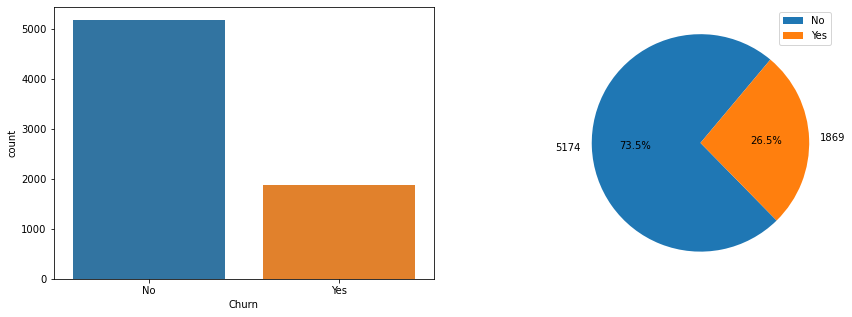

In [61]:
fig,axis=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.countplot(churn_dataset['Churn'],ax=axis[0])
plt.pie(churn_dataset['Churn'].value_counts(),labels=churn_dataset['Churn'].value_counts(), autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()

# Tenure

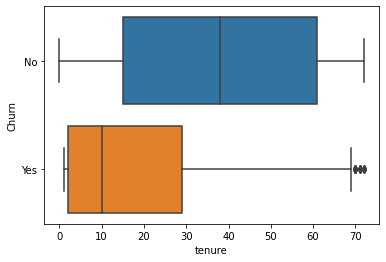

In [63]:
sns.boxplot(x = 'tenure', y = 'Churn', data = churn_dataset)
plt.show()

# Phone service

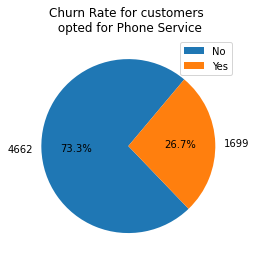

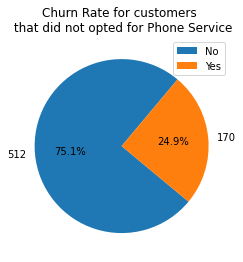

In [64]:
plt.title('Churn Rate for customers \n opted for Phone Service')
plt.gca().set_aspect('equal')
Optedyes=plt.pie(churn_dataset[churn_dataset['PhoneService']=='Yes']["Churn"].value_counts(),labels=churn_dataset[churn_dataset['PhoneService']=='Yes']["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()

plt.title('Churn Rate for customers \n that did not opted for Phone Service')
OptedNo=plt.pie(churn_dataset[churn_dataset['PhoneService']=='No']["Churn"].value_counts(),labels=churn_dataset[churn_dataset['PhoneService']=='No']["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()

# contract

In [66]:
churn_dataset['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

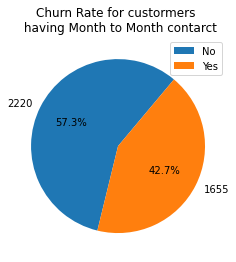

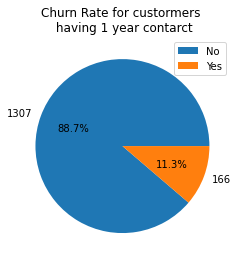

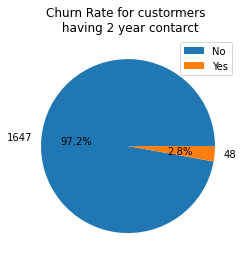

In [67]:
plt.title('Churn Rate for custormers \n having Month to Month contarct')
month=plt.pie(churn_dataset[churn_dataset['Contract']=='Month-to-month']['Churn'].value_counts(),labels=churn_dataset[churn_dataset['Contract']=='Month-to-month']['Churn'].value_counts(),startangle=50,autopct='%1.1f%%')
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()

plt.title('Churn Rate for custormers \n having 1 year contarct')
oneyear=plt.pie(churn_dataset[churn_dataset['Contract']=='One year']['Churn'].value_counts(),labels=churn_dataset[churn_dataset['Contract']=='One year']['Churn'].value_counts(),autopct='%1.1f%%')
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()

plt.title('Churn Rate for custormers \n having 2 year contarct')
month=plt.pie(churn_dataset[churn_dataset['Contract']=='Two year']['Churn'].value_counts(),labels=churn_dataset[churn_dataset['Contract']=='Two year']['Churn'].value_counts(),autopct='%1.1f%%')
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()


# Paperless Billing

In [68]:
churn_dataset['PaperlessBilling'].value_counts()

1    4171
0    2872
Name: PaperlessBilling, dtype: int64

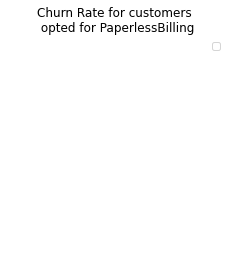

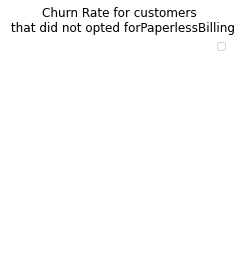

In [70]:
plt.title('Churn Rate for customers \n opted for PaperlessBilling')
Optedyes=plt.pie(churn_dataset[churn_dataset['PaperlessBilling']=='Yes']["Churn"].value_counts(),labels=churn_dataset[churn_dataset['PaperlessBilling']=='Yes']["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()

plt.title('Churn Rate for customers \n that did not opted forPaperlessBilling')
OptedNo=plt.pie(churn_dataset[churn_dataset['PaperlessBilling']=='No']["Churn"].value_counts(),labels=churn_dataset[churn_dataset['PaperlessBilling']=='No']["Churn"].value_counts(),autopct='%1.1f%%',startangle=30)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()

#Churn Rate is higher for the customers who opted for paperless billing.

# Payment Method

In [71]:
churn_dataset['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

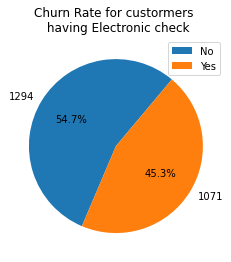

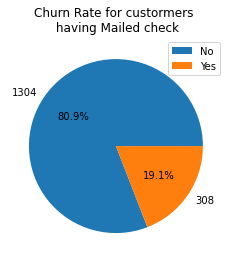

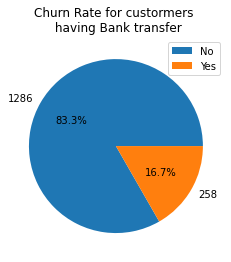

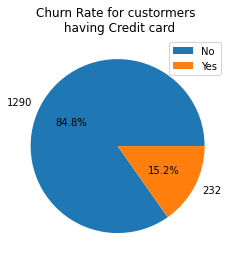

In [72]:
plt.title('Churn Rate for custormers \n having Electronic check')
Electronic_check=plt.pie(churn_dataset[churn_dataset['PaymentMethod']=='Electronic check']['Churn'].value_counts(),labels=churn_dataset[churn_dataset['PaymentMethod']=='Electronic check']['Churn'].value_counts(),startangle=50,autopct='%1.1f%%')
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()

plt.title('Churn Rate for custormers \n having Mailed check')
Mailed_check=plt.pie(churn_dataset[churn_dataset['PaymentMethod']=='Mailed check']['Churn'].value_counts(),labels=churn_dataset[churn_dataset['PaymentMethod']=='Mailed check']['Churn'].value_counts(),autopct='%1.1f%%')
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()

plt.title('Churn Rate for custormers \n having Bank transfer')
Bank_transfer=plt.pie(churn_dataset[churn_dataset['PaymentMethod']=='Bank transfer (automatic)']['Churn'].value_counts(),labels=churn_dataset[churn_dataset['PaymentMethod']=='Bank transfer (automatic)']['Churn'].value_counts(),autopct='%1.1f%%')
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()

plt.title('Churn Rate for custormers \n having Credit card')
Credit_card=plt.pie(churn_dataset[churn_dataset['PaymentMethod']=='Credit card (automatic)']['Churn'].value_counts(),labels=churn_dataset[churn_dataset['PaymentMethod']=='Credit card (automatic)']['Churn'].value_counts(),autopct='%1.1f%%')
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()


Customers with Electronic Check tends to churn more than other payment methods.

# Monthly Charges

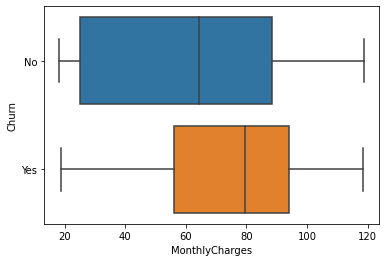

In [77]:
sns.boxplot(x = 'MonthlyCharges', y = 'Churn', data =churn_dataset)
plt.show()

# Gender

In [80]:
churn_dataset['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

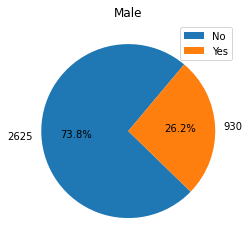

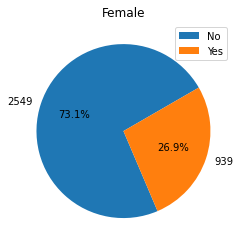

In [81]:
plt.title('Male')
Male=plt.pie(churn_dataset[churn_dataset['gender']=='Male']["Churn"].value_counts(),labels=churn_dataset[churn_dataset['gender']=='Male']["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()
plt.title('Female')
OptedNo=plt.pie(churn_dataset[churn_dataset['gender']=='Female']["Churn"].value_counts(),labels=churn_dataset[churn_dataset['gender']=='Female']["Churn"].value_counts(),autopct='%1.1f%%',startangle=30)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()


# Senior citizen

In [82]:
churn_dataset['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

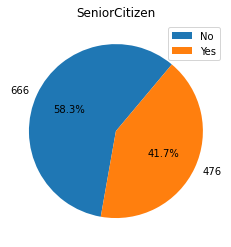

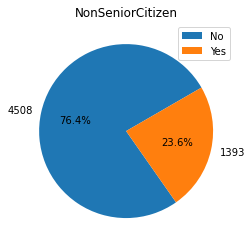

In [83]:
plt.title('SeniorCitizen')
Senior=plt.pie(churn_dataset[churn_dataset['SeniorCitizen']==1]["Churn"].value_counts(),labels=churn_dataset[churn_dataset['SeniorCitizen']==1]["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()
plt.title('NonSeniorCitizen')
Nonsenior=plt.pie(churn_dataset[churn_dataset['SeniorCitizen']==0]["Churn"].value_counts(),labels=churn_dataset[churn_dataset['SeniorCitizen']==0]["Churn"].value_counts(),autopct='%1.1f%%',startangle=30)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()


Senior Citizens tends to churn more.

# Partner

In [84]:
churn_dataset['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

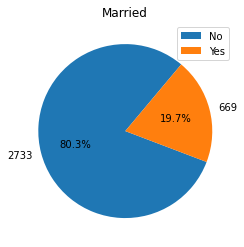

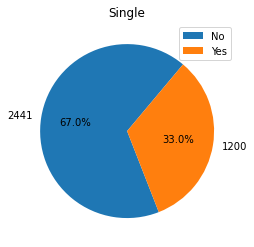

In [85]:
plt.title('Married')
Married=plt.pie(churn_dataset[churn_dataset['Partner']=="Yes"]["Churn"].value_counts(),labels=churn_dataset[churn_dataset['Partner']=="Yes"]["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()
plt.title('Single')
Single=plt.pie(churn_dataset[churn_dataset['Partner']=='No']["Churn"].value_counts(),labels=churn_dataset[churn_dataset['Partner']=='No']["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()


Customers with are single tends to churn more

# Dependents

In [86]:
churn_dataset['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

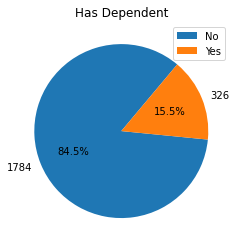

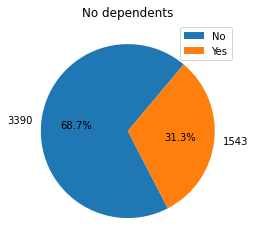

In [87]:
plt.title('Has Dependent')
HasDependent=plt.pie(churn_dataset[churn_dataset['Dependents']=="Yes"]["Churn"].value_counts(),labels=churn_dataset[churn_dataset['Dependents']=="Yes"]["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()
plt.title('No dependents')
NoDependents=plt.pie(churn_dataset[churn_dataset['Dependents']=='No']["Churn"].value_counts(),labels=churn_dataset[churn_dataset['Dependents']=='No']["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()


Customers with no dependents tends to churn more

# MultipleLines

In [88]:
churn_dataset['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

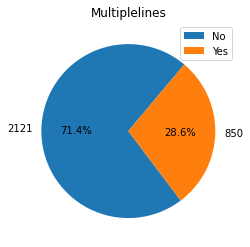

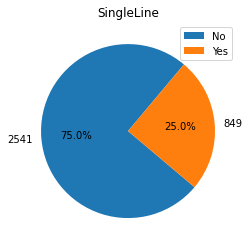

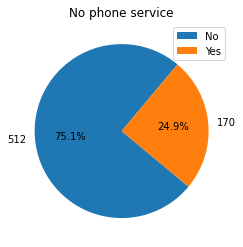

In [89]:
plt.title('Multiplelines')
MultipleLines=plt.pie(churn_dataset[churn_dataset['MultipleLines']=="Yes"]["Churn"].value_counts(),labels=churn_dataset[churn_dataset['MultipleLines']=="Yes"]["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()
plt.title('SingleLine')
singleline=plt.pie(churn_dataset[churn_dataset['MultipleLines']=='No']["Churn"].value_counts(),labels=churn_dataset[churn_dataset['MultipleLines']=='No']["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()
plt.title('No phone service')
singleline=plt.pie(churn_dataset[churn_dataset['MultipleLines']=='No phone service']["Churn"].value_counts(),labels=churn_dataset[churn_dataset['MultipleLines']=='No phone service']["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()


No signinificant effect on churn

# InternetService

In [90]:
churn_dataset['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

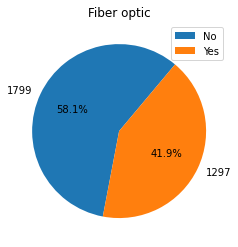

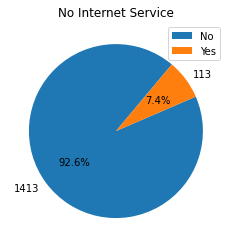

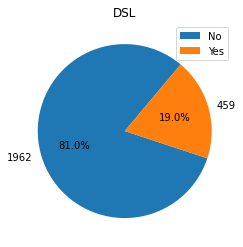

In [91]:
plt.title('Fiber optic')
MultipleLines=plt.pie(churn_dataset[churn_dataset['InternetService']=="Fiber optic"]["Churn"].value_counts(),labels=churn_dataset[churn_dataset['InternetService']=="Fiber optic"]["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()
plt.title('No Internet Service')
singleline=plt.pie(churn_dataset[churn_dataset['InternetService']=='No']["Churn"].value_counts(),labels=churn_dataset[churn_dataset['InternetService']=='No']["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()
plt.title('DSL')
singleline=plt.pie(churn_dataset[churn_dataset['InternetService']=='DSL']["Churn"].value_counts(),labels=churn_dataset[churn_dataset['InternetService']=='DSL']["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()


Customers with Fiber Optic Connection churn the most whereas least probability of churning for those with no internet service.

# OnlineSecurity

In [92]:
churn_dataset['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

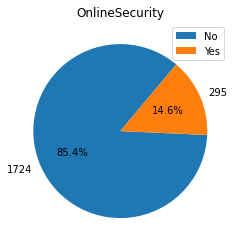

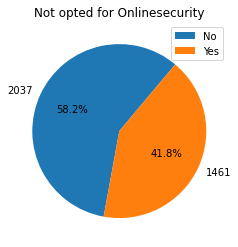

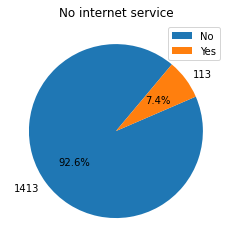

In [93]:
plt.title('OnlineSecurity')
MultipleLines=plt.pie(churn_dataset[churn_dataset['OnlineSecurity']=="Yes"]["Churn"].value_counts(),labels=churn_dataset[churn_dataset['OnlineSecurity']=="Yes"]["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()
plt.title('Not opted for Onlinesecurity')
singleline=plt.pie(churn_dataset[churn_dataset['OnlineSecurity']=='No']["Churn"].value_counts(),labels=churn_dataset[churn_dataset['OnlineSecurity']=='No']["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()
plt.title('No internet service')
singleline=plt.pie(churn_dataset[churn_dataset['OnlineSecurity']=='No internet service']["Churn"].value_counts(),labels=churn_dataset[churn_dataset['OnlineSecurity']=='No internet service']["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()

Customers Not Opted for internet service tends to churn significantly higher and Customer with No internet service churn least

# OnlineBackup

In [94]:
churn_dataset['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

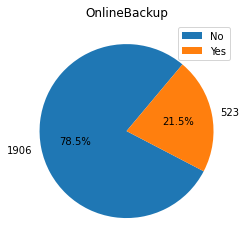

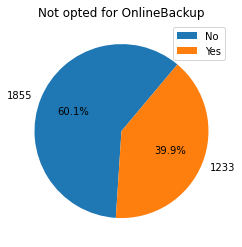

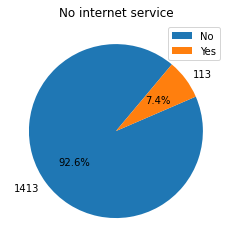

In [95]:
plt.title('OnlineBackup')
MultipleLines=plt.pie(churn_dataset[churn_dataset['OnlineBackup']=="Yes"]["Churn"].value_counts(),labels=churn_dataset[churn_dataset['OnlineBackup']=="Yes"]["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()
plt.title('Not opted for OnlineBackup')
singleline=plt.pie(churn_dataset[churn_dataset['OnlineBackup']=='No']["Churn"].value_counts(),labels=churn_dataset[churn_dataset['OnlineBackup']=='No']["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()
plt.title('No internet service')
singleline=plt.pie(churn_dataset[churn_dataset['OnlineBackup']=='No internet service']["Churn"].value_counts(),labels=churn_dataset[churn_dataset['OnlineBackup']=='No internet service']["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()

Customers opted for Online Backup churn less than who have not opted.

# DeviceProtection

In [97]:
churn_dataset['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

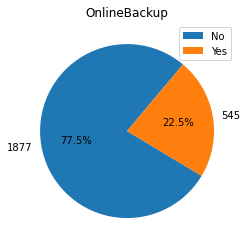

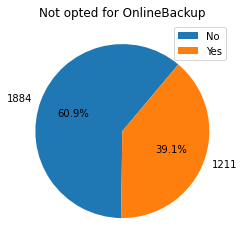

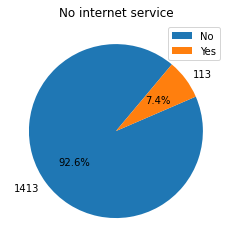

In [98]:
plt.title('OnlineBackup')
opted=plt.pie(churn_dataset[churn_dataset['DeviceProtection']=="Yes"]["Churn"].value_counts(),labels=churn_dataset[churn_dataset['DeviceProtection']=="Yes"]["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()
plt.title('Not opted for OnlineBackup')
notopted=plt.pie(churn_dataset[churn_dataset['DeviceProtection']=='No']["Churn"].value_counts(),labels=churn_dataset[churn_dataset['DeviceProtection']=='No']["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()
plt.title('No internet service')
nointernet=plt.pie(churn_dataset[churn_dataset['DeviceProtection']=='No internet service']["Churn"].value_counts(),labels=churn_dataset[churn_dataset['DeviceProtection']=='No internet service']["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()

Customers opted for Device Potection churn less than who have not opted.

# TechSupport

In [99]:
churn_dataset['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

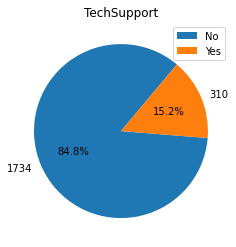

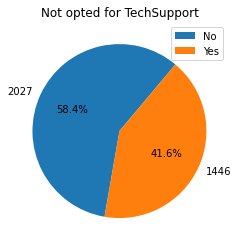

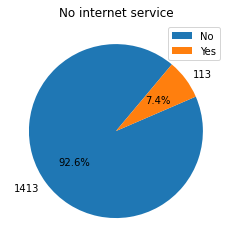

In [100]:
plt.title('TechSupport')
opted=plt.pie(churn_dataset[churn_dataset['TechSupport']=="Yes"]["Churn"].value_counts(),labels=churn_dataset[churn_dataset['TechSupport']=="Yes"]["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()
plt.title('Not opted for TechSupport')
notopted=plt.pie(churn_dataset[churn_dataset['TechSupport']=='No']["Churn"].value_counts(),labels=churn_dataset[churn_dataset['TechSupport']=='No']["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()
plt.title('No internet service')
nointernet=plt.pie(churn_dataset[churn_dataset['TechSupport']=='No internet service']["Churn"].value_counts(),labels=churn_dataset[churn_dataset['TechSupport']=='No internet service']["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()

Customers opted for Tech Support churn less than who have not opted.

# StreamingTV

In [101]:
churn_dataset['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

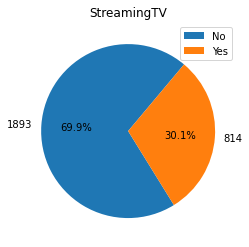

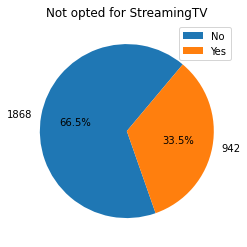

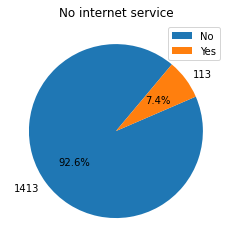

In [102]:
plt.title('StreamingTV')
opted=plt.pie(churn_dataset[churn_dataset['StreamingTV']=="Yes"]["Churn"].value_counts(),labels=churn_dataset[churn_dataset['StreamingTV']=="Yes"]["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()
plt.title('Not opted for StreamingTV')
notopted=plt.pie(churn_dataset[churn_dataset['StreamingTV']=='No']["Churn"].value_counts(),labels=churn_dataset[churn_dataset['StreamingTV']=='No']["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()
plt.title('No internet service')
nointernet=plt.pie(churn_dataset[churn_dataset['StreamingTV']=='No internet service']["Churn"].value_counts(),labels=churn_dataset[churn_dataset['StreamingTV']=='No internet service']["Churn"].value_counts(),autopct='%1.1f%%',startangle=50)
plt.legend(churn_dataset['Churn'].value_counts().index,loc='best')
plt.show()

Streaming TV doesn't make such impact on churning.

# Data Preparation

In [96]:
df['PhoneService_binary']=df['PhoneService'].map({'No':0,"Yes":1})

In [74]:
df['Dependents_binary']=df['Dependents'].map({'No':0,"Yes":1})

In [75]:
df['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [76]:
df['Partner_binary']=df['Partner'].map({'No':0,"Yes":1})

In [15]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [16]:
df['Churn_binary']=df['Churn'].map({'No':0,"Yes":1})

In [17]:
df.corr()['Churn_binary'][:-1]

SeniorCitizen          0.150889
tenure                -0.352229
MonthlyCharges         0.193356
MultipleLines_No      -0.032569
MultipleLines_Yes      0.040102
PhoneService_binary    0.011942
Dependents_binary     -0.164221
Partner_binary        -0.150448
Name: Churn_binary, dtype: float64

In [18]:
m2=pd.get_dummies(df['gender'],prefix='gender')
m2

,gender_Female,gender_Male
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
7038,0,1
7039,1,0
7040,1,0
7041,0,1


In [19]:
df=pd.concat((m2,df),axis=1)
df

,gender_Female,gender_Male,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_Yes,PhoneService_binary,Dependents_binary,Partner_binary,Churn_binary
0,1,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,...,Electronic check,29.85,29.85,No,0,0,0,0,1,0
1,0,1,5575-GNVDE,Male,0,No,No,34,Yes,No,...,Mailed check,56.95,1889.5,No,1,0,1,0,0,0
2,0,1,3668-QPYBK,Male,0,No,No,2,Yes,No,...,Mailed check,53.85,108.15,Yes,1,0,1,0,0,1
3,0,1,7795-CFOCW,Male,0,No,No,45,No,No phone service,...,Bank transfer (automatic),42.30,1840.75,No,0,0,0,0,0,0
4,1,0,9237-HQITU,Female,0,No,No,2,Yes,No,...,Electronic check,70.70,151.65,Yes,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,...,Mailed check,84.80,1990.5,No,0,1,1,1,1,0
7039,1,0,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,...,Credit card (automatic),103.20,7362.9,No,0,1,1,1,1,0
7040,1,0,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,...,Electronic check,29.60,346.45,No,0,0,0,1,1,0
7041,0,1,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,...,Mailed check,74.40,306.6,Yes,0,1,1,0,1,1


In [20]:
m3=pd.get_dummies(df['PaymentMethod'],prefix='PaymentMethod')
m3

,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
7038,0,0,0,1
7039,0,1,0,0
7040,0,0,1,0
7041,0,0,0,1


In [21]:
m4=pd.concat((m3,df[['Churn_binary','Churn']]),axis=1)
m4

,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_binary,Churn
0,0,0,1,0,0,No
1,0,0,0,1,0,No
2,0,0,0,1,1,Yes
3,1,0,0,0,0,No
4,0,0,1,0,1,Yes
...,...,...,...,...,...,...
7038,0,0,0,1,0,No
7039,0,1,0,0,0,No
7040,0,0,1,0,0,No
7041,0,0,0,1,1,Yes


In [22]:
m4.corr()['Churn_binary'][:-1]

PaymentMethod_Bank transfer (automatic)   -0.117937
PaymentMethod_Credit card (automatic)     -0.134302
PaymentMethod_Electronic check             0.301919
PaymentMethod_Mailed check                -0.091683
Name: Churn_binary, dtype: float64

<AxesSubplot:xlabel='PaymentMethod_Electronic check', ylabel='count'>

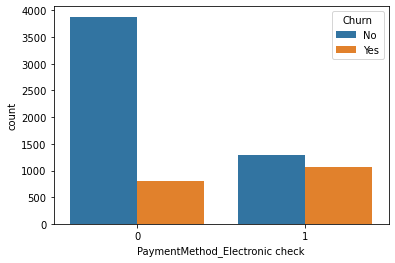

In [23]:
sns.countplot(x='PaymentMethod_Electronic check',data=m4,hue='Churn')

In [24]:
m4['PaymentMethod_Electronic check']

0       1
1       0
2       0
3       0
4       1
       ..
7038    0
7039    0
7040    1
7041    0
7042    0
Name: PaymentMethod_Electronic check, Length: 7043, dtype: uint8

In [25]:
df['tenure']

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64

In [26]:
df

,gender_Female,gender_Male,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_Yes,PhoneService_binary,Dependents_binary,Partner_binary,Churn_binary
0,1,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,...,Electronic check,29.85,29.85,No,0,0,0,0,1,0
1,0,1,5575-GNVDE,Male,0,No,No,34,Yes,No,...,Mailed check,56.95,1889.5,No,1,0,1,0,0,0
2,0,1,3668-QPYBK,Male,0,No,No,2,Yes,No,...,Mailed check,53.85,108.15,Yes,1,0,1,0,0,1
3,0,1,7795-CFOCW,Male,0,No,No,45,No,No phone service,...,Bank transfer (automatic),42.30,1840.75,No,0,0,0,0,0,0
4,1,0,9237-HQITU,Female,0,No,No,2,Yes,No,...,Electronic check,70.70,151.65,Yes,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,...,Mailed check,84.80,1990.5,No,0,1,1,1,1,0
7039,1,0,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,...,Credit card (automatic),103.20,7362.9,No,0,1,1,1,1,0
7040,1,0,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,...,Electronic check,29.60,346.45,No,0,0,0,1,1,0
7041,0,1,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,...,Mailed check,74.40,306.6,Yes,0,1,1,0,1,1


In [27]:
df.columns

Index(['gender_Female', 'gender_Male', 'customerID', 'gender', 'SeniorCitizen',
       'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'MultipleLines_No', 'MultipleLines_Yes', 'PhoneService_binary',
       'Dependents_binary', 'Partner_binary', 'Churn_binary'],
      dtype='object')

In [28]:
df['InternetService'].unique()
df['InternetService']

0               DSL
1               DSL
2               DSL
3               DSL
4       Fiber optic
           ...     
7038            DSL
7039    Fiber optic
7040            DSL
7041    Fiber optic
7042    Fiber optic
Name: InternetService, Length: 7043, dtype: object

In [29]:
print(df['OnlineSecurity'].unique())

['No' 'Yes' 'No internet service']


In [30]:
for x in df.columns:
    print(f'{x}:    {df[x].unique()}')

gender_Female:    [1 0]
gender_Male:    [0 1]
customerID:    ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender:    ['Female' 'Male']
SeniorCitizen:    [0 1]
Partner:    ['Yes' 'No']
Dependents:    ['No' 'Yes']
tenure:    [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService:    ['No' 'Yes']
MultipleLines:    ['No phone service' 'No' 'Yes']
InternetService:    ['DSL' 'Fiber optic' 'No']
OnlineSecurity:    ['No' 'Yes' 'No internet service']
OnlineBackup:    ['Yes' 'No' 'No internet service']
DeviceProtection:    ['No' 'Yes' 'No internet service']
TechSupport:    ['No' 'Yes' 'No internet service']
StreamingTV:    ['No' 'Yes' 'No internet service']
StreamingMovies:    ['No' 'Yes' 'No internet service']
Contract:    ['Month-to-month' 'One year' 'Two year']
PaperlessBill

In [31]:
df

,gender_Female,gender_Male,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_Yes,PhoneService_binary,Dependents_binary,Partner_binary,Churn_binary
0,1,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,...,Electronic check,29.85,29.85,No,0,0,0,0,1,0
1,0,1,5575-GNVDE,Male,0,No,No,34,Yes,No,...,Mailed check,56.95,1889.5,No,1,0,1,0,0,0
2,0,1,3668-QPYBK,Male,0,No,No,2,Yes,No,...,Mailed check,53.85,108.15,Yes,1,0,1,0,0,1
3,0,1,7795-CFOCW,Male,0,No,No,45,No,No phone service,...,Bank transfer (automatic),42.30,1840.75,No,0,0,0,0,0,0
4,1,0,9237-HQITU,Female,0,No,No,2,Yes,No,...,Electronic check,70.70,151.65,Yes,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,...,Mailed check,84.80,1990.5,No,0,1,1,1,1,0
7039,1,0,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,...,Credit card (automatic),103.20,7362.9,No,0,1,1,1,1,0
7040,1,0,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,...,Electronic check,29.60,346.45,No,0,0,0,1,1,0
7041,0,1,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,...,Mailed check,74.40,306.6,Yes,0,1,1,0,1,1


In [32]:
a1=pd.get_dummies(df['InternetService'],prefix='InternetService')
a1=a1.drop('InternetService_No',axis=1)
df=pd.concat([df,a1],axis=1)
df

,gender_Female,gender_Male,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,...,TotalCharges,Churn,MultipleLines_No,MultipleLines_Yes,PhoneService_binary,Dependents_binary,Partner_binary,Churn_binary,InternetService_DSL,InternetService_Fiber optic
0,1,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,...,29.85,No,0,0,0,0,1,0,1,0
1,0,1,5575-GNVDE,Male,0,No,No,34,Yes,No,...,1889.5,No,1,0,1,0,0,0,1,0
2,0,1,3668-QPYBK,Male,0,No,No,2,Yes,No,...,108.15,Yes,1,0,1,0,0,1,1,0
3,0,1,7795-CFOCW,Male,0,No,No,45,No,No phone service,...,1840.75,No,0,0,0,0,0,0,1,0
4,1,0,9237-HQITU,Female,0,No,No,2,Yes,No,...,151.65,Yes,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,...,1990.5,No,0,1,1,1,1,0,1,0
7039,1,0,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,...,7362.9,No,0,1,1,1,1,0,0,1
7040,1,0,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,...,346.45,No,0,0,0,1,1,0,1,0
7041,0,1,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,...,306.6,Yes,0,1,1,0,1,1,0,1


In [33]:
df.columns

Index(['gender_Female', 'gender_Male', 'customerID', 'gender', 'SeniorCitizen',
       'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'MultipleLines_No', 'MultipleLines_Yes', 'PhoneService_binary',
       'Dependents_binary', 'Partner_binary', 'Churn_binary',
       'InternetService_DSL', 'InternetService_Fiber optic'],
      dtype='object')

In [34]:
a=['OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies']
for j,x in enumerate(a):
    a[j]=pd.get_dummies(df[x],prefix=x)
    a[j] = a[j].drop(x+'_No internet service',axis=1)
    df=pd.concat([df,a[j]],axis=1)
df

,gender_Female,gender_Male,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,...,0,1,1,0,1,0,1,0,1,0
1,0,1,5575-GNVDE,Male,0,No,No,34,Yes,No,...,1,0,0,1,1,0,1,0,1,0
2,0,1,3668-QPYBK,Male,0,No,No,2,Yes,No,...,0,1,1,0,1,0,1,0,1,0
3,0,1,7795-CFOCW,Male,0,No,No,45,No,No phone service,...,1,0,0,1,0,1,1,0,1,0
4,1,0,9237-HQITU,Female,0,No,No,2,Yes,No,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,...,1,0,0,1,0,1,0,1,0,1
7039,1,0,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,...,0,1,0,1,1,0,0,1,0,1
7040,1,0,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,...,1,0,1,0,1,0,1,0,1,0
7041,0,1,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,...,1,0,1,0,1,0,1,0,1,0


In [35]:
df.columns

Index(['gender_Female', 'gender_Male', 'customerID', 'gender', 'SeniorCitizen',
       'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'MultipleLines_No', 'MultipleLines_Yes', 'PhoneService_binary',
       'Dependents_binary', 'Partner_binary', 'Churn_binary',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes'],
      dtype='object')

In [36]:
df['PaperlessBilling']=df['PaperlessBilling'].map({'Yes':1,'No':0})

In [37]:
df

,gender_Female,gender_Male,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,...,0,1,1,0,1,0,1,0,1,0
1,0,1,5575-GNVDE,Male,0,No,No,34,Yes,No,...,1,0,0,1,1,0,1,0,1,0
2,0,1,3668-QPYBK,Male,0,No,No,2,Yes,No,...,0,1,1,0,1,0,1,0,1,0
3,0,1,7795-CFOCW,Male,0,No,No,45,No,No phone service,...,1,0,0,1,0,1,1,0,1,0
4,1,0,9237-HQITU,Female,0,No,No,2,Yes,No,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,...,1,0,0,1,0,1,0,1,0,1
7039,1,0,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,...,0,1,0,1,1,0,0,1,0,1
7040,1,0,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,...,1,0,1,0,1,0,1,0,1,0
7041,0,1,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,...,1,0,1,0,1,0,1,0,1,0


In [38]:
a=pd.get_dummies(df['Contract'],prefix='Contract')
df=pd.concat([df,a],axis=1)
df

,gender_Female,gender_Male,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,...,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,...,0,1,0,1,0,1,0,1,0,0
1,0,1,5575-GNVDE,Male,0,No,No,34,Yes,No,...,1,1,0,1,0,1,0,0,1,0
2,0,1,3668-QPYBK,Male,0,No,No,2,Yes,No,...,0,1,0,1,0,1,0,1,0,0
3,0,1,7795-CFOCW,Male,0,No,No,45,No,No phone service,...,1,0,1,1,0,1,0,0,1,0
4,1,0,9237-HQITU,Female,0,No,No,2,Yes,No,...,0,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,...,1,0,1,0,1,0,1,0,1,0
7039,1,0,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,...,1,1,0,0,1,0,1,0,1,0
7040,1,0,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,...,0,1,0,1,0,1,0,1,0,0
7041,0,1,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,...,0,1,0,1,0,1,0,1,0,0


In [39]:
a=pd.get_dummies(df['PaymentMethod'],prefix='PaymentMethod')
df=pd.concat([df,a],axis=1)
df

,gender_Female,gender_Male,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,...,0,1,0,1,0,0,0,0,1,0
1,0,1,5575-GNVDE,Male,0,No,No,34,Yes,No,...,0,1,0,0,1,0,0,0,0,1
2,0,1,3668-QPYBK,Male,0,No,No,2,Yes,No,...,0,1,0,1,0,0,0,0,0,1
3,0,1,7795-CFOCW,Male,0,No,No,45,No,No phone service,...,0,1,0,0,1,0,1,0,0,0
4,1,0,9237-HQITU,Female,0,No,No,2,Yes,No,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,...,1,0,1,0,1,0,0,0,0,1
7039,1,0,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,...,1,0,1,0,1,0,0,1,0,0
7040,1,0,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,...,0,1,0,1,0,0,0,0,1,0
7041,0,1,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,...,0,1,0,1,0,0,0,0,0,1


In [40]:
df.columns

Index(['gender_Female', 'gender_Male', 'customerID', 'gender', 'SeniorCitizen',
       'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'MultipleLines_No', 'MultipleLines_Yes', 'PhoneService_binary',
       'Dependents_binary', 'Partner_binary', 'Churn_binary',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'Paymen

In [41]:
df.corr()['Churn_binary']

gender_Female                              0.008612
gender_Male                               -0.008612
SeniorCitizen                              0.150889
tenure                                    -0.352229
PaperlessBilling                           0.191825
MonthlyCharges                             0.193356
MultipleLines_No                          -0.032569
MultipleLines_Yes                          0.040102
PhoneService_binary                        0.011942
Dependents_binary                         -0.164221
Partner_binary                            -0.150448
Churn_binary                               1.000000
InternetService_DSL                       -0.124214
InternetService_Fiber optic                0.308020
OnlineSecurity_No                          0.342637
OnlineSecurity_Yes                        -0.171226
OnlineBackup_No                            0.268005
OnlineBackup_Yes                          -0.082255
DeviceProtection_No                        0.252481
DeviceProtec

In [42]:
final_df=df.drop(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn'],axis=1)
final_df

,gender_Female,gender_Male,tenure,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_Yes,PhoneService_binary,Dependents_binary,Partner_binary,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,29.85,29.85,0,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
1,0,1,34,56.95,1889.5,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
2,0,1,2,53.85,108.15,1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
3,0,1,45,42.30,1840.75,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
4,1,0,2,70.70,151.65,1,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,24,84.80,1990.5,0,1,1,1,1,...,1,0,1,0,1,0,0,0,0,1
7039,1,0,72,103.20,7362.9,0,1,1,1,1,...,1,0,1,0,1,0,0,1,0,0
7040,1,0,11,29.60,346.45,0,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0
7041,0,1,4,74.40,306.6,0,1,1,0,1,...,0,1,0,1,0,0,0,0,0,1


In [43]:
final_df

,gender_Female,gender_Male,tenure,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_Yes,PhoneService_binary,Dependents_binary,Partner_binary,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,29.85,29.85,0,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
1,0,1,34,56.95,1889.5,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
2,0,1,2,53.85,108.15,1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
3,0,1,45,42.30,1840.75,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
4,1,0,2,70.70,151.65,1,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,24,84.80,1990.5,0,1,1,1,1,...,1,0,1,0,1,0,0,0,0,1
7039,1,0,72,103.20,7362.9,0,1,1,1,1,...,1,0,1,0,1,0,0,1,0,0
7040,1,0,11,29.60,346.45,0,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0
7041,0,1,4,74.40,306.6,0,1,1,0,1,...,0,1,0,1,0,0,0,0,0,1


In [44]:
final_df.corr()['Churn_binary'].sort_values()[:-1]

tenure                                    -0.352229
Contract_Two year                         -0.302253
Contract_One year                         -0.177820
OnlineSecurity_Yes                        -0.171226
TechSupport_Yes                           -0.164674
Dependents_binary                         -0.164221
Partner_binary                            -0.150448
PaymentMethod_Credit card (automatic)     -0.134302
InternetService_DSL                       -0.124214
PaymentMethod_Bank transfer (automatic)   -0.117937
PaymentMethod_Mailed check                -0.091683
OnlineBackup_Yes                          -0.082255
DeviceProtection_Yes                      -0.066160
MultipleLines_No                          -0.032569
gender_Male                               -0.008612
gender_Female                              0.008612
PhoneService_binary                        0.011942
MultipleLines_Yes                          0.040102
StreamingMovies_Yes                        0.061382
StreamingTV_

In [45]:
final_df['TotalCharges']=final_df['TotalCharges'].replace(' ',np.nan)
final_df['TotalCharges']=pd.to_numeric(final_df['TotalCharges'])

In [46]:
value = (final_df['TotalCharges']/final_df['MonthlyCharges']).median()*final_df['MonthlyCharges']

In [47]:
final_df['TotalCharges'] = value.where(final_df['TotalCharges'] == np.nan, other =final_df['TotalCharges'])

In [48]:
final_df['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [49]:
final_df.isnull().sum()

gender_Female                               0
gender_Male                                 0
tenure                                      0
MonthlyCharges                              0
TotalCharges                               11
MultipleLines_No                            0
MultipleLines_Yes                           0
PhoneService_binary                         0
Dependents_binary                           0
Partner_binary                              0
Churn_binary                                0
InternetService_DSL                         0
InternetService_Fiber optic                 0
OnlineSecurity_No                           0
OnlineSecurity_Yes                          0
OnlineBackup_No                             0
OnlineBackup_Yes                            0
DeviceProtection_No                         0
DeviceProtection_Yes                        0
TechSupport_No                              0
TechSupport_Yes                             0
StreamingTV_No                    

In [50]:
# Removing NaN TotalCharges rows
final_df=final_df[~np.isnan(final_df['TotalCharges'])]

In [51]:
# Removing NaN MonthlyCharges rows
final_df=final_df[~np.isnan(final_df['MonthlyCharges'])]

In [52]:
final_df.isnull().sum()

gender_Female                              0
gender_Male                                0
tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
MultipleLines_No                           0
MultipleLines_Yes                          0
PhoneService_binary                        0
Dependents_binary                          0
Partner_binary                             0
Churn_binary                               0
InternetService_DSL                        0
InternetService_Fiber optic                0
OnlineSecurity_No                          0
OnlineSecurity_Yes                         0
OnlineBackup_No                            0
OnlineBackup_Yes                           0
DeviceProtection_No                        0
DeviceProtection_Yes                       0
TechSupport_No                             0
TechSupport_Yes                            0
StreamingTV_No                             0
StreamingT

In [53]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender_Female                            7032 non-null   uint8  
 1   gender_Male                              7032 non-null   uint8  
 2   tenure                                   7032 non-null   int64  
 3   MonthlyCharges                           7032 non-null   float64
 4   TotalCharges                             7032 non-null   float64
 5   MultipleLines_No                         7032 non-null   uint8  
 6   MultipleLines_Yes                        7032 non-null   uint8  
 7   PhoneService_binary                      7032 non-null   int64  
 8   Dependents_binary                        7032 non-null   int64  
 9   Partner_binary                           7032 non-null   int64  
 10  Churn_binary                             7032 no

<AxesSubplot:xlabel='Churn_binary', ylabel='count'>

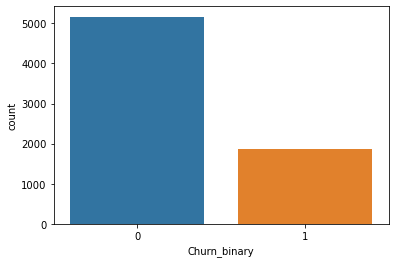

In [54]:
sns.countplot(data=final_df,x='Churn_binary')

In [55]:
x=final_df.drop('Churn_binary',axis=1)
y=final_df['Churn_binary']

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=101)

In [58]:
from sklearn.linear_model import LogisticRegression

In [60]:
model=LogisticRegression()

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
scale=StandardScaler()

In [63]:
X_train_scaled=scale.fit_transform(X_train)

In [64]:
X_test_scaled=scale.transform(X_test)

In [65]:
model.fit(X_train,y_train)

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [66]:
y_predict=model.predict(X_test)

In [67]:
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix

In [68]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1329
           1       0.64      0.52      0.57       429

    accuracy                           0.81      1758
   macro avg       0.74      0.71      0.72      1758
weighted avg       0.80      0.81      0.80      1758



C:\Users\sande\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


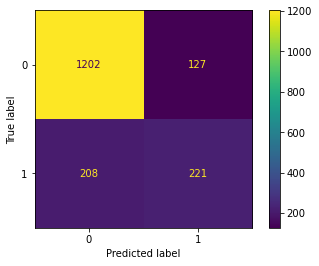

In [69]:
plot_confusion_matrix(model,X_test,y_test)

In [70]:
accuracy_score(y_test,y_predict)

0.8094425483503982

In [69]:
from sklearn.model_selection import GridSearchCV

In [128]:
parameters={'penalty':['l1', 'l2', 'elasticnet', 'none'],'l1_ratio':[0,0.001,0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99,1],'C':[1,3,5,10,15,20,30,50],'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [129]:
grid_model=GridSearchCV(model,parameters,verbose=2)

In [130]:
grid_model.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 1920 candidates, totalling 9600 fits
[CV] END ......C=1, l1_ratio=0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=1, l1_ratio=0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=1, l1_ratio=0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=1, l1_ratio=0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=1, l1_ratio=0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..........C=1, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..........C=1, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..........C=1, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..........C=1, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..........C=1, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=1, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=1, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ......C=1, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ......C=1, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=1, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ............C=1, l1_ratio=0, penalty=l1, solver=sag; total time=   0.0s
[CV] END ............C=1, l1_ratio=0, penalty=l1, solver=sag; total time=   0.0s
[CV] END ............C=1, l1_ratio=0, penalty=l1, solver=sag; total time=   0.0s
[CV] END ............C=1, l1_ratio=0, penalty=l1, solver=sag; total time=   0.0s
[CV] END ............C=1, l1_ratio=0, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...........C=1, l1_ratio=0, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...........C=1, l1_ratio=0, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...........C=1, l1_ratio=0, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...........C=1, l1_ratio=0, penalty=l1, solver=saga; total time=   0.2s
[CV] END ...........C=1, l1_ratio=0, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=1, l1_ratio=0, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=1, l1_ratio=0, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=1, l1_ratio=0, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=1, l1_ratio=0, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=1, l1_ratio=0, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..........C=1, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..........C=1, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ..........C=1, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..........C=1, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..........C=1, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=1, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......C=1, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......C=1, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......C=1, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=1, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ............C=1, l1_ratio=0, penalty=l2, solver=sag; total time=   0.0s
[CV] END ............C=1, l1_ratio=0, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ............C=1, l1_ratio=0, penalty=l2, solver=sag; total time=   0.0s
[CV] END ............C=1, l1_ratio=0, penalty=l2, solver=sag; total time=   0.0s
[CV] END ............C=1, l1_ratio=0, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...........C=1, l1_ratio=0, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...........C=1, l1_ratio=0, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...........C=1, l1_ratio=0, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...........C=1, l1_ratio=0, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...........C=1, l1_ratio=0, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1, l1_ratio=0, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=0, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=0, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=0, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=0, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ..C=1, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ..C=1, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ..C=1, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ..C=1, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ..C=1, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1, 

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(


[CV] END ....C=1, l1_ratio=0, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, l1_ratio=0, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, l1_ratio=0, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ........C=1, l1_ratio=0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, l1_ratio=0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, l1_ratio=0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, l1_ratio=0, penalty=none, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\s

[CV] END ........C=1, l1_ratio=0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=1, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ....C=1, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ....C=1, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ....C=1, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ....C=1, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..........C=1, l1_ratio=0, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(


[CV] END ..........C=1, l1_ratio=0, penalty=none, solver=sag; total time=   0.0s
[CV] END ..........C=1, l1_ratio=0, penalty=none, solver=sag; total time=   0.0s
[CV] END ..........C=1, l1_ratio=0, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(


[CV] END ..........C=1, l1_ratio=0, penalty=none, solver=sag; total time=   0.0s
[CV] END .........C=1, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s
[CV] END .........C=1, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s
[CV] END .........C=1, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(


[CV] END .........C=1, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s
[CV] END .........C=1, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s
[CV] END ..C=1, l1_ratio=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=1, l1_ratio=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=1, l1_ratio=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=1, l1_ratio=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=1, l1_ratio=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=1, l1_ratio=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=1, l1_ratio=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=1, l1_ratio=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=1, l1_ratio=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=1, l1_ratio=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..C=1, l1_ratio=0.0

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=1, l1_ratio=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=1, l1_ratio=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=1, l1_ratio=0.001, penalty=l1, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=1, l1_ratio=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.001, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=1, l1_ratio=0.001, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=1, l1_ratio=0.001, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=1, l1_ratio=0.001, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=1, l1_ratio=0.001, penalty=l1, solver=saga; total time=   0.2s
[CV] END .......C=1, l1_ratio=0.001, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..C=1, l1_ratio=0.001, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=1, l1_ratio=0.001, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=1, l1_ratio=0.001, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=1, l1_ratio=0.001, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=1, l1_ratio=0.001, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=1, l1_ratio=0.001, penalty=l2, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=1, l1_ratio=0.001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=1, l1_ratio=0.001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=1, l1_ratio=0.001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=1, l1_ratio=0.001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=1, l1_ratio=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=1, l1_ratio=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=1, l1_ratio=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=1, l1_ratio=0.001, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ..C=1, l1_ratio=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.001, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.001, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=1, l1_ratio=0.001, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.001, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.001, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=1, l1_ratio=0.001, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.001, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.001, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.001, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.001, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1, l1_ratio=0.001, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=0.001, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=0.001, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=0.001, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=0.001, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=0.001, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.001, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.001, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.001, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.001, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.001, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1, l1_ratio=0.001, penalty=elasticnet, solver=liblin

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(


[CV] END C=1, l1_ratio=0.001, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=0.001, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=0.001, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=0.001, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, l1_ratio=0.001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=1, l1_ratio=0.001, penalty=none, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\s

[CV] END ....C=1, l1_ratio=0.001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=1, l1_ratio=0.001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=1, l1_ratio=0.001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.001, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1, l1_ratio=0.001, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1, l1_ratio=0.001, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1, l1_ratio=0.001, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1, l1_ratio=0.001, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ......C=1, l1_ratio=0.001, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(


[CV] END ......C=1, l1_ratio=0.001, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=1, l1_ratio=0.001, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(


[CV] END ......C=1, l1_ratio=0.001, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=1, l1_ratio=0.001, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=1, l1_ratio=0.001, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=1, l1_ratio=0.001, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\s

[CV] END .....C=1, l1_ratio=0.001, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=1, l1_ratio=0.001, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=1, l1_ratio=0.001, penalty=none, solver=saga; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, l1_rati

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=1, l1_ratio=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.01, penalty=l1, solver=liblinear; total time=   0.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=1, l1_ratio=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.01, penalty=l1, solver=liblinear; total time=   0.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=1, l1_ratio=0.01, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.01, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.01, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.01, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.01, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.01, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=1, l1_ratio=0.01, penalty=l1, solver=saga; total time=   0.2s
[CV] END ........C=1, l1_ratio=0.01, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=1, l1_ratio=0.01, penalty=l1, solver=saga; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=1, l1_ratio=0.01, penalty=l1, solver=saga; total time=   0.2s
[CV] END ........C=1, l1_ratio=0.01, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.01, penalty=l2, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END .......C=1, l1_ratio=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.01, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...C=1, l1_ratio=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.01, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=1, l1_ratio=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.01, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=1, l1_ratio=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.01, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1, l1_ratio=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=0.01, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.01, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.01, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.01, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.01, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.01, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1, l1_ratio=0.01, penalty=elasticnet, solver=liblinear; total t

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(


[CV] END .C=1, l1_ratio=0.01, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .....C=1, l1_ratio=0.01, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1, l1_ratio=0.01, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1, l1_ratio=0.01, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1, l1_ratio=0.01, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1, l1_ratio=0.01, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=1, l1_ratio=0.01, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=1, l1_ratio=0.01, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=1, l1_ratio=0.01, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=1, l1_ratio=0.01, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=1, l1_ratio=0.01, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\s

[CV] END .......C=1, l1_ratio=0.01, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.01, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.01, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(


[CV] END .......C=1, l1_ratio=0.01, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.01, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=1, l1_ratio=0.01, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=1, l1_ratio=0.01, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(


[CV] END ......C=1, l1_ratio=0.01, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=1, l1_ratio=0.01, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=1, l1_ratio=0.01, penalty=none, solver=saga; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.05, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.05, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.05, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.05, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.05, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.05, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.05, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.05, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.05, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, l1_rati

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=1, l1_ratio=0.05, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ...C=1, l1_ratio=0.05, penalty=l1, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=1, l1_ratio=0.05, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.05, penalty=l1, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=1, l1_ratio=0.05, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.05, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.05, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.05, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.05, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.05, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=1, l1_ratio=0.05, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=1, l1_ratio=0.05, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=1, l1_ratio=0.05, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=1, l1_ratio=0.05, penalty=l1, solver=saga; total time=   0.2s
[CV] END ........C=1, l1_ratio=0.05, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.05, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...C=1, l1_ratio=0.05, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.05, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.05, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.05, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.05, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.05, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.05, penalty=l2, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END .......C=1, l1_ratio=0.05, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.05, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.05, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.05, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.05, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.05, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.05, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=1, l1_ratio=0.05, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.05, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.05, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=1, l1_ratio=0.05, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.05, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.05, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.05, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ........C=1, l1_ratio=0.05, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.05, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.05, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1, l1_ratio=0.05, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=0.05, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=0.05, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=0.05, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=0.05, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=0.05, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.05, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.05, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.05, penalty=elasticnet, solver=lbfgs; total time=   0.0s

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\s

[CV] END .C=1, l1_ratio=0.05, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .....C=1, l1_ratio=0.05, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1, l1_ratio=0.05, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1, l1_ratio=0.05, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1, l1_ratio=0.05, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1, l1_ratio=0.05, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=1, l1_ratio=0.05, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=1, l1_ratio=0.05, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=1, l1_ratio=0.05, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=1, l1_ratio=0.05, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=1, l1_ratio=0.05, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.05, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=1, l1_rati

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(


[CV] END .......C=1, l1_ratio=0.05, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.05, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=1, l1_ratio=0.05, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=1, l1_ratio=0.05, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(


[CV] END ......C=1, l1_ratio=0.05, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=1, l1_ratio=0.05, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=1, l1_ratio=0.05, penalty=none, solver=saga; total time=   0.0s
[CV] END ....C=1, l1_ratio=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, l1_ratio=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, l1_ratio=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, l1_ratio=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, l1_ratio=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, l1_rat

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=1, l1_ratio=0.1, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ....C=1, l1_ratio=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ....C=1, l1_ratio=0.1, penalty=l1, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=1, l1_ratio=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ....C=1, l1_ratio=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..........C=1, l1_ratio=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ..........C=1, l1_ratio=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ..........C=1, l1_ratio=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ..........C=1, l1_ratio=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ..........C=1, l1_ratio=0.1, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=1, l1_ratio=0.1, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=1, l1_ratio=0.1, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=1, l1_ratio=0.1, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=1, l1_ratio=0.1, penalty=l1, solver=saga; total time=   0.2s
[CV] END .........C=1, l1_ratio=0.1, penalty=l1, solver=saga; total time=   0.0s
[CV] END ....C=1, l1_ratio=0.1, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ....C=1, l1_ratio=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, l1_ratio=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, l1_ratio=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, l1_ratio=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.1, penalty=l2, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ........C=1, l1_ratio=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=1, l1_ratio=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=1, l1_ratio=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=1, l1_ratio=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=1, l1_ratio=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=1, l1_ratio=0.1, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=1, l1_ratio=0.1, penalty=l2, solver=sag; total time=   0.0s
[CV] END ..........C=1, l1_ratio=0.1, penalty=l2, solver=sag; total time=   0.0s
[CV] END ..........C=1, l1_ratio=0.1, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=1, l1_ratio=0.1, penalty=l2, solver=sag; total time=   0.0s
[CV] END ..........C=1, l1_ratio=0.1, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.1, penalty=l2, solver=saga; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.1, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=1, l1_ratio=0.1, penalty=l2, solver=saga; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.1, penalty=l2, solver=saga; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.1, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1, l1_ratio=0.1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=0.1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=0.1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=0.1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=0.1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=0.1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\s

[CV] END ..C=1, l1_ratio=0.1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ......C=1, l1_ratio=0.1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ......C=1, l1_ratio=0.1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ......C=1, l1_ratio=0.1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ......C=1, l1_ratio=0.1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ......C=1, l1_ratio=0.1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=1, l1_ratio=0.1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=1, l1_ratio=0.1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=1, l1_ratio=0.1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=1, l1_ratio=0.1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=1, l1_ratio=0.1, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(


[CV] END ........C=1, l1_ratio=0.1, penalty=none, solver=sag; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.1, penalty=none, solver=sag; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.1, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(


[CV] END ........C=1, l1_ratio=0.1, penalty=none, solver=sag; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.1, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.1, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.1, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\s

[CV] END .......C=1, l1_ratio=0.1, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.1, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.1, penalty=none, solver=saga; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.25, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.25, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.25, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.25, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.25, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.25, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.25, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.25, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.25, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, l1_rati

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=1, l1_ratio=0.25, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ...C=1, l1_ratio=0.25, penalty=l1, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=1, l1_ratio=0.25, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.25, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.25, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.25, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.25, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.25, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.25, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=1, l1_ratio=0.25, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=1, l1_ratio=0.25, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=1, l1_ratio=0.25, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=1, l1_ratio=0.25, penalty=l1, solver=saga; total time=   0.2s
[CV] END ........C=1, l1_ratio=0.25, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.25, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...C=1, l1_ratio=0.25, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.25, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.25, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.25, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.25, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.25, penalty=l2, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END .......C=1, l1_ratio=0.25, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.25, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.25, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.25, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.25, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.25, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.25, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...C=1, l1_ratio=0.25, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.25, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.25, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=1, l1_ratio=0.25, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.25, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.25, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=1, l1_ratio=0.25, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.25, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.25, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.25, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.25, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1, l1_ratio=0.25, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=0.25, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=0.25, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=0.25, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=0.25, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=0.25, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.25, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.25, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.25, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.25, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.25, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1, l1_ratio=0.25, penalty=elasticnet, solver=liblinear; total t

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(


[CV] END .C=1, l1_ratio=0.25, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=1, l1_ratio=0.25, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=1, l1_ratio=0.25, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .....C=1, l1_ratio=0.25, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1, l1_ratio=0.25, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1, l1_ratio=0.25, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1, l1_ratio=0.25, penalty=none, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\s

[CV] END .....C=1, l1_ratio=0.25, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=1, l1_ratio=0.25, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=1, l1_ratio=0.25, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=1, l1_ratio=0.25, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=1, l1_ratio=0.25, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=1, l1_ratio=0.25, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.25, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(


[CV] END .......C=1, l1_ratio=0.25, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.25, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.25, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(


[CV] END .......C=1, l1_ratio=0.25, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=1, l1_ratio=0.25, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=1, l1_ratio=0.25, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=1, l1_ratio=0.25, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=1, l1_ratio=0.25, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=1, l1_ratio=0.25, penalty=none, solver=saga; total time=   0.0s
[CV] END ....C=1, l1_ratio=0.5, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, l1_ratio=0.5, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, l1_ratio=0.5, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, l1_ratio=0.5, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, l1_ratio=0.5, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....C=1, l1_ratio=0

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=1, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ....C=1, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ....C=1, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=1, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..........C=1, l1_ratio=0.5, penalty=l1, solver=sag; total time=   0.0s
[CV] END ..........C=1, l1_ratio=0.5, penalty=l1, solver=sag; total time=   0.0s
[CV] END ..........C=1, l1_ratio=0.5, penalty=l1, solver=sag; total time=   0.0s
[CV] END ..........C=1, l1_ratio=0.5, penalty=l1, solver=sag; total time=   0.0s
[CV] END ..........C=1, l1_ratio=0.5, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=1, l1_ratio=0.5, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=1, l1_ratio=0.5, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=1, l1_ratio=0.5, penalty=l1, solver=saga; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=1, l1_ratio=0.5, penalty=l1, solver=saga; total time=   0.2s
[CV] END .........C=1, l1_ratio=0.5, penalty=l1, solver=saga; total time=   0.0s
[CV] END ....C=1, l1_ratio=0.5, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ....C=1, l1_ratio=0.5, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, l1_ratio=0.5, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, l1_ratio=0.5, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, l1_ratio=0.5, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ........C=1, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=1, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=1, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=1, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ....C=1, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=1, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..........C=1, l1_ratio=0.5, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=1, l1_ratio=0.5, penalty=l2, solver=sag; total time=   0.0s
[CV] END ..........C=1, l1_ratio=0.5, penalty=l2, solver=sag; total time=   0.0s
[CV] END ..........C=1, l1_ratio=0.5, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=1, l1_ratio=0.5, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.5, penalty=l2, solver=saga; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.5, penalty=l2, solver=saga; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.5, penalty=l2, solver=saga; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.5, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=1, l1_ratio=0.5, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1, l1_ratio=0.5, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=0.5, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=0.5, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=0.5, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=0.5, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.5, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV]

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(


[CV] END ..C=1, l1_ratio=0.5, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ..C=1, l1_ratio=0.5, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ..C=1, l1_ratio=0.5, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ..C=1, l1_ratio=0.5, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\s

[CV] END ..C=1, l1_ratio=0.5, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ......C=1, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ......C=1, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ......C=1, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ......C=1, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ......C=1, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=1, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=1, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=1, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=1, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=1, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.5, penalty=none, solver=sag; total time=   0.0s
[CV] END ........C=1, l1_rat

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(


[CV] END ........C=1, l1_ratio=0.5, penalty=none, solver=sag; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.5, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(


[CV] END .......C=1, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.75, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.75, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.75, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.75, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.75, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.75, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.75, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.75, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.75, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, l1_rati

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=1, l1_ratio=0.75, penalty=l1, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=1, l1_ratio=0.75, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ...C=1, l1_ratio=0.75, penalty=l1, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=1, l1_ratio=0.75, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.75, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END .........C=1, l1_ratio=0.75, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.75, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.75, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.75, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.75, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=1, l1_ratio=0.75, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=1, l1_ratio=0.75, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=1, l1_ratio=0.75, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=1, l1_ratio=0.75, penalty=l1, solver=saga; total time=   0.2s
[CV] END ........C=1, l1_ratio=0.75, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.75, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.75, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.75, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.75, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.75, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.75, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.75, penalty=l2, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END .......C=1, l1_ratio=0.75, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.75, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.75, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.75, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.75, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.75, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.75, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...C=1, l1_ratio=0.75, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.75, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.75, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=1, l1_ratio=0.75, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.75, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.75, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=1, l1_ratio=0.75, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.75, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.75, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.75, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.75, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1, l1_ratio=0.75, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=0.75, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=0.75, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=0.75, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=0.75, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=0.75, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.75, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.75, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.75, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.75, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.75, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1, l1_ratio=0.75, penalty=elasticnet, solver=liblinear; total t

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(


[CV] END .C=1, l1_ratio=0.75, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .....C=1, l1_ratio=0.75, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1, l1_ratio=0.75, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1, l1_ratio=0.75, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1, l1_ratio=0.75, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1, l1_ratio=0.75, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=1, l1_ratio=0.75, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=1, l1_ratio=0.75, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=1, l1_ratio=0.75, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=1, l1_ratio=0.75, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=1, l1_ratio=0.75, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\s

[CV] END .......C=1, l1_ratio=0.75, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.75, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.75, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(


[CV] END .......C=1, l1_ratio=0.75, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.75, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=1, l1_ratio=0.75, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=1, l1_ratio=0.75, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(


[CV] END ......C=1, l1_ratio=0.75, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=1, l1_ratio=0.75, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=1, l1_ratio=0.75, penalty=none, solver=saga; total time=   0.0s
[CV] END ....C=1, l1_ratio=0.9, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, l1_ratio=0.9, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, l1_ratio=0.9, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, l1_ratio=0.9, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, l1_ratio=0.9, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.9, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.9, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.9, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.9, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, l1_rat

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=1, l1_ratio=0.9, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ....C=1, l1_ratio=0.9, penalty=l1, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=1, l1_ratio=0.9, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ....C=1, l1_ratio=0.9, penalty=l1, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=1, l1_ratio=0.9, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..........C=1, l1_ratio=0.9, penalty=l1, solver=sag; total time=   0.0s
[CV] END ..........C=1, l1_ratio=0.9, penalty=l1, solver=sag; total time=   0.0s
[CV] END ..........C=1, l1_ratio=0.9, penalty=l1, solver=sag; total time=   0.0s
[CV] END ..........C=1, l1_ratio=0.9, penalty=l1, solver=sag; total time=   0.0s
[CV] END ..........C=1, l1_ratio=0.9, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=1, l1_ratio=0.9, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=1, l1_ratio=0.9, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=1, l1_ratio=0.9, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=1, l1_ratio=0.9, penalty=l1, solver=saga; total time=   0.2s
[CV] END .........C=1, l1_ratio=0.9, penalty=l1, solver=saga; total time=   0.0s
[CV] END ....C=1, l1_ratio=0.9, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ....C=1, l1_ratio=0.9, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, l1_ratio=0.9, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, l1_ratio=0.9, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, l1_ratio=0.9, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.9, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.9, penalty=l2, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ........C=1, l1_ratio=0.9, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.9, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.9, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=1, l1_ratio=0.9, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=1, l1_ratio=0.9, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=1, l1_ratio=0.9, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ....C=1, l1_ratio=0.9, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=1, l1_ratio=0.9, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..........C=1, l1_ratio=0.9, penalty=l2, solver=sag; total time=   0.0s
[CV] END ..........C=1, l1_ratio=0.9, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=1, l1_ratio=0.9, penalty=l2, solver=sag; total time=   0.0s
[CV] END ..........C=1, l1_ratio=0.9, penalty=l2, solver=sag; total time=   0.0s
[CV] END ..........C=1, l1_ratio=0.9, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=1, l1_ratio=0.9, penalty=l2, solver=saga; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.9, penalty=l2, solver=saga; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.9, penalty=l2, solver=saga; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.9, penalty=l2, solver=saga; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.9, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1, l1_ratio=0.9, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=0.9, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=0.9, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=0.9, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=0.9, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=0.9, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.9, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.9, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.9, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.9, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.9, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1, l1_ratio=0.9, penalty=elasticnet, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .C=1, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .C=1, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .C=1, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .C=1, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.3s
[CV] END .C=1, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END ..C=1, l1_ratio=0.9, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ..C=1, l1_ratio=0.9, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ..C=1, l1_ratio=0.9, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ..C=1, l1_ratio=0.9, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\s

[CV] END ..C=1, l1_ratio=0.9, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ......C=1, l1_ratio=0.9, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ......C=1, l1_ratio=0.9, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ......C=1, l1_ratio=0.9, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ......C=1, l1_ratio=0.9, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ......C=1, l1_ratio=0.9, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=1, l1_ratio=0.9, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=1, l1_ratio=0.9, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=1, l1_ratio=0.9, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=1, l1_ratio=0.9, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=1, l1_ratio=0.9, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.9, penalty=none, solver=sag; total time=   0.0s
[CV] END ........C=1, l1_rat

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(


[CV] END ........C=1, l1_ratio=0.9, penalty=none, solver=sag; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.9, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.9, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(


[CV] END .......C=1, l1_ratio=0.9, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.9, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.9, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.9, penalty=none, solver=saga; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.95, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.95, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.95, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.95, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.95, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.95, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.95, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.95, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, l1_rati

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=1, l1_ratio=0.95, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.95, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.95, penalty=l1, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=1, l1_ratio=0.95, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.95, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.95, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.95, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.95, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.95, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.95, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=1, l1_ratio=0.95, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=1, l1_ratio=0.95, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=1, l1_ratio=0.95, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=1, l1_ratio=0.95, penalty=l1, solver=saga; total time=   0.2s
[CV] END ........C=1, l1_ratio=0.95, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.95, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...C=1, l1_ratio=0.95, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.95, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.95, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.95, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.95, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.95, penalty=l2, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END .......C=1, l1_ratio=0.95, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.95, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.95, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.95, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.95, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.95, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.95, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...C=1, l1_ratio=0.95, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.95, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.95, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=1, l1_ratio=0.95, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.95, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.95, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=1, l1_ratio=0.95, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.95, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.95, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.95, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.95, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1, l1_ratio=0.95, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=0.95, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=0.95, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=0.95, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=0.95, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=0.95, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.95, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.95, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.95, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.95, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.95, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1, l1_ratio=0.95, penalty=elasticnet, solver=liblinear; total t

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, l1_ratio=0.95, penalty=elasticnet, solver=saga; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, l1_ratio=0.95, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, l1_ratio=0.95, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, l1_ratio=0.95, penalty=elasticnet, solver=saga; total time=   0.3s
[CV] END C=1, l1_ratio=0.95, penalty=elasticnet, solver=saga; total time=   0.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(


[CV] END .C=1, l1_ratio=0.95, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=1, l1_ratio=0.95, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=1, l1_ratio=0.95, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=1, l1_ratio=0.95, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=1, l1_ratio=0.95, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\s

[CV] END .....C=1, l1_ratio=0.95, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1, l1_ratio=0.95, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1, l1_ratio=0.95, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1, l1_ratio=0.95, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1, l1_ratio=0.95, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=1, l1_ratio=0.95, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=1, l1_ratio=0.95, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=1, l1_ratio=0.95, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=1, l1_ratio=0.95, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=1, l1_ratio=0.95, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.95, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(


[CV] END .......C=1, l1_ratio=0.95, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.95, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.95, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(


[CV] END .......C=1, l1_ratio=0.95, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=1, l1_ratio=0.95, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=1, l1_ratio=0.95, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=1, l1_ratio=0.95, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(


[CV] END ......C=1, l1_ratio=0.95, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=1, l1_ratio=0.95, penalty=none, solver=saga; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.99, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.99, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.99, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.99, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.99, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.99, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.99, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.99, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.99, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.99, penalty=l1, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=1, l1_ratio=0.99, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.99, penalty=l1, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=1, l1_ratio=0.99, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ...C=1, l1_ratio=0.99, penalty=l1, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=1, l1_ratio=0.99, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.99, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.99, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.99, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.99, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.99, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=1, l1_ratio=0.99, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=1, l1_ratio=0.99, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=1, l1_ratio=0.99, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=1, l1_ratio=0.99, penalty=l1, solver=saga; total time=   0.2s
[CV] END ........C=1, l1_ratio=0.99, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.99, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...C=1, l1_ratio=0.99, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.99, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.99, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.99, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.99, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.99, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.99, penalty=l2, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END .......C=1, l1_ratio=0.99, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.99, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.99, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.99, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.99, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.99, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1, l1_ratio=0.99, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=1, l1_ratio=0.99, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.99, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.99, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=1, l1_ratio=0.99, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=1, l1_ratio=0.99, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.99, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.99, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=1, l1_ratio=0.99, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.99, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=1, l1_ratio=0.99, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1, l1_ratio=0.99, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=0.99, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=0.99, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=0.99, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=0.99, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=0.99, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.99, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.99, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=0.99, penalty=elasticnet, solver=lbfgs; total time=   0.0s

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, l1_ratio=0.99, penalty=elasticnet, solver=saga; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, l1_ratio=0.99, penalty=elasticnet, solver=saga; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1, l1_ratio=0.99, penalty=elasticnet, solver=saga; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(


[CV] END C=1, l1_ratio=0.99, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END C=1, l1_ratio=0.99, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END .C=1, l1_ratio=0.99, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=1, l1_ratio=0.99, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=1, l1_ratio=0.99, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=1, l1_ratio=0.99, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(


[CV] END .C=1, l1_ratio=0.99, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .....C=1, l1_ratio=0.99, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1, l1_ratio=0.99, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1, l1_ratio=0.99, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1, l1_ratio=0.99, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=1, l1_ratio=0.99, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=1, l1_ratio=0.99, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=1, l1_ratio=0.99, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=1, l1_ratio=0.99, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=1, l1_ratio=0.99, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=1, l1_ratio=0.99, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\s

[CV] END .......C=1, l1_ratio=0.99, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.99, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(


[CV] END .......C=1, l1_ratio=0.99, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.99, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=1, l1_ratio=0.99, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(


[CV] END ......C=1, l1_ratio=0.99, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=1, l1_ratio=0.99, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=1, l1_ratio=0.99, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=1, l1_ratio=0.99, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=1, l1_ratio=0.99, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(


[CV] END ......C=1, l1_ratio=1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=1, l1_ratio=1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=1, l1_ratio=1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=1, l1_ratio=1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=1, l1_ratio=1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..........C=1, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..........C=1, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..........C=1, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..........C=1, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..........C=1, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=1, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=1, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ......C=1, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ......C=1, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=1, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ............C=1, l1_ratio=1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ............C=1, l1_ratio=1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ............C=1, l1_ratio=1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ............C=1, l1_ratio=1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ............C=1, l1_ratio=1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...........C=1, l1_ratio=1, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...........C=1, l1_ratio=1, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...........C=1, l1_ratio=1, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...........C=1, l1_ratio=1, penalty=l1, solver=saga; total time=   0.2s
[CV] END ...........C=1, l1_ratio=1, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=1, l1_ratio=1, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=1, l1_ratio=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=1, l1_ratio=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=1, l1_ratio=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=1, l1_ratio=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..........C=1, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ..........C=1, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..........C=1, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..........C=1, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..........C=1, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=1, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......C=1, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......C=1, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=1, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......C=1, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ............C=1, l1_ratio=1, penalty=l2, solver=sag; total time=   0.0s
[CV] END ............C=1, l1_ratio=1, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ............C=1, l1_ratio=1, penalty=l2, solver=sag; total time=   0.0s
[CV] END ............C=1, l1_ratio=1, penalty=l2, solver=sag; total time=   0.0s
[CV] END ............C=1, l1_ratio=1, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...........C=1, l1_ratio=1, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...........C=1, l1_ratio=1, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...........C=1, l1_ratio=1, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...........C=1, l1_ratio=1, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...........C=1, l1_ratio=1, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1, l1_ratio=1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, l1_ratio=1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ..C=1, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ..C=1, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ..C=1, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ..C=1, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ..C=1, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1, 

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=1, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=1, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(


[CV] END ...C=1, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END ...C=1, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ....C=1, l1_ratio=1, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(


[CV] END ....C=1, l1_ratio=1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, l1_ratio=1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, l1_ratio=1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, l1_ratio=1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ........C=1, l1_ratio=1, penalty=none, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\s

[CV] END ........C=1, l1_ratio=1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, l1_ratio=1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, l1_ratio=1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, l1_ratio=1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=1, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ....C=1, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ....C=1, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ....C=1, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ....C=1, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..........C=1, l1_ratio=1, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(


[CV] END ..........C=1, l1_ratio=1, penalty=none, solver=sag; total time=   0.0s
[CV] END ..........C=1, l1_ratio=1, penalty=none, solver=sag; total time=   0.0s
[CV] END ..........C=1, l1_ratio=1, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(


[CV] END ..........C=1, l1_ratio=1, penalty=none, solver=sag; total time=   0.0s
[CV] END .........C=1, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s
[CV] END .........C=1, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s
[CV] END .........C=1, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s
[CV] END .........C=1, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\s

[CV] END .........C=1, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=3, l1_ratio=0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=3, l1_ratio=0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=3, l1_ratio=0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=3, l1_ratio=0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=3, l1_ratio=0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..........C=3, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..........C=3, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..........C=3, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..........C=3, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..........C=3, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=3, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=3, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=3, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ......C=3, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=3, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ............C=3, l1_ratio=0, penalty=l1, solver=sag; total time=   0.0s
[CV] END ............C=3, l1_ratio=0, penalty=l1, solver=sag; total time=   0.0s
[CV] END ............C=3, l1_ratio=0, penalty=l1, solver=sag; total time=   0.0s
[CV] END ............C=3, l1_ratio=0, penalty=l1, solver=sag; total time=   0.0s
[CV] END ............C=3, l1_ratio=0, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...........C=3, l1_ratio=0, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...........C=3, l1_ratio=0, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...........C=3, l1_ratio=0, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...........C=3, l1_ratio=0, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...........C=3, l1_ratio=0, penalty=l1, solver=saga; total time=   0.2s
[CV] END ......C=3, l1_ratio=0, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=3, l1_ratio=0, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=3, l1_ratio=0, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=3, l1_ratio=0, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=3, l1_ratio=0, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..........C=3, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..........C=3, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..........C=3, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..........C=3, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..........C=3, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ......C=3, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......C=3, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......C=3, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......C=3, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......C=3, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ............C=3, l1_ratio=0, penalty=l2, solver=sag; total time=   0.0s
[CV] END ............C=3, l1_ratio=0, penalty=l2, solver=sag; total time=   0.0s
[CV] END ............C=3, l1_ratio=0, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ............C=3, l1_ratio=0, penalty=l2, solver=sag; total time=   0.0s
[CV] END ............C=3, l1_ratio=0, penalty=l2, solver=sag; total time=   0.0s
[CV] END ...........C=3, l1_ratio=0, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...........C=3, l1_ratio=0, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...........C=3, l1_ratio=0, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...........C=3, l1_ratio=0, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...........C=3, l1_ratio=0, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=3, l1_ratio=0, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, l1_ratio=0, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, l1_ratio=0, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, l1_ratio=0, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, l1_ratio=0, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ..C=3, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ..C=3, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ..C=3, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ..C=3, l1

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=3, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=3, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=3, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=3, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=3, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ....C=3, l1_ratio=0, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ....C=3, l1_ratio=0, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ....C=3, l1_ratio=0, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ....C=3, l1_ratio=0, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ....C=3, l1_ratio=0, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ...C=3, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ...C=3, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ...C=3, l

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ....C=3, l1_ratio=0, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ....C=3, l1_ratio=0, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ........C=3, l1_ratio=0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ........C=3, l1_ratio=0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ........C=3, l1_ratio=0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ........C=3, l1_ratio=0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ........C=3, l1_ratio=0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=3, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ....C=3, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ....C=3, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ....C=3, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ....C=3, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..........C=3, l1_ratio=0, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ..........C=3, l1_ratio=0, penalty=none, solver=sag; total time=   0.0s
[CV] END ..........C=3, l1_ratio=0, penalty=none, solver=sag; total time=   0.0s
[CV] END ..........C=3, l1_ratio=0, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ..........C=3, l1_ratio=0, penalty=none, solver=sag; total time=   0.0s
[CV] END .........C=3, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s
[CV] END .........C=3, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s
[CV] END .........C=3, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s
[CV] END .........C=3, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .........C=3, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s
[CV] END ..C=3, l1_ratio=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=3, l1_ratio=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=3, l1_ratio=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=3, l1_ratio=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=3, l1_ratio=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=3, l1_ratio=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=3, l1_ratio=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=3, l1_ratio=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=3, l1_ratio=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=3, l1_ratio=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..C=3, l1_ratio=0.001, penalty=l1, solver=liblinear; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=3, l1_ratio=0.001, penalty=l1, solver=liblinear; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=3, l1_ratio=0.001, penalty=l1, solver=liblinear; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=3, l1_ratio=0.001, penalty=l1, solver=liblinear; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=3, l1_ratio=0.001, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ........C=3, l1_ratio=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.001, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=3, l1_ratio=0.001, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=3, l1_ratio=0.001, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=3, l1_ratio=0.001, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=3, l1_ratio=0.001, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=3, l1_ratio=0.001, penalty=l1, solver=saga; total time=   0.2s
[CV] END ..C=3, l1_ratio=0.001, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=3, l1_ratio=0.001, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=3, l1_ratio=0.001, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=3, l1_ratio=0.001, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ..C=3, l1_ratio=0.001, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=3, l1_ratio=0.001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=3, l1_ratio=0.001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=3, l1_ratio=0.001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=3, l1_ratio=0.001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=3, l1_ratio=0.001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=3, l1_ratio=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=3, l1_ratio=0.001, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=3, l1_ratio=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=3, l1_ratio=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=3, l1_ratio=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.001, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=3, l1_ratio=0.001, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.001, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.001, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=3, l1_ratio=0.001, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.001, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.001, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.001, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=3, l1_ratio=0.001, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.001, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=3, l1_ratio=0.001, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, l1_ratio=0.001, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, l1_ratio=0.001, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, l1_ratio=0.001, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, l1_ratio=0.001, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, l1_ratio=0.001, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3, l1_ratio=0.001, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3, l1_ratio=0.001, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3, l1_ratio=0.001, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3, l1_ratio=0.001, penalty=elasticnet, solver=lbfgs; total t

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END C=3, l1_ratio=0.001, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ....C=3, l1_ratio=0.001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=3, l1_ratio=0.001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=3, l1_ratio=0.001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=3, l1_ratio=0.001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=3, l1_ratio=0.001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=3, l1_ratio=0.001, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=3, l1_ratio=0.001, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=3, l1_ratio=0.001, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=3, l1_ratio=0.001, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=3, l1_ratio=0.001, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=3, l1_ratio=0.001, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=3, l1_ratio=0.001, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=3, l1_ratio=0.001, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=3, l1_ratio=0.001, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=3, l1_ratio=0.001, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .....C=3, l1_ratio=0.001, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=3, l1_ratio=0.001, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=3, l1_ratio=0.001, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=3, l1_ratio=0.001, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .....C=3, l1_ratio=0.001, penalty=none, solver=saga; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.01, penalty=l1, solver=liblinear; total time=   0.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=3, l1_ratio=0.01, penalty=l1, solver=liblinear; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=3, l1_ratio=0.01, penalty=l1, solver=liblinear; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=3, l1_ratio=0.01, penalty=l1, solver=liblinear; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=3, l1_ratio=0.01, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END .........C=3, l1_ratio=0.01, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=3, l1_ratio=0.01, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=3, l1_ratio=0.01, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=3, l1_ratio=0.01, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=3, l1_ratio=0.01, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=3, l1_ratio=0.01, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=3, l1_ratio=0.01, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=3, l1_ratio=0.01, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=3, l1_ratio=0.01, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=3, l1_ratio=0.01, penalty=l1, solver=saga; total time=   0.2s
[CV] END ...C=3, l1_ratio=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.01, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ...C=3, l1_ratio=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .........C=3, l1_ratio=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=3, l1_ratio=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=3, l1_ratio=0.01, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=3, l1_ratio=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=3, l1_ratio=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.01, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=3, l1_ratio=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=3, l1_ratio=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, l1_ratio=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, l1_ratio=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, l1_ratio=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, l1_ratio=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, l1_ratio=0.01, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3, l1_ratio=0.01, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3, l1_ratio=0.01, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3, l1_ratio=0.01, penalty=elasticnet, solver=lbfgs; total time=   0.0s

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .C=3, l1_ratio=0.01, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=3, l1_ratio=0.01, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=3, l1_ratio=0.01, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .....C=3, l1_ratio=0.01, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=3, l1_ratio=0.01, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=3, l1_ratio=0.01, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=3, l1_ratio=0.01, penalty=none, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .....C=3, l1_ratio=0.01, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=3, l1_ratio=0.01, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=3, l1_ratio=0.01, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=3, l1_ratio=0.01, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=3, l1_ratio=0.01, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=3, l1_ratio=0.01, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.01, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=3, l1_ratio=0.01, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.01, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.01, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .......C=3, l1_ratio=0.01, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=3, l1_ratio=0.01, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=3, l1_ratio=0.01, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=3, l1_ratio=0.01, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=3, l1_ratio=0.01, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=3, l1_ratio=0.01, penalty=none, solver=saga; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.05, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.05, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.05, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.05, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.05, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.05, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.05, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.05, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.05, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.05, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.05, penalty=l1, solver=liblinear; total time=   0.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=3, l1_ratio=0.05, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=3, l1_ratio=0.05, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ...C=3, l1_ratio=0.05, penalty=l1, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=3, l1_ratio=0.05, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END .........C=3, l1_ratio=0.05, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=3, l1_ratio=0.05, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=3, l1_ratio=0.05, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=3, l1_ratio=0.05, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=3, l1_ratio=0.05, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=3, l1_ratio=0.05, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=3, l1_ratio=0.05, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=3, l1_ratio=0.05, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=3, l1_ratio=0.05, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=3, l1_ratio=0.05, penalty=l1, solver=saga; total time=   0.2s
[CV] END ...C=3, l1_ratio=0.05, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.05, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.05, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.05, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ...C=3, l1_ratio=0.05, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.05, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.05, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.05, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.05, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.05, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.05, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.05, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...C=3, l1_ratio=0.05, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.05, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.05, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .........C=3, l1_ratio=0.05, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=3, l1_ratio=0.05, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=3, l1_ratio=0.05, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=3, l1_ratio=0.05, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=3, l1_ratio=0.05, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.05, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.05, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.05, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.05, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=3, l1_ratio=0.05, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=3, l1_ratio=0.05, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, l1_ratio=0.05, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, l1_ratio=0.05, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, l1_ratio=0.05, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, l1_ratio=0.05, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, l1_ratio=0.05, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3, l1_ratio=0.05, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3, l1_ratio=0.05, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3, l1_ratio=0.05, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3, l1_ratio=0.05, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3, l1_ratio=0.05, penalty=elasticnet, solver=liblinear; total time= 

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=3, l1_ratio=0.05, penalty=elasticnet, solver=saga; total time=   0.3s
[CV] END C=3, l1_ratio=0.05, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=3, l1_ratio=0.05, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END .C=3, l1_ratio=0.05, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=3, l1_ratio=0.05, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=3, l1_ratio=0.05, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .C=3, l1_ratio=0.05, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=3, l1_ratio=0.05, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .....C=3, l1_ratio=0.05, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=3, l1_ratio=0.05, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=3, l1_ratio=0.05, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=3, l1_ratio=0.05, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=3, l1_ratio=0.05, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=3, l1_ratio=0.05, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .C=3, l1_ratio=0.05, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=3, l1_ratio=0.05, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=3, l1_ratio=0.05, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=3, l1_ratio=0.05, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.05, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=3, l1_ratio=0.05, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.05, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.05, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .......C=3, l1_ratio=0.05, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=3, l1_ratio=0.05, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=3, l1_ratio=0.05, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=3, l1_ratio=0.05, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=3, l1_ratio=0.05, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ......C=3, l1_ratio=0.05, penalty=none, solver=saga; total time=   0.0s
[CV] END ....C=3, l1_ratio=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=3, l1_ratio=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=3, l1_ratio=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=3, l1_ratio=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=3, l1_ratio=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....C=3, l1_ratio=0.1, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ....C=3, l1_ratio=0

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=3, l1_ratio=0.1, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ....C=3, l1_ratio=0.1, penalty=l1, solver=liblinear; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=3, l1_ratio=0.1, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ..........C=3, l1_ratio=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ..........C=3, l1_ratio=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ..........C=3, l1_ratio=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ..........C=3, l1_ratio=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ..........C=3, l1_ratio=0.1, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=3, l1_ratio=0.1, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=3, l1_ratio=0.1, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=3, l1_ratio=0.1, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=3, l1_ratio=0.1, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=3, l1_ratio=0.1, penalty=l1, solver=saga; total time=   0.2s
[CV] END ....C=3, l1_ratio=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=3, l1_ratio=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=3, l1_ratio=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=3, l1_ratio=0.1, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ....C=3, l1_ratio=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=3, l1_ratio=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=3, l1_ratio=0.1, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ....C=3, l1_ratio=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=3, l1_ratio=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=3, l1_ratio=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..........C=3, l1_ratio=0.1, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=3, l1_ratio=0.1, penalty=l2, solver=sag; total time=   0.0s
[CV] END ..........C=3, l1_ratio=0.1, penalty=l2, solver=sag; total time=   0.0s
[CV] END ..........C=3, l1_ratio=0.1, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=3, l1_ratio=0.1, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=3, l1_ratio=0.1, penalty=l2, solver=saga; total time=   0.0s
[CV] END .........C=3, l1_ratio=0.1, penalty=l2, solver=saga; total time=   0.0s
[CV] END .........C=3, l1_ratio=0.1, penalty=l2, solver=saga; total time=   0.0s
[CV] END .........C=3, l1_ratio=0.1, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=3, l1_ratio=0.1, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=3, l1_ratio=0.1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, l1_ratio=0.1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, l1_ratio=0.1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, l1_ratio=0.1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, l1_ratio=0.1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, l1_ratio=0.1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3, l1_ratio=0.1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3, l1_ratio=0.1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3, l1_ratio=0.1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3, l1_ratio=0.1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3, l1_ratio=0.1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV]

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .C=3, l1_ratio=0.1, penalty=elasticnet, solver=saga; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .C=3, l1_ratio=0.1, penalty=elasticnet, solver=saga; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .C=3, l1_ratio=0.1, penalty=elasticnet, solver=saga; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .C=3, l1_ratio=0.1, penalty=elasticnet, solver=saga; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1

[CV] END .C=3, l1_ratio=0.1, penalty=elasticnet, solver=saga; total time=   0.3s
[CV] END ..C=3, l1_ratio=0.1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ..C=3, l1_ratio=0.1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ..C=3, l1_ratio=0.1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ..C=3, l1_ratio=0.1, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ..C=3, l1_ratio=0.1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ......C=3, l1_ratio=0.1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ......C=3, l1_ratio=0.1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ......C=3, l1_ratio=0.1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ......C=3, l1_ratio=0.1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ......C=3, l1_ratio=0.1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=3, l1_ratio=0.1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=3, l1_ratio=0.1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=3, l1_ratio=0.1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=3, l1_ratio=0.1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=3, l1_ratio=0.1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.1, penalty=none, solver=sag; total time=   0.0s
[CV] END ........C=3, l1_rat

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ........C=3, l1_ratio=0.1, penalty=none, solver=sag; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.1, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.1, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .......C=3, l1_ratio=0.1, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.1, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.1, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.1, penalty=none, solver=saga; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.25, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.25, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.25, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.25, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.25, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.25, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.25, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.25, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=3, l1_rati

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=3, l1_ratio=0.25, penalty=l1, solver=liblinear; total time=   0.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=3, l1_ratio=0.25, penalty=l1, solver=liblinear; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=3, l1_ratio=0.25, penalty=l1, solver=liblinear; total time=   0.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=3, l1_ratio=0.25, penalty=l1, solver=liblinear; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=3, l1_ratio=0.25, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END .........C=3, l1_ratio=0.25, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=3, l1_ratio=0.25, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=3, l1_ratio=0.25, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=3, l1_ratio=0.25, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=3, l1_ratio=0.25, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=3, l1_ratio=0.25, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=3, l1_ratio=0.25, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=3, l1_ratio=0.25, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=3, l1_ratio=0.25, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=3, l1_ratio=0.25, penalty=l1, solver=saga; total time=   0.2s
[CV] END ...C=3, l1_ratio=0.25, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.25, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.25, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.25, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.25, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.25, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.25, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.25, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.25, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.25, penalty=l2, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ...C=3, l1_ratio=0.25, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.25, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.25, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.25, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.25, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=3, l1_ratio=0.25, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=3, l1_ratio=0.25, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=3, l1_ratio=0.25, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=3, l1_ratio=0.25, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=3, l1_ratio=0.25, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.25, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.25, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=3, l1_ratio=0.25, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.25, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.25, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=3, l1_ratio=0.25, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, l1_ratio=0.25, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, l1_ratio=0.25, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, l1_ratio=0.25, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, l1_ratio=0.25, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, l1_ratio=0.25, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3, l1_ratio=0.25, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3, l1_ratio=0.25, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3, l1_ratio=0.25, penalty=elasticnet, solver=lbfgs; total time=   0.0s

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=3, l1_ratio=0.25, penalty=elasticnet, solver=saga; total time=   0.3s
[CV] END C=3, l1_ratio=0.25, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END C=3, l1_ratio=0.25, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END .C=3, l1_ratio=0.25, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=3, l1_ratio=0.25, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=3, l1_ratio=0.25, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=3, l1_ratio=0.25, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .C=3, l1_ratio=0.25, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .....C=3, l1_ratio=0.25, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=3, l1_ratio=0.25, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=3, l1_ratio=0.25, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=3, l1_ratio=0.25, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=3, l1_ratio=0.25, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=3, l1_ratio=0.25, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=3, l1_ratio=0.25, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=3, l1_ratio=0.25, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=3, l1_ratio=0.25, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=3, l1_ratio=0.25, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=3, l1_ratio=0.25, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.25, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=3, l1_ratio=0.25, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.25, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.25, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ......C=3, l1_ratio=0.25, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=3, l1_ratio=0.25, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=3, l1_ratio=0.25, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=3, l1_ratio=0.25, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ......C=3, l1_ratio=0.25, penalty=none, solver=saga; total time=   0.0s
[CV] END ....C=3, l1_ratio=0.5, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=3, l1_ratio=0.5, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=3, l1_ratio=0.5, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=3, l1_ratio=0.5, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=3, l1_ratio=0.5, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....C=3, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=3, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=3, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ....C=3, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=3, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ..........C=3, l1_ratio=0.5, penalty=l1, solver=sag; total time=   0.0s
[CV] END ..........C=3, l1_ratio=0.5, penalty=l1, solver=sag; total time=   0.0s
[CV] END ..........C=3, l1_ratio=0.5, penalty=l1, solver=sag; total time=   0.0s
[CV] END ..........C=3, l1_ratio=0.5, penalty=l1, solver=sag; total time=   0.0s
[CV] END ..........C=3, l1_ratio=0.5, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=3, l1_ratio=0.5, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=3, l1_ratio=0.5, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=3, l1_ratio=0.5, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=3, l1_ratio=0.5, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=3, l1_ratio=0.5, penalty=l1, solver=saga; total time=   0.2s
[CV] END ....C=3, l1_ratio=0.5, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=3, l1_ratio=0.5, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=3, l1_ratio=0.5, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=3, l1_ratio=0.5, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ....C=3, l1_ratio=0.5, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=3, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ....C=3, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=3, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=3, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=3, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..........C=3, l1_ratio=0.5, penalty=l2, solver=sag; total time=   0.0s
[CV] END ..........C=3, l1_ratio=0.5, penalty=l2, solver=sag; total time=   0.0s
[CV] END ..........C=3, l1_ratio=0.5, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=3, l1_ratio=0.5, penalty=l2, solver=sag; total time=   0.0s
[CV] END ..........C=3, l1_ratio=0.5, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=3, l1_ratio=0.5, penalty=l2, solver=saga; total time=   0.0s
[CV] END .........C=3, l1_ratio=0.5, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=3, l1_ratio=0.5, penalty=l2, solver=saga; total time=   0.0s
[CV] END .........C=3, l1_ratio=0.5, penalty=l2, solver=saga; total time=   0.0s
[CV] END .........C=3, l1_ratio=0.5, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=3, l1_ratio=0.5, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, l1_ratio=0.5, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, l1_ratio=0.5, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, l1_ratio=0.5, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, l1_ratio=0.5, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .C=3, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=3, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=3, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END .C=3, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=3, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=3, l1_ratio=0.5, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ..C=3, l1_ratio=0.5, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ..C=3, l1_ratio=0.5, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ..C=3, l1_ratio=0.5, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ..C=3, l1_ratio=0.5, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ......C=3, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ......C=3, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ......C=3, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ......C=3, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ......C=3, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=3, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=3, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=3, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=3, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=3, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ........C=3, l1_ratio=0.5, penalty=none, solver=sag; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.5, penalty=none, solver=sag; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.5, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ........C=3, l1_ratio=0.5, penalty=none, solver=sag; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.5, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .......C=3, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.75, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.75, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.75, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.75, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.75, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.75, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.75, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.75, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.75, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=3, l1_rati

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=3, l1_ratio=0.75, penalty=l1, solver=liblinear; total time=   0.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=3, l1_ratio=0.75, penalty=l1, solver=liblinear; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=3, l1_ratio=0.75, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=3, l1_ratio=0.75, penalty=l1, solver=liblinear; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=3, l1_ratio=0.75, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END .........C=3, l1_ratio=0.75, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=3, l1_ratio=0.75, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=3, l1_ratio=0.75, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=3, l1_ratio=0.75, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=3, l1_ratio=0.75, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=3, l1_ratio=0.75, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=3, l1_ratio=0.75, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=3, l1_ratio=0.75, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=3, l1_ratio=0.75, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=3, l1_ratio=0.75, penalty=l1, solver=saga; total time=   0.2s
[CV] END ...C=3, l1_ratio=0.75, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.75, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.75, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.75, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.75, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.75, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.75, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.75, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.75, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.75, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.75, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ...C=3, l1_ratio=0.75, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.75, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.75, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.75, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .........C=3, l1_ratio=0.75, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=3, l1_ratio=0.75, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=3, l1_ratio=0.75, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=3, l1_ratio=0.75, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=3, l1_ratio=0.75, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.75, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.75, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.75, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.75, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=3, l1_ratio=0.75, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=3, l1_ratio=0.75, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, l1_ratio=0.75, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, l1_ratio=0.75, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, l1_ratio=0.75, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, l1_ratio=0.75, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, l1_ratio=0.75, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3, l1_ratio=0.75, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3, l1_ratio=0.75, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3, l1_ratio=0.75, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3, l1_ratio=0.75, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3, l1_ratio=0.75, penalty=elasticnet, solver=liblinear; total time= 

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .C=3, l1_ratio=0.75, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=3, l1_ratio=0.75, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .....C=3, l1_ratio=0.75, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=3, l1_ratio=0.75, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=3, l1_ratio=0.75, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=3, l1_ratio=0.75, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=3, l1_ratio=0.75, penalty=none, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .C=3, l1_ratio=0.75, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=3, l1_ratio=0.75, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=3, l1_ratio=0.75, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=3, l1_ratio=0.75, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=3, l1_ratio=0.75, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.75, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=3, l1_ratio=0.75, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.75, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.75, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .......C=3, l1_ratio=0.75, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=3, l1_ratio=0.75, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=3, l1_ratio=0.75, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=3, l1_ratio=0.75, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=3, l1_ratio=0.75, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ......C=3, l1_ratio=0.75, penalty=none, solver=saga; total time=   0.0s
[CV] END ....C=3, l1_ratio=0.9, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=3, l1_ratio=0.9, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=3, l1_ratio=0.9, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=3, l1_ratio=0.9, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=3, l1_ratio=0.9, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.9, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.9, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.9, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.9, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.9, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....C=3, l1_ratio=0.9, penalty=l1, solver=liblinear; total time=   0.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=3, l1_ratio=0.9, penalty=l1, solver=liblinear; total time=   0.5s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=3, l1_ratio=0.9, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=3, l1_ratio=0.9, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=3, l1_ratio=0.9, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ..........C=3, l1_ratio=0.9, penalty=l1, solver=sag; total time=   0.0s
[CV] END ..........C=3, l1_ratio=0.9, penalty=l1, solver=sag; total time=   0.0s
[CV] END ..........C=3, l1_ratio=0.9, penalty=l1, solver=sag; total time=   0.0s
[CV] END ..........C=3, l1_ratio=0.9, penalty=l1, solver=sag; total time=   0.0s
[CV] END ..........C=3, l1_ratio=0.9, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=3, l1_ratio=0.9, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=3, l1_ratio=0.9, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=3, l1_ratio=0.9, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=3, l1_ratio=0.9, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=3, l1_ratio=0.9, penalty=l1, solver=saga; total time=   0.2s
[CV] END ....C=3, l1_ratio=0.9, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=3, l1_ratio=0.9, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=3, l1_ratio=0.9, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=3, l1_ratio=0.9, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=3, l1_ratio=0.9, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.9, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.9, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.9, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.9, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.9, penalty=l2, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ....C=3, l1_ratio=0.9, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=3, l1_ratio=0.9, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=3, l1_ratio=0.9, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=3, l1_ratio=0.9, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=3, l1_ratio=0.9, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=3, l1_ratio=0.9, penalty=l2, solver=sag; total time=   0.0s
[CV] END ..........C=3, l1_ratio=0.9, penalty=l2, solver=sag; total time=   0.0s
[CV] END ..........C=3, l1_ratio=0.9, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=3, l1_ratio=0.9, penalty=l2, solver=sag; total time=   0.0s
[CV] END ..........C=3, l1_ratio=0.9, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=3, l1_ratio=0.9, penalty=l2, solver=saga; total time=   0.0s
[CV] END .........C=3, l1_ratio=0.9, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=3, l1_ratio=0.9, penalty=l2, solver=saga; total time=   0.0s
[CV] END .........C=3, l1_ratio=0.9, penalty=l2, solver=saga; total time=   0.0s
[CV] END .........C=3, l1_ratio=0.9, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=3, l1_ratio=0.9, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, l1_ratio=0.9, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, l1_ratio=0.9, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, l1_ratio=0.9, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, l1_ratio=0.9, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, l1_ratio=0.9, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3, l1_ratio=0.9, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3, l1_ratio=0.9, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3, l1_ratio=0.9, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .C=3, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .C=3, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .C=3, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1

[CV] END .C=3, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.3s
[CV] END .C=3, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=3, l1_ratio=0.9, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ..C=3, l1_ratio=0.9, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ..C=3, l1_ratio=0.9, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ..C=3, l1_ratio=0.9, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ..C=3, l1_ratio=0.9, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ......C=3, l1_ratio=0.9, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ......C=3, l1_ratio=0.9, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ......C=3, l1_ratio=0.9, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ......C=3, l1_ratio=0.9, penalty=none, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ......C=3, l1_ratio=0.9, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=3, l1_ratio=0.9, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=3, l1_ratio=0.9, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=3, l1_ratio=0.9, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=3, l1_ratio=0.9, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=3, l1_ratio=0.9, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.9, penalty=none, solver=sag; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.9, penalty=none, solver=sag; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.9, penalty=none, solver=sag; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.9, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ........C=3, l1_ratio=0.9, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.9, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.9, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.9, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.9, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .......C=3, l1_ratio=0.9, penalty=none, solver=saga; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.95, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.95, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.95, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.95, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.95, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.95, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.95, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.95, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.95, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.95, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.95, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ...C=3, l1_ratio=0.

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=3, l1_ratio=0.95, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ...C=3, l1_ratio=0.95, penalty=l1, solver=liblinear; total time=   0.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=3, l1_ratio=0.95, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END .........C=3, l1_ratio=0.95, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=3, l1_ratio=0.95, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=3, l1_ratio=0.95, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=3, l1_ratio=0.95, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=3, l1_ratio=0.95, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=3, l1_ratio=0.95, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=3, l1_ratio=0.95, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=3, l1_ratio=0.95, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=3, l1_ratio=0.95, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=3, l1_ratio=0.95, penalty=l1, solver=saga; total time=   0.2s
[CV] END ...C=3, l1_ratio=0.95, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.95, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.95, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.95, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.95, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.95, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.95, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.95, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.95, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.95, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.95, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ...C=3, l1_ratio=0.95, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.95, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.95, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.95, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .........C=3, l1_ratio=0.95, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=3, l1_ratio=0.95, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=3, l1_ratio=0.95, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=3, l1_ratio=0.95, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=3, l1_ratio=0.95, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.95, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.95, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.95, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.95, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=3, l1_ratio=0.95, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=3, l1_ratio=0.95, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, l1_ratio=0.95, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, l1_ratio=0.95, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, l1_ratio=0.95, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, l1_ratio=0.95, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, l1_ratio=0.95, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3, l1_ratio=0.95, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3, l1_ratio=0.95, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3, l1_ratio=0.95, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3, l1_ratio=0.95, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3, l1_ratio=0.95, penalty=elasticnet, solver=liblinear; total time= 

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=3, l1_ratio=0.95, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=3, l1_ratio=0.95, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=3, l1_ratio=0.95, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=3, l1_ratio=0.95, penalty=elasticnet, solver=saga; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1

[CV] END C=3, l1_ratio=0.95, penalty=elasticnet, solver=saga; total time=   0.3s
[CV] END .C=3, l1_ratio=0.95, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=3, l1_ratio=0.95, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=3, l1_ratio=0.95, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=3, l1_ratio=0.95, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .C=3, l1_ratio=0.95, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .....C=3, l1_ratio=0.95, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=3, l1_ratio=0.95, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=3, l1_ratio=0.95, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=3, l1_ratio=0.95, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=3, l1_ratio=0.95, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=3, l1_ratio=0.95, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=3, l1_ratio=0.95, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=3, l1_ratio=0.95, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=3, l1_ratio=0.95, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=3, l1_ratio=0.95, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.95, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=3, l1_rati

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .......C=3, l1_ratio=0.95, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.95, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=3, l1_ratio=0.95, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=3, l1_ratio=0.95, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ......C=3, l1_ratio=0.95, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=3, l1_ratio=0.95, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=3, l1_ratio=0.95, penalty=none, solver=saga; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.99, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.99, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.99, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.99, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.99, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.99, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.99, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.99, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.99, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=3, l1_rati

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=3, l1_ratio=0.99, penalty=l1, solver=liblinear; total time=   0.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=3, l1_ratio=0.99, penalty=l1, solver=liblinear; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=3, l1_ratio=0.99, penalty=l1, solver=liblinear; total time=   0.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=3, l1_ratio=0.99, penalty=l1, solver=liblinear; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=3, l1_ratio=0.99, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END .........C=3, l1_ratio=0.99, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=3, l1_ratio=0.99, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=3, l1_ratio=0.99, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=3, l1_ratio=0.99, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=3, l1_ratio=0.99, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=3, l1_ratio=0.99, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=3, l1_ratio=0.99, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=3, l1_ratio=0.99, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=3, l1_ratio=0.99, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=3, l1_ratio=0.99, penalty=l1, solver=saga; total time=   0.2s
[CV] END ...C=3, l1_ratio=0.99, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.99, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.99, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.99, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ...C=3, l1_ratio=0.99, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.99, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.99, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.99, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.99, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.99, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.99, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.99, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...C=3, l1_ratio=0.99, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.99, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=3, l1_ratio=0.99, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .........C=3, l1_ratio=0.99, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=3, l1_ratio=0.99, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=3, l1_ratio=0.99, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=3, l1_ratio=0.99, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=3, l1_ratio=0.99, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.99, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.99, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.99, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=3, l1_ratio=0.99, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=3, l1_ratio=0.99, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=3, l1_ratio=0.99, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, l1_ratio=0.99, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, l1_ratio=0.99, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, l1_ratio=0.99, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, l1_ratio=0.99, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, l1_ratio=0.99, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3, l1_ratio=0.99, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3, l1_ratio=0.99, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3, l1_ratio=0.99, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3, l1_ratio=0.99, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3, l1_ratio=0.99, penalty=elasticnet, solver=liblinear; total time= 

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=3, l1_ratio=0.99, penalty=elasticnet, solver=saga; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=3, l1_ratio=0.99, penalty=elasticnet, solver=saga; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=3, l1_ratio=0.99, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=3, l1_ratio=0.99, penalty=elasticnet, solver=saga; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=3, l1_ratio=0.99, penalty=elasticnet, solver=saga; total time=   0.3s
[CV] END .C=3, l1_ratio=0.99, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END .C=3, l1_ratio=0.99, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=3, l1_ratio=0.99, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .C=3, l1_ratio=0.99, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=3, l1_ratio=0.99, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .....C=3, l1_ratio=0.99, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=3, l1_ratio=0.99, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=3, l1_ratio=0.99, penalty=none, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .....C=3, l1_ratio=0.99, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=3, l1_ratio=0.99, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=3, l1_ratio=0.99, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=3, l1_ratio=0.99, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=3, l1_ratio=0.99, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=3, l1_ratio=0.99, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=3, l1_ratio=0.99, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=3, l1_ratio=0.99, penalty=none, solver=sag; total time=   0.1s
[CV] END .......C=3, l1_ratio=0.99, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=3, l1_ratio=0.99, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.99, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=3, l1_ratio=0.99, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ......C=3, l1_ratio=0.99, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=3, l1_ratio=0.99, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=3, l1_ratio=0.99, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=3, l1_ratio=0.99, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=3, l1_ratio=0.99, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=3, l1_ratio=1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=3, l1_ratio=1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=3, l1_ratio=1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=3, l1_ratio=1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=3, l1_ratio=1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..........C=3, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..........C=3, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..........C=3, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..........C=3, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..........C=3, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=3, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=3, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=3, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=3, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ......C=3, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ............C=3, l1_ratio=1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ............C=3, l1_ratio=1, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ............C=3, l1_ratio=1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ............C=3, l1_ratio=1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ............C=3, l1_ratio=1, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...........C=3, l1_ratio=1, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...........C=3, l1_ratio=1, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...........C=3, l1_ratio=1, penalty=l1, solver=saga; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...........C=3, l1_ratio=1, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...........C=3, l1_ratio=1, penalty=l1, solver=saga; total time=   0.2s
[CV] END ......C=3, l1_ratio=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=3, l1_ratio=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=3, l1_ratio=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=3, l1_ratio=1, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ......C=3, l1_ratio=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..........C=3, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..........C=3, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..........C=3, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..........C=3, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..........C=3, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=3, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=3, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......C=3, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......C=3, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......C=3, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ............C=3, l1_ratio=1, penalty=l2, solver=sag; total time=   0.0s
[CV] END ............C=3, l1_ratio=1, penalty=l2, solver=sag; total time=   0.0s
[CV] END ............C=3, l1_ratio=1, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ............C=3, l1_ratio=1, penalty=l2, solver=sag; total time=   0.0s
[CV] END ............C=3, l1_ratio=1, penalty=l2, solver=sag; total time=   0.0s
[CV] END ...........C=3, l1_ratio=1, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...........C=3, l1_ratio=1, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...........C=3, l1_ratio=1, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...........C=3, l1_ratio=1, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...........C=3, l1_ratio=1, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=3, l1_ratio=1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, l1_ratio=1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, l1_ratio=1, penalty=elasticnet, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=3, l1_ratio=1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3, l1_ratio=1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ..C=3, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ..C=3, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ..C=3, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ..C=3, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ..C=3, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=3, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=3, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=3, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=3, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=3, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ....C

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=3, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=3, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=3, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=3, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1

[CV] END ...C=3, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   0.3s
[CV] END ....C=3, l1_ratio=1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ....C=3, l1_ratio=1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ....C=3, l1_ratio=1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ....C=3, l1_ratio=1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ....C=3, l1_ratio=1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ........C=3, l1_ratio=1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ........C=3, l1_ratio=1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ........C=3, l1_ratio=1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ........C=3, l1_ratio=1, penalty=none, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ........C=3, l1_ratio=1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=3, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ....C=3, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ....C=3, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ....C=3, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ....C=3, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..........C=3, l1_ratio=1, penalty=none, solver=sag; total time=   0.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ..........C=3, l1_ratio=1, penalty=none, solver=sag; total time=   0.0s
[CV] END ..........C=3, l1_ratio=1, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ..........C=3, l1_ratio=1, penalty=none, solver=sag; total time=   0.0s
[CV] END ..........C=3, l1_ratio=1, penalty=none, solver=sag; total time=   0.0s
[CV] END .........C=3, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s
[CV] END .........C=3, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .........C=3, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s
[CV] END .........C=3, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s
[CV] END .........C=3, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=5, l1_ratio=0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=5, l1_ratio=0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=5, l1_ratio=0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=5, l1_ratio=0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=5, l1_ratio=0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..........C=5, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..........C=5, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..........C=5, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..........C=5, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..........C=5, l1_r

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=5, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.5s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=5, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=5, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=5, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=5, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.4s
[CV] END ............C=5, l1_ratio=0, penalty=l1, solver=sag; total time=   0.0s
[CV] END ............C=5, l1_ratio=0, penalty=l1, solver=sag; total time=   0.0s
[CV] END ............C=5, l1_ratio=0, penalty=l1, solver=sag; total time=   0.0s
[CV] END ............C=5, l1_ratio=0, penalty=l1, solver=sag; total time=   0.0s
[CV] END ............C=5, l1_ratio=0, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...........C=5, l1_ratio=0, penalty=l1, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...........C=5, l1_ratio=0, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...........C=5, l1_ratio=0, penalty=l1, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...........C=5, l1_ratio=0, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...........C=5, l1_ratio=0, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=5, l1_ratio=0, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=5, l1_ratio=0, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ......C=5, l1_ratio=0, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=5, l1_ratio=0, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=5, l1_ratio=0, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..........C=5, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..........C=5, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..........C=5, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..........C=5, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ..........C=5, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=5, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......C=5, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......C=5, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......C=5, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......C=5, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ............C=5, l1_ratio=0, penalty=l2, solver=sag; total time=   0.0s
[CV] END ............C=5, l1_ratio=0, penalty=l2, solver=sag; total time=   0.0s
[CV] END ............C=5, l1_ratio=0, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ............C=5, l1_ratio=0, penalty=l2, solver=sag; total time=   0.0s
[CV] END ............C=5, l1_ratio=0, penalty=l2, solver=sag; total time=   0.0s
[CV] END ...........C=5, l1_ratio=0, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...........C=5, l1_ratio=0, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ...........C=5, l1_ratio=0, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...........C=5, l1_ratio=0, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...........C=5, l1_ratio=0, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=5, l1_ratio=0, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=0, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=0, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=0, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=0, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ..C=5, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ..C=5, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ..C=5, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ..C=5, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ..C=5, l1

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ....C=5, l1_ratio=0, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ....C=5, l1_ratio=0, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ....C=5, l1_ratio=0, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ....C=5, l1_ratio=0, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ....C=5, l1_ratio=0, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ........C=5, l1_ratio=0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ........C=5, l1_ratio=0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ........C=5, l1_ratio=0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ........C=5, l1_ratio=0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ........C=5, l1_ratio=0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=5, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ....C=5, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ....C=5, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ....C=5, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ....C=5, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ..........C=5, l1_ratio=0, penalty=none, solver=sag; total time=   0.0s
[CV] END ..........C=5, l1_ratio=0, penalty=none, solver=sag; total time=   0.0s
[CV] END ..........C=5, l1_ratio=0, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ..........C=5, l1_ratio=0, penalty=none, solver=sag; total time=   0.0s
[CV] END ..........C=5, l1_ratio=0, penalty=none, solver=sag; total time=   0.0s
[CV] END .........C=5, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .........C=5, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s
[CV] END .........C=5, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s
[CV] END .........C=5, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s
[CV] END .........C=5, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s
[CV] END ..C=5, l1_ratio=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=5, l1_ratio=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=5, l1_ratio=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=5, l1_ratio=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=5, l1_ratio=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=5, l1_ratio=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=5, l1_ratio=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=5, l1_ratio=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=5, l1_ratio

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ..C=5, l1_ratio=0.001, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=5, l1_ratio=0.001, penalty=l1, solver=liblinear; total time=   0.6s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=5, l1_ratio=0.001, penalty=l1, solver=liblinear; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=5, l1_ratio=0.001, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=5, l1_ratio=0.001, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END ........C=5, l1_ratio=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.001, penalty=l1, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=5, l1_ratio=0.001, penalty=l1, solver=saga; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.001, penalty=l1, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=5, l1_ratio=0.001, penalty=l1, solver=saga; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.001, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..C=5, l1_ratio=0.001, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=5, l1_ratio=0.001, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ..C=5, l1_ratio=0.001, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=5, l1_ratio=0.001, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=5, l1_ratio=0.001, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=5, l1_ratio=0.001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=5, l1_ratio=0.001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=5, l1_ratio=0.001, penalty=l2, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ......C=5, l1_ratio=0.001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=5, l1_ratio=0.001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=5, l1_ratio=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=5, l1_ratio=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=5, l1_ratio=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=5, l1_ratio=0.001, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=5, l1_ratio=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.001, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.001, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=5, l1_ratio=0.001, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.001, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.001, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=5, l1_ratio=0.001, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.001, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.001, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.001, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=5, l1_ratio=0.001, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=5, l1_ratio=0.001, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=0.001, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=0.001, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=0.001, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=0.001, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=0.001, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=5, l1_ratio=0.001, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=5, l1_ratio=0.001, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=5, l1_ratio=0.001, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=5, l1_ratio=0.001, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=5, l1_ratio=0.001, penalty=elasticnet, solver=liblinear; t

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END C=5, l1_ratio=0.001, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=0.001, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=0.001, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=0.001, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ....C=5, l1_ratio=0.001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=5, l1_ratio=0.001, penalty=none, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ....C=5, l1_ratio=0.001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=5, l1_ratio=0.001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=5, l1_ratio=0.001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=5, l1_ratio=0.001, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=5, l1_ratio=0.001, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=5, l1_ratio=0.001, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=5, l1_ratio=0.001, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=5, l1_ratio=0.001, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ......C=5, l1_ratio=0.001, penalty=none, solver=sag; total time=   0.1s
[CV] END ......C=5, l1_ratio=0.001, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=5, l1_ratio=0.001, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ......C=5, l1_ratio=0.001, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=5, l1_ratio=0.001, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=5, l1_ratio=0.001, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=5, l1_ratio=0.001, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .....C=5, l1_ratio=0.001, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=5, l1_ratio=0.001, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=5, l1_ratio=0.001, penalty=none, solver=saga; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=5, l1_rati

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=5, l1_ratio=0.01, penalty=l1, solver=liblinear; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=5, l1_ratio=0.01, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=5, l1_ratio=0.01, penalty=l1, solver=liblinear; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=5, l1_ratio=0.01, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=5, l1_ratio=0.01, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END .........C=5, l1_ratio=0.01, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.01, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.01, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.01, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.01, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.01, penalty=l1, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=5, l1_ratio=0.01, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.01, penalty=l1, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=5, l1_ratio=0.01, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.01, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.01, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ...C=5, l1_ratio=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.01, penalty=l2, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END .......C=5, l1_ratio=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.01, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=5, l1_ratio=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.01, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=5, l1_ratio=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.01, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=5, l1_ratio=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=5, l1_ratio=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=0.01, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=5, l1_ratio=0.01, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=5, l1_ratio=0.01, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=5, l1_ratio=0.01, penalty=elasticnet, solver=lbfgs; total time=   0.0s

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .C=5, l1_ratio=0.01, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=5, l1_ratio=0.01, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=5, l1_ratio=0.01, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .....C=5, l1_ratio=0.01, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=5, l1_ratio=0.01, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=5, l1_ratio=0.01, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=5, l1_ratio=0.01, penalty=none, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .....C=5, l1_ratio=0.01, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=5, l1_ratio=0.01, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=5, l1_ratio=0.01, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=5, l1_ratio=0.01, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=5, l1_ratio=0.01, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=5, l1_ratio=0.01, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.01, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=5, l1_ratio=0.01, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.01, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.01, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=5, l1_ratio=0.01, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=5, l1_ratio=0.01, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=5, l1_ratio=0.01, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=5, l1_ratio=0.01, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=5, l1_ratio=0.01, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ......C=5, l1_ratio=0.01, penalty=none, solver=saga; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.05, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.05, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.05, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.05, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.05, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.05, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.05, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.05, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.05, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.05, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.05, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=5, l1_ratio=0.05, penalty=l1, solver=liblinear; total time=   0.7s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=5, l1_ratio=0.05, penalty=l1, solver=liblinear; total time=   0.5s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=5, l1_ratio=0.05, penalty=l1, solver=liblinear; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=5, l1_ratio=0.05, penalty=l1, solver=liblinear; total time=   0.5s
[CV] END .........C=5, l1_ratio=0.05, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.05, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.05, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.05, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.05, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.05, penalty=l1, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=5, l1_ratio=0.05, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.05, penalty=l1, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=5, l1_ratio=0.05, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.05, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.05, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.05, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ...C=5, l1_ratio=0.05, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.05, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.05, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.05, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.05, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.05, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.05, penalty=l2, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END .......C=5, l1_ratio=0.05, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.05, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.05, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.05, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.05, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.05, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=5, l1_ratio=0.05, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.05, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.05, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=5, l1_ratio=0.05, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.05, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.05, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.05, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=5, l1_ratio=0.05, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.05, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.05, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=5, l1_ratio=0.05, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=0.05, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=0.05, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=0.05, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=0.05, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=0.05, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=5, l1_ratio=0.05, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=5, l1_ratio=0.05, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=5, l1_ratio=0.05, penalty=elasticnet, solver=lbfgs; total time=   0.0s

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=5, l1_ratio=0.05, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=5, l1_ratio=0.05, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=5, l1_ratio=0.05, penalty=elasticnet, solver=saga; total time=   0.3s
[CV] END C=5, l1_ratio=0.05, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=5, l1_ratio=0.05, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END .C=5, l1_ratio=0.05, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=5, l1_ratio=0.05, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=5, l1_ratio=0.05, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=5, l1_ratio=0.05, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .C=5, l1_ratio=0.05, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .....C=5, l1_ratio=0.05, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=5, l1_ratio=0.05, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=5, l1_ratio=0.05, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=5, l1_ratio=0.05, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=5, l1_ratio=0.05, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=5, l1_ratio=0.05, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=5, l1_ratio=0.05, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=5, l1_ratio=0.05, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=5, l1_ratio=0.05, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=5, l1_ratio=0.05, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=5, l1_ratio=0.05, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.05, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.05, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .......C=5, l1_ratio=0.05, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.05, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=5, l1_ratio=0.05, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ......C=5, l1_ratio=0.05, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=5, l1_ratio=0.05, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=5, l1_ratio=0.05, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=5, l1_ratio=0.05, penalty=none, solver=saga; total time=   0.0s
[CV] END ....C=5, l1_ratio=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=5, l1_ratio=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=5, l1_ratio=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=5, l1_ratio=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=5, l1_ratio=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=5, l1_rat

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=5, l1_ratio=0.1, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=5, l1_ratio=0.1, penalty=l1, solver=liblinear; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=5, l1_ratio=0.1, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=5, l1_ratio=0.1, penalty=l1, solver=liblinear; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=5, l1_ratio=0.1, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ..........C=5, l1_ratio=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ..........C=5, l1_ratio=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ..........C=5, l1_ratio=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ..........C=5, l1_ratio=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ..........C=5, l1_ratio=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.1, penalty=l1, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=5, l1_ratio=0.1, penalty=l1, solver=saga; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.1, penalty=l1, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=5, l1_ratio=0.1, penalty=l1, solver=saga; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.1, penalty=l1, solver=saga; total time=   0.0s
[CV] END ....C=5, l1_ratio=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=5, l1_ratio=0.1, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ....C=5, l1_ratio=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=5, l1_ratio=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=5, l1_ratio=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.1, penalty=l2, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ........C=5, l1_ratio=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=5, l1_ratio=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=5, l1_ratio=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=5, l1_ratio=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=5, l1_ratio=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=5, l1_ratio=0.1, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=5, l1_ratio=0.1, penalty=l2, solver=sag; total time=   0.0s
[CV] END ..........C=5, l1_ratio=0.1, penalty=l2, solver=sag; total time=   0.0s
[CV] END ..........C=5, l1_ratio=0.1, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=5, l1_ratio=0.1, penalty=l2, solver=sag; total time=   0.0s
[CV] END ..........C=5, l1_ratio=0.1, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.1, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=5, l1_ratio=0.1, penalty=l2, solver=saga; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.1, penalty=l2, solver=saga; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.1, penalty=l2, solver=saga; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.1, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=5, l1_ratio=0.1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=0.1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=0.1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=0.1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=0.1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=0.1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=5, l1_ratio=0.1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=5, l1_ratio=0.1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=5, l1_ratio=0.1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=5, l1_ratio=0.1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ..C=5, l1_ratio=0.1, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ..C=5, l1_ratio=0.1, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ..C=5, l1_ratio=0.1, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ..C=5, l1_ratio=0.1, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ..C=5, l1_ratio=0.1, penalty=elasticnet, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .C=5, l1_ratio=0.1, penalty=elasticnet, solver=saga; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .C=5, l1_ratio=0.1, penalty=elasticnet, solver=saga; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .C=5, l1_ratio=0.1, penalty=elasticnet, solver=saga; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .C=5, l1_ratio=0.1, penalty=elasticnet, solver=saga; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1

[CV] END .C=5, l1_ratio=0.1, penalty=elasticnet, solver=saga; total time=   0.3s
[CV] END ..C=5, l1_ratio=0.1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ..C=5, l1_ratio=0.1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ..C=5, l1_ratio=0.1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ..C=5, l1_ratio=0.1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ..C=5, l1_ratio=0.1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ......C=5, l1_ratio=0.1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ......C=5, l1_ratio=0.1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ......C=5, l1_ratio=0.1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ......C=5, l1_ratio=0.1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ......C=5, l1_ratio=0.1, penalty=none, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ..C=5, l1_ratio=0.1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=5, l1_ratio=0.1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=5, l1_ratio=0.1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=5, l1_ratio=0.1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=5, l1_ratio=0.1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.1, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ........C=5, l1_ratio=0.1, penalty=none, solver=sag; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.1, penalty=none, solver=sag; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.1, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ........C=5, l1_ratio=0.1, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.1, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.1, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.1, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .......C=5, l1_ratio=0.1, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.1, penalty=none, solver=saga; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.25, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.25, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.25, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.25, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.25, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.25, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.25, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.25, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.25, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.25, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=5, l1_ratio=0.25, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=5, l1_ratio=0.25, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=5, l1_ratio=0.25, penalty=l1, solver=liblinear; total time=   0.5s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=5, l1_ratio=0.25, penalty=l1, solver=liblinear; total time=   0.6s
[CV] END .........C=5, l1_ratio=0.25, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.25, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.25, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.25, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.25, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.25, penalty=l1, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=5, l1_ratio=0.25, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.25, penalty=l1, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=5, l1_ratio=0.25, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.25, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.25, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.25, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ...C=5, l1_ratio=0.25, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.25, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.25, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.25, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.25, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.25, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.25, penalty=l2, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END .......C=5, l1_ratio=0.25, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.25, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.25, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.25, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.25, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.25, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=5, l1_ratio=0.25, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.25, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.25, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=5, l1_ratio=0.25, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.25, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.25, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=5, l1_ratio=0.25, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.25, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.25, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.25, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=5, l1_ratio=0.25, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=0.25, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=0.25, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=0.25, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=0.25, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=0.25, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=5, l1_ratio=0.25, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=5, l1_ratio=0.25, penalty=elasticnet, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=5, l1_ratio=0.25, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END .C=5, l1_ratio=0.25, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END .C=5, l1_ratio=0.25, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END .C=5, l1_ratio=0.25, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END .C=5, l1_ratio=0.25, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END .C=5, l1_ratio=0.25, penalty=elasticnet, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=5, l1_ratio=0.25, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=5, l1_ratio=0.25, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=5, l1_ratio=0.25, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=5, l1_ratio=0.25, penalty=elasticnet, solver=saga; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1

[CV] END C=5, l1_ratio=0.25, penalty=elasticnet, solver=saga; total time=   0.3s
[CV] END .C=5, l1_ratio=0.25, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=5, l1_ratio=0.25, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=5, l1_ratio=0.25, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=5, l1_ratio=0.25, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .C=5, l1_ratio=0.25, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .....C=5, l1_ratio=0.25, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=5, l1_ratio=0.25, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=5, l1_ratio=0.25, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=5, l1_ratio=0.25, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=5, l1_ratio=0.25, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=5, l1_ratio=0.25, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=5, l1_ratio=0.25, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=5, l1_ratio=0.25, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=5, l1_ratio=0.25, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=5, l1_ratio=0.25, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.25, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=5, l1_rati

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=5, l1_ratio=0.25, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.25, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.25, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ......C=5, l1_ratio=0.25, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=5, l1_ratio=0.25, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=5, l1_ratio=0.25, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=5, l1_ratio=0.25, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=5, l1_ratio=0.25, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=5, l1_ratio=0.5, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=5, l1_ratio=0.5, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=5, l1_ratio=0.5, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=5, l1_ratio=0.5, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=5, l1_ratio=0.5, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....C=5, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.6s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=5, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.5s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=5, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=5, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=5, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END ..........C=5, l1_ratio=0.5, penalty=l1, solver=sag; total time=   0.0s
[CV] END ..........C=5, l1_ratio=0.5, penalty=l1, solver=sag; total time=   0.0s
[CV] END ..........C=5, l1_ratio=0.5, penalty=l1, solver=sag; total time=   0.0s
[CV] END ..........C=5, l1_ratio=0.5, penalty=l1, solver=sag; total time=   0.0s
[CV] END ..........C=5, l1_ratio=0.5, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.5, penalty=l1, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=5, l1_ratio=0.5, penalty=l1, solver=saga; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.5, penalty=l1, solver=saga; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.5, penalty=l1, solver=saga; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.5, penalty=l1, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ....C=5, l1_ratio=0.5, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=5, l1_ratio=0.5, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=5, l1_ratio=0.5, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=5, l1_ratio=0.5, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ....C=5, l1_ratio=0.5, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=5, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=5, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ....C=5, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=5, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=5, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..........C=5, l1_ratio=0.5, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=5, l1_ratio=0.5, penalty=l2, solver=sag; total time=   0.0s
[CV] END ..........C=5, l1_ratio=0.5, penalty=l2, solver=sag; total time=   0.0s
[CV] END ..........C=5, l1_ratio=0.5, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=5, l1_ratio=0.5, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.5, penalty=l2, solver=saga; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.5, penalty=l2, solver=saga; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.5, penalty=l2, solver=saga; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.5, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=5, l1_ratio=0.5, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=5, l1_ratio=0.5, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=0.5, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=0.5, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=0.5, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=0.5, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=5, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=5, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=5, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=5, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=5, l1_ratio=0.5, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV]

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ..C=5, l1_ratio=0.5, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ..C=5, l1_ratio=0.5, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ..C=5, l1_ratio=0.5, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ..C=5, l1_ratio=0.5, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ......C=5, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ......C=5, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ......C=5, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ......C=5, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ......C=5, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=5, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=5, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=5, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=5, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=5, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ........C=5, l1_ratio=0.5, penalty=none, solver=sag; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.5, penalty=none, solver=sag; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.5, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ........C=5, l1_ratio=0.5, penalty=none, solver=sag; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.5, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .......C=5, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.75, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.75, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.75, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.75, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.75, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.75, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.75, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.75, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.75, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=5, l1_rati

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=5, l1_ratio=0.75, penalty=l1, solver=liblinear; total time=   0.7s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=5, l1_ratio=0.75, penalty=l1, solver=liblinear; total time=   0.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=5, l1_ratio=0.75, penalty=l1, solver=liblinear; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=5, l1_ratio=0.75, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END .........C=5, l1_ratio=0.75, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.75, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.75, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.75, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.75, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.75, penalty=l1, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=5, l1_ratio=0.75, penalty=l1, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=5, l1_ratio=0.75, penalty=l1, solver=saga; total time=   0.2s
[CV] END ........C=5, l1_ratio=0.75, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.75, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.75, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.75, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.75, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...C=5, l1_ratio=0.75, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.75, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.75, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.75, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.75, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.75, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.75, penalty=l2, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ...C=5, l1_ratio=0.75, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.75, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.75, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.75, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.75, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=5, l1_ratio=0.75, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.75, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=5, l1_ratio=0.75, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.75, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.75, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ........C=5, l1_ratio=0.75, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.75, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.75, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.75, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.75, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=5, l1_ratio=0.75, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=0.75, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=0.75, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=0.75, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=0.75, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=0.75, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=5, l1_ratio=0.75, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=5, l1_ratio=0.75, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=5, l1_ratio=0.75, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=5, l1_ratio=0.75, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=5, l1_ratio=0.75, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=5, l1_ratio=0.75, penalty=elasticnet, solver=liblinear; total t

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .C=5, l1_ratio=0.75, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=5, l1_ratio=0.75, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=5, l1_ratio=0.75, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .....C=5, l1_ratio=0.75, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=5, l1_ratio=0.75, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=5, l1_ratio=0.75, penalty=none, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .....C=5, l1_ratio=0.75, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=5, l1_ratio=0.75, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=5, l1_ratio=0.75, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=5, l1_ratio=0.75, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=5, l1_ratio=0.75, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=5, l1_ratio=0.75, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=5, l1_ratio=0.75, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.75, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=5, l1_ratio=0.75, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.75, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.75, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .......C=5, l1_ratio=0.75, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=5, l1_ratio=0.75, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=5, l1_ratio=0.75, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=5, l1_ratio=0.75, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ......C=5, l1_ratio=0.75, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=5, l1_ratio=0.75, penalty=none, solver=saga; total time=   0.0s
[CV] END ....C=5, l1_ratio=0.9, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=5, l1_ratio=0.9, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=5, l1_ratio=0.9, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=5, l1_ratio=0.9, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=5, l1_ratio=0.9, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.9, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.9, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.9, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.9, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.9, penalty=l1, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=5, l1_ratio=0.9, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=5, l1_ratio=0.9, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=5, l1_ratio=0.9, penalty=l1, solver=liblinear; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=5, l1_ratio=0.9, penalty=l1, solver=liblinear; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ....C=5, l1_ratio=0.9, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END ..........C=5, l1_ratio=0.9, penalty=l1, solver=sag; total time=   0.0s
[CV] END ..........C=5, l1_ratio=0.9, penalty=l1, solver=sag; total time=   0.0s
[CV] END ..........C=5, l1_ratio=0.9, penalty=l1, solver=sag; total time=   0.0s
[CV] END ..........C=5, l1_ratio=0.9, penalty=l1, solver=sag; total time=   0.0s
[CV] END ..........C=5, l1_ratio=0.9, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.9, penalty=l1, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=5, l1_ratio=0.9, penalty=l1, solver=saga; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.9, penalty=l1, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .........C=5, l1_ratio=0.9, penalty=l1, solver=saga; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.9, penalty=l1, solver=saga; total time=   0.0s
[CV] END ....C=5, l1_ratio=0.9, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=5, l1_ratio=0.9, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ....C=5, l1_ratio=0.9, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=5, l1_ratio=0.9, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=5, l1_ratio=0.9, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.9, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.9, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.9, penalty=l2, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ........C=5, l1_ratio=0.9, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.9, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=5, l1_ratio=0.9, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=5, l1_ratio=0.9, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=5, l1_ratio=0.9, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=5, l1_ratio=0.9, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=5, l1_ratio=0.9, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=5, l1_ratio=0.9, penalty=l2, solver=sag; total time=   0.0s
[CV] END ..........C=5, l1_ratio=0.9, penalty=l2, solver=sag; total time=   0.0s
[CV] END ..........C=5, l1_ratio=0.9, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=5, l1_ratio=0.9, penalty=l2, solver=sag; total time=   0.0s
[CV] END ..........C=5, l1_ratio=0.9, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.9, penalty=l2, solver=saga; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.9, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=5, l1_ratio=0.9, penalty=l2, solver=saga; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.9, penalty=l2, solver=saga; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.9, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=5, l1_ratio=0.9, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=0.9, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=0.9, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=0.9, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=0.9, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=0.9, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=5, l1_ratio=0.9, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=5, l1_ratio=0.9, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=5, l1_ratio=0.9, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .C=5, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=5, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=5, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=5, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=5, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=5, l1_ratio=0.9, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ..C=5, l1_ratio=0.9, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ..C=5, l1_ratio=0.9, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ..C=5, l1_ratio=0.9, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ..C=5, l1_ratio=0.9, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ......C=5, l1_ratio=0.9, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ......C=5, l1_ratio=0.9, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ......C=5, l1_ratio=0.9, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ......C=5, l1_ratio=0.9, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ......C=5, l1_ratio=0.9, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=5, l1_ratio=0.9, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=5, l1_ratio=0.9, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=5, l1_ratio=0.9, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=5, l1_ratio=0.9, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=5, l1_ratio=0.9, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ........C=5, l1_ratio=0.9, penalty=none, solver=sag; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.9, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ........C=5, l1_ratio=0.9, penalty=none, solver=sag; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.9, penalty=none, solver=sag; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.9, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .......C=5, l1_ratio=0.9, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.9, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.9, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.9, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .......C=5, l1_ratio=0.9, penalty=none, solver=saga; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.95, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.95, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.95, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.95, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.95, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.95, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.95, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.95, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.95, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.95, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.95, penalty=l1, solver=liblinear; total time=   0.5s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=5, l1_ratio=0.95, penalty=l1, solver=liblinear; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=5, l1_ratio=0.95, penalty=l1, solver=liblinear; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=5, l1_ratio=0.95, penalty=l1, solver=liblinear; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=5, l1_ratio=0.95, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END .........C=5, l1_ratio=0.95, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.95, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.95, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.95, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.95, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.95, penalty=l1, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=5, l1_ratio=0.95, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.95, penalty=l1, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=5, l1_ratio=0.95, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.95, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.95, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.95, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ...C=5, l1_ratio=0.95, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.95, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.95, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.95, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.95, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.95, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.95, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.95, penalty=l2, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ...C=5, l1_ratio=0.95, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.95, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.95, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.95, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.95, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=5, l1_ratio=0.95, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.95, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.95, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=5, l1_ratio=0.95, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.95, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.95, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.95, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ........C=5, l1_ratio=0.95, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.95, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.95, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=5, l1_ratio=0.95, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=0.95, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=0.95, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=0.95, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=0.95, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=0.95, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=5, l1_ratio=0.95, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=5, l1_ratio=0.95, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=5, l1_ratio=0.95, penalty=elasticnet, solver=lbfgs; total time=   0.0s

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .C=5, l1_ratio=0.95, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .....C=5, l1_ratio=0.95, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=5, l1_ratio=0.95, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=5, l1_ratio=0.95, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=5, l1_ratio=0.95, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=5, l1_ratio=0.95, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=5, l1_ratio=0.95, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=5, l1_ratio=0.95, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=5, l1_ratio=0.95, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=5, l1_ratio=0.95, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=5, l1_ratio=0.95, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.95, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=5, l1_rati

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .......C=5, l1_ratio=0.95, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.95, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=5, l1_ratio=0.95, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=5, l1_ratio=0.95, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ......C=5, l1_ratio=0.95, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=5, l1_ratio=0.95, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=5, l1_ratio=0.95, penalty=none, solver=saga; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.99, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.99, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.99, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.99, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.99, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.99, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.99, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.99, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.99, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=5, l1_rati

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=5, l1_ratio=0.99, penalty=l1, solver=liblinear; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=5, l1_ratio=0.99, penalty=l1, solver=liblinear; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=5, l1_ratio=0.99, penalty=l1, solver=liblinear; total time=   0.5s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=5, l1_ratio=0.99, penalty=l1, solver=liblinear; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=5, l1_ratio=0.99, penalty=l1, solver=liblinear; total time=   0.5s
[CV] END .........C=5, l1_ratio=0.99, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.99, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.99, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.99, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.99, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.99, penalty=l1, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=5, l1_ratio=0.99, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.99, penalty=l1, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=5, l1_ratio=0.99, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.99, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.99, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.99, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ...C=5, l1_ratio=0.99, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.99, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.99, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.99, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.99, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.99, penalty=l2, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END .......C=5, l1_ratio=0.99, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.99, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.99, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.99, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.99, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.99, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=5, l1_ratio=0.99, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=5, l1_ratio=0.99, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.99, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.99, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=5, l1_ratio=0.99, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=5, l1_ratio=0.99, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.99, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.99, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ........C=5, l1_ratio=0.99, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.99, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=5, l1_ratio=0.99, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=5, l1_ratio=0.99, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=0.99, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=0.99, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=0.99, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=0.99, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=0.99, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=5, l1_ratio=0.99, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=5, l1_ratio=0.99, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=5, l1_ratio=0.99, penalty=elasticnet, solver=lbfgs; total time=   0.0s

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .C=5, l1_ratio=0.99, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=5, l1_ratio=0.99, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=5, l1_ratio=0.99, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=5, l1_ratio=0.99, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=5, l1_ratio=0.99, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .....C=5, l1_ratio=0.99, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=5, l1_ratio=0.99, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=5, l1_ratio=0.99, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=5, l1_ratio=0.99, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=5, l1_ratio=0.99, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=5, l1_ratio=0.99, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=5, l1_ratio=0.99, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=5, l1_ratio=0.99, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=5, l1_ratio=0.99, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=5, l1_ratio=0.99, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.99, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.99, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=5, l1_rati

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .......C=5, l1_ratio=0.99, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=5, l1_ratio=0.99, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=5, l1_ratio=0.99, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ......C=5, l1_ratio=0.99, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=5, l1_ratio=0.99, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=5, l1_ratio=0.99, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=5, l1_ratio=0.99, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=5, l1_ratio=1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=5, l1_ratio=1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=5, l1_ratio=1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=5, l1_ratio=1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=5, l1_ratio=1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..........C=5, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..........C=5, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..........C=5, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ..........C=5, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..........C=5, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=5, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.6s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=5, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=5, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=5, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.5s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=5, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.4s
[CV] END ............C=5, l1_ratio=1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ............C=5, l1_ratio=1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ............C=5, l1_ratio=1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ............C=5, l1_ratio=1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ............C=5, l1_ratio=1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...........C=5, l1_ratio=1, penalty=l1, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...........C=5, l1_ratio=1, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...........C=5, l1_ratio=1, penalty=l1, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...........C=5, l1_ratio=1, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...........C=5, l1_ratio=1, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=5, l1_ratio=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=5, l1_ratio=1, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ......C=5, l1_ratio=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=5, l1_ratio=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=5, l1_ratio=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..........C=5, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..........C=5, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..........C=5, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..........C=5, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ..........C=5, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=5, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......C=5, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......C=5, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......C=5, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......C=5, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ............C=5, l1_ratio=1, penalty=l2, solver=sag; total time=   0.0s
[CV] END ............C=5, l1_ratio=1, penalty=l2, solver=sag; total time=   0.0s
[CV] END ............C=5, l1_ratio=1, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ............C=5, l1_ratio=1, penalty=l2, solver=sag; total time=   0.0s
[CV] END ............C=5, l1_ratio=1, penalty=l2, solver=sag; total time=   0.0s
[CV] END ...........C=5, l1_ratio=1, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...........C=5, l1_ratio=1, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ...........C=5, l1_ratio=1, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...........C=5, l1_ratio=1, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...........C=5, l1_ratio=1, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=5, l1_ratio=1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=5, l1_ratio=1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ..C=5, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ..C=5, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ..C=5, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ..C=5, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ..C=5, l1

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ....C=5, l1_ratio=1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ....C=5, l1_ratio=1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ....C=5, l1_ratio=1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ....C=5, l1_ratio=1, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ....C=5, l1_ratio=1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ........C=5, l1_ratio=1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ........C=5, l1_ratio=1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ........C=5, l1_ratio=1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ........C=5, l1_ratio=1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ........C=5, l1_ratio=1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=5, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ....C=5, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ....C=5, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ....C=5, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ....C=5, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ..........C=5, l1_ratio=1, penalty=none, solver=sag; total time=   0.0s
[CV] END ..........C=5, l1_ratio=1, penalty=none, solver=sag; total time=   0.0s
[CV] END ..........C=5, l1_ratio=1, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ..........C=5, l1_ratio=1, penalty=none, solver=sag; total time=   0.0s
[CV] END ..........C=5, l1_ratio=1, penalty=none, solver=sag; total time=   0.0s
[CV] END .........C=5, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s
[CV] END .........C=5, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .........C=5, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s
[CV] END .........C=5, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s
[CV] END .........C=5, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=10, l1_ratio=0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=10, l1_ratio=0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=10, l1_ratio=0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=10, l1_ratio=0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=10, l1_ratio=0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .........C=10, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .........C=10, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .........C=10, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .........C=10, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .........C=10, l1_r

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=10, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.6s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=10, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.7s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=10, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.5s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=10, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.5s
[CV] END ...........C=10, l1_ratio=0, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...........C=10, l1_ratio=0, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...........C=10, l1_ratio=0, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...........C=10, l1_ratio=0, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...........C=10, l1_ratio=0, penalty=l1, solver=sag; total time=   0.0s
[CV] END ..........C=10, l1_ratio=0, penalty=l1, solver=saga; total time=   0.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..........C=10, l1_ratio=0, penalty=l1, solver=saga; total time=   0.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..........C=10, l1_ratio=0, penalty=l1, solver=saga; total time=   0.1s
[CV] END ..........C=10, l1_ratio=0, penalty=l1, solver=saga; total time=   0.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=10, l1_ratio=0, penalty=l1, solver=saga; total time=   0.1s
[CV] END .....C=10, l1_ratio=0, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=10, l1_ratio=0, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=10, l1_ratio=0, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .....C=10, l1_ratio=0, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=10, l1_ratio=0, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .........C=10, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .........C=10, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .........C=10, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .........C=10, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .........C=10, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=10, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END .....C=10, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....C=10, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....C=10, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....C=10, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...........C=10, l1_ratio=0, penalty=l2, solver=sag; total time=   0.0s
[CV] END ...........C=10, l1_ratio=0, penalty=l2, solver=sag; total time=   0.0s
[CV] END ...........C=10, l1_ratio=0, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...........C=10, l1_ratio=0, penalty=l2, solver=sag; total time=   0.0s
[CV] END ...........C=10, l1_ratio=0, penalty=l2, solver=sag; total time=   0.0s
[CV] END ..........C=10, l1_ratio=0, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=10, l1_ratio=0, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=10, l1_ratio=0, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=10, l1_ratio=0, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=10, l1_ratio=0, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10, l1_ratio=0, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .C=10, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=10, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=10, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=1

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ...C=10, l1_ratio=0, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ...C=10, l1_ratio=0, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ...C=10, l1_ratio=0, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ...C=10, l1_ratio=0, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ...C=10, l1_ratio=0, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ..C=10, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=10, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=10, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=10, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=10, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ...C=10, l1_ratio=0, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, l1_rati

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ...C=10, l1_ratio=0, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, l1_ratio=0, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .......C=10, l1_ratio=0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, l1_ratio=0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, l1_ratio=0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, l1_ratio=0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, l1_ratio=0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=10, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...C=10, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...C=10, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...C=10, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ...C=10, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .........C=10, l1_ratio=0, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .........C=10, l1_ratio=0, penalty=none, solver=sag; total time=   0.0s
[CV] END .........C=10, l1_ratio=0, penalty=none, solver=sag; total time=   0.0s
[CV] END .........C=10, l1_ratio=0, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .........C=10, l1_ratio=0, penalty=none, solver=sag; total time=   0.0s
[CV] END ........C=10, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s
[CV] END ........C=10, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s
[CV] END ........C=10, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ........C=10, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s
[CV] END ........C=10, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s
[CV] END .C=10, l1_ratio=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=10, l1_ratio=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=10, l1_ratio=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=10, l1_ratio=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=10, l1_ratio=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=10, l1_ratio=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=10, l1_ratio=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=10, l1_ratio=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=10, l1_ratio=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=10, l1_ratio=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .C=10, l1_ratio=0.0

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .C=10, l1_ratio=0.001, penalty=l1, solver=liblinear; total time=   0.8s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .C=10, l1_ratio=0.001, penalty=l1, solver=liblinear; total time=   0.6s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .C=10, l1_ratio=0.001, penalty=l1, solver=liblinear; total time=   0.5s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .C=10, l1_ratio=0.001, penalty=l1, solver=liblinear; total time=   1.2s
[CV] END .......C=10, l1_ratio=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.001, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=10, l1_ratio=0.001, penalty=l1, solver=saga; total time=   0.1s
[CV] END ......C=10, l1_ratio=0.001, penalty=l1, solver=saga; total time=   0.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=10, l1_ratio=0.001, penalty=l1, solver=saga; total time=   0.1s
[CV] END ......C=10, l1_ratio=0.001, penalty=l1, solver=saga; total time=   0.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=10, l1_ratio=0.001, penalty=l1, solver=saga; total time=   0.1s
[CV] END .C=10, l1_ratio=0.001, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=10, l1_ratio=0.001, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=10, l1_ratio=0.001, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .C=10, l1_ratio=0.001, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=10, l1_ratio=0.001, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=10, l1_ratio=0.001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=10, l1_ratio=0.001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=10, l1_ratio=0.001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=10, l1_ratio=0.001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=10, l1_ratio=0.001, penalty=l2, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END .C=10, l1_ratio=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=10, l1_ratio=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=10, l1_ratio=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=10, l1_ratio=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=10, l1_ratio=0.001, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=10, l1_ratio=0.001, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.001, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.001, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=10, l1_ratio=0.001, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.001, penalty=l2, solver=sag; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.001, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=10, l1_ratio=0.001, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.001, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.001, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.001, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10, l1_ratio=0.001, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.001, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.001, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.001, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.001, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.001, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0.001, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0.001, penalty=elasticnet, solver=lbfgs; tot

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END C=10, l1_ratio=0.001, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.001, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.001, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.001, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, l1_ratio=0.001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=10, l1_ratio=0.001, penalty=none, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ...C=10, l1_ratio=0.001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=10, l1_ratio=0.001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=10, l1_ratio=0.001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0.001, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10, l1_ratio=0.001, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10, l1_ratio=0.001, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10, l1_ratio=0.001, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10, l1_ratio=0.001, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .....C=10, l1_ratio=0.001, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=10, l1_ratio=0.001, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=10, l1_ratio=0.001, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=10, l1_ratio=0.001, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=10, l1_ratio=0.001, penalty=none, solver=sag; total time=   0.0s
[CV] END ....C=10, l1_ratio=0.001, penalty=none, solver=saga; total time=   0.0s
[CV] END ....C=10, l1_ratio=0.001, penalty=none, solver=saga; total time=   0.0s
[CV] END ....C=10, l1_ratio=0.001, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ....C=10, l1_ratio=0.001, penalty=none, solver=saga; total time=   0.0s
[CV] END ....C=10, l1_ratio=0.001, penalty=none, solver=saga; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.01, penalty=l1, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=10, l1_ratio=0.01, penalty=l1, solver=liblinear; total time=   0.8s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=10, l1_ratio=0.01, penalty=l1, solver=liblinear; total time=   0.6s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=10, l1_ratio=0.01, penalty=l1, solver=liblinear; total time=   1.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=10, l1_ratio=0.01, penalty=l1, solver=liblinear; total time=   0.7s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=10, l1_ratio=0.01, penalty=l1, solver=liblinear; total time=   0.7s
[CV] END ........C=10, l1_ratio=0.01, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.01, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.01, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.01, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.01, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.01, penalty=l1, solver=saga; total time=   0.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=10, l1_ratio=0.01, penalty=l1, solver=saga; total time=   0.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=10, l1_ratio=0.01, penalty=l1, solver=saga; total time=   0.1s
[CV] END .......C=10, l1_ratio=0.01, penalty=l1, solver=saga; total time=   0.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=10, l1_ratio=0.01, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.01, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=10, l1_ratio=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.01, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ..C=10, l1_ratio=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.01, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=10, l1_ratio=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.01, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=10, l1_ratio=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.01, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=10, l1_ratio=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10, l1_ratio=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.01, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0.01, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0.01, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0.01, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0.01, penalty=elasticnet, solver=lbfgs; total t

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END C=10, l1_ratio=0.01, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.01, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ....C=10, l1_ratio=0.01, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=10, l1_ratio=0.01, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=10, l1_ratio=0.01, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=10, l1_ratio=0.01, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=10, l1_ratio=0.01, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0.01, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END C=10, l1_ratio=0.01, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10, l1_ratio=0.01, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10, l1_ratio=0.01, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10, l1_ratio=0.01, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.01, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=10, l1_ratio=0.01, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.01, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.01, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=10, l1_ratio=0.01, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=10, l1_ratio=0.01, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=10, l1_ratio=0.01, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=10, l1_ratio=0.01, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .....C=10, l1_ratio=0.01, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=10, l1_ratio=0.01, penalty=none, solver=saga; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.05, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.05, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.05, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.05, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.05, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.05, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.05, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.05, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.05, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.05, penalty=l1, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=10, l1_ratio=0.05, penalty=l1, solver=liblinear; total time=   0.8s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=10, l1_ratio=0.05, penalty=l1, solver=liblinear; total time=   0.9s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=10, l1_ratio=0.05, penalty=l1, solver=liblinear; total time=   0.8s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=10, l1_ratio=0.05, penalty=l1, solver=liblinear; total time=   0.6s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=10, l1_ratio=0.05, penalty=l1, solver=liblinear; total time=   0.9s
[CV] END ........C=10, l1_ratio=0.05, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.05, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.05, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.05, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.05, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.05, penalty=l1, solver=saga; total time=   0.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=10, l1_ratio=0.05, penalty=l1, solver=saga; total time=   0.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=10, l1_ratio=0.05, penalty=l1, solver=saga; total time=   0.1s
[CV] END .......C=10, l1_ratio=0.05, penalty=l1, solver=saga; total time=   0.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=10, l1_ratio=0.05, penalty=l1, solver=saga; total time=   0.1s
[CV] END ..C=10, l1_ratio=0.05, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.05, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.05, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.05, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=10, l1_ratio=0.05, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.05, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.05, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.05, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.05, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.05, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.05, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.05, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ..C=10, l1_ratio=0.05, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.05, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.05, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.05, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=10, l1_ratio=0.05, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.05, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.05, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=10, l1_ratio=0.05, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.05, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.05, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.05, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.05, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=10, l1_ratio=0.05, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10, l1_ratio=0.05, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.05, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.05, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.05, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.05, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.05, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0.05, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0.05, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0.05, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0.05, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0.05, penalty=elasticnet, solver=liblinear; t

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END C=10, l1_ratio=0.05, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ....C=10, l1_ratio=0.05, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=10, l1_ratio=0.05, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=10, l1_ratio=0.05, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=10, l1_ratio=0.05, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=10, l1_ratio=0.05, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0.05, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10, l1_ratio=0.05, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10, l1_ratio=0.05, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10, l1_ratio=0.05, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10, l1_ratio=0.05, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=10, l1_ratio=0.05, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.05, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.05, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ......C=10, l1_ratio=0.05, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.05, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=10, l1_ratio=0.05, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=10, l1_ratio=0.05, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .....C=10, l1_ratio=0.05, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=10, l1_ratio=0.05, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=10, l1_ratio=0.05, penalty=none, solver=saga; total time=   0.0s
[CV] END ...C=10, l1_ratio=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, l1_ratio=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, l1_ratio=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, l1_ratio=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, l1_ratio=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, l1_rat

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=10, l1_ratio=0.1, penalty=l1, solver=liblinear; total time=   1.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=10, l1_ratio=0.1, penalty=l1, solver=liblinear; total time=   0.6s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=10, l1_ratio=0.1, penalty=l1, solver=liblinear; total time=   1.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=10, l1_ratio=0.1, penalty=l1, solver=liblinear; total time=   0.5s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=10, l1_ratio=0.1, penalty=l1, solver=liblinear; total time=   0.6s
[CV] END .........C=10, l1_ratio=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=10, l1_ratio=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=10, l1_ratio=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=10, l1_ratio=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=10, l1_ratio=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.1, penalty=l1, solver=saga; total time=   0.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=10, l1_ratio=0.1, penalty=l1, solver=saga; total time=   0.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=10, l1_ratio=0.1, penalty=l1, solver=saga; total time=   0.1s
[CV] END ........C=10, l1_ratio=0.1, penalty=l1, solver=saga; total time=   0.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=10, l1_ratio=0.1, penalty=l1, solver=saga; total time=   0.1s
[CV] END ...C=10, l1_ratio=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, l1_ratio=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, l1_ratio=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, l1_ratio=0.1, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...C=10, l1_ratio=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=10, l1_ratio=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=10, l1_ratio=0.1, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ...C=10, l1_ratio=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=10, l1_ratio=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=10, l1_ratio=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .........C=10, l1_ratio=0.1, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=10, l1_ratio=0.1, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=10, l1_ratio=0.1, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=10, l1_ratio=0.1, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=10, l1_ratio=0.1, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.1, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.1, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.1, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.1, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=10, l1_ratio=0.1, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10, l1_ratio=0.1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0.1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0.1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0.1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0.1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0.1, penalty=elasticnet, solver=liblinear; total time= 

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, l1_ratio=0.1, penalty=elasticnet, solver=saga; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, l1_ratio=0.1, penalty=elasticnet, solver=saga; total time=   0.3s
[CV] END C=10, l1_ratio=0.1, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=10, l1_ratio=0.1, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END .C=10, l1_ratio=0.1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=10, l1_ratio=0.1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=10, l1_ratio=0.1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=10, l1_ratio=0.1, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .C=10, l1_ratio=0.1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .....C=10, l1_ratio=0.1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=10, l1_ratio=0.1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=10, l1_ratio=0.1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=10, l1_ratio=0.1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=10, l1_ratio=0.1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=10, l1_ratio=0.1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=10, l1_ratio=0.1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=10, l1_ratio=0.1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=10, l1_ratio=0.1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=10, l1_ratio=0.1, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=10, l1_ratio=0.1, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.1, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.1, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=10, l1_ratio=0.1, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.1, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.1, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.1, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ......C=10, l1_ratio=0.1, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.1, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.1, penalty=none, solver=saga; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.25, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.25, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.25, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.25, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.25, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.25, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.25, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.25, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.25, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, l1_rati

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=10, l1_ratio=0.25, penalty=l1, solver=liblinear; total time=   0.8s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=10, l1_ratio=0.25, penalty=l1, solver=liblinear; total time=   0.7s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=10, l1_ratio=0.25, penalty=l1, solver=liblinear; total time=   0.6s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=10, l1_ratio=0.25, penalty=l1, solver=liblinear; total time=   0.6s
[CV] END ........C=10, l1_ratio=0.25, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.25, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.25, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.25, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.25, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.25, penalty=l1, solver=saga; total time=   0.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=10, l1_ratio=0.25, penalty=l1, solver=saga; total time=   0.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=10, l1_ratio=0.25, penalty=l1, solver=saga; total time=   0.1s
[CV] END .......C=10, l1_ratio=0.25, penalty=l1, solver=saga; total time=   0.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=10, l1_ratio=0.25, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.25, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.25, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.25, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.25, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ..C=10, l1_ratio=0.25, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.25, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.25, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.25, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.25, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.25, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.25, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.25, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=10, l1_ratio=0.25, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.25, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.25, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.25, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=10, l1_ratio=0.25, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.25, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.25, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=10, l1_ratio=0.25, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.25, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.25, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.25, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.25, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=10, l1_ratio=0.25, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10, l1_ratio=0.25, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.25, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.25, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.25, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.25, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.25, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0.25, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0.25, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0.25, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0.25, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0.25, penalty=elasticnet, solver=liblinear; t

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, l1_ratio=0.25, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, l1_ratio=0.25, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, l1_ratio=0.25, penalty=elasticnet, solver=saga; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, l1_ratio=0.25, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1

[CV] END C=10, l1_ratio=0.25, penalty=elasticnet, solver=saga; total time=   0.3s
[CV] END C=10, l1_ratio=0.25, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.25, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.25, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.25, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.25, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ....C=10, l1_ratio=0.25, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=10, l1_ratio=0.25, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=10, l1_ratio=0.25, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=10, l1_ratio=0.25, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=10, l1_ratio=0.25, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0.25, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10, l1_ratio=0.2

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ......C=10, l1_ratio=0.25, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.25, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.25, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ......C=10, l1_ratio=0.25, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.25, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=10, l1_ratio=0.25, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .....C=10, l1_ratio=0.25, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=10, l1_ratio=0.25, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=10, l1_ratio=0.25, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=10, l1_ratio=0.25, penalty=none, solver=saga; total time=   0.0s
[CV] END ...C=10, l1_ratio=0.5, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, l1_ratio=0.5, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, l1_ratio=0.5, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, l1_ratio=0.5, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, l1_ratio=0.5, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, l1_rat

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=10, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.8s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=10, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.6s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=10, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.8s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=10, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   1.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=10, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.5s
[CV] END .........C=10, l1_ratio=0.5, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=10, l1_ratio=0.5, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=10, l1_ratio=0.5, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=10, l1_ratio=0.5, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=10, l1_ratio=0.5, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.5, penalty=l1, solver=saga; total time=   0.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=10, l1_ratio=0.5, penalty=l1, solver=saga; total time=   0.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=10, l1_ratio=0.5, penalty=l1, solver=saga; total time=   0.1s
[CV] END ........C=10, l1_ratio=0.5, penalty=l1, solver=saga; total time=   0.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=10, l1_ratio=0.5, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...C=10, l1_ratio=0.5, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, l1_ratio=0.5, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, l1_ratio=0.5, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, l1_ratio=0.5, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...C=10, l1_ratio=0.5, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=10, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=10, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ...C=10, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=10, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=10, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .........C=10, l1_ratio=0.5, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=10, l1_ratio=0.5, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=10, l1_ratio=0.5, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=10, l1_ratio=0.5, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=10, l1_ratio=0.5, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.5, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.5, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.5, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.5, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=10, l1_ratio=0.5, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10, l1_ratio=0.5, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.5, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.5, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.5, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.5, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0.5, penalty=elasticnet, solver=liblinear; total time= 

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.3s
[CV] END C=10, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END .C=10, l1_ratio=0.5, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=10, l1_ratio=0.5, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=10, l1_ratio=0.5, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .C=10, l1_ratio=0.5, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=10, l1_ratio=0.5, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .....C=10, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=10, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=10, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=10, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=10, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .C=10, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=10, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=10, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=10, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=10, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.5, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=10, l1_ratio=0.5, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.5, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.5, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .......C=10, l1_ratio=0.5, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ......C=10, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.75, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.75, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.75, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.75, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.75, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.75, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.75, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.75, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.75, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.75, penalty=l1, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=10, l1_ratio=0.75, penalty=l1, solver=liblinear; total time=   0.8s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=10, l1_ratio=0.75, penalty=l1, solver=liblinear; total time=   0.9s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=10, l1_ratio=0.75, penalty=l1, solver=liblinear; total time=   0.6s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=10, l1_ratio=0.75, penalty=l1, solver=liblinear; total time=   0.6s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=10, l1_ratio=0.75, penalty=l1, solver=liblinear; total time=   0.6s
[CV] END ........C=10, l1_ratio=0.75, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.75, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.75, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.75, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.75, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.75, penalty=l1, solver=saga; total time=   0.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=10, l1_ratio=0.75, penalty=l1, solver=saga; total time=   0.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=10, l1_ratio=0.75, penalty=l1, solver=saga; total time=   0.1s
[CV] END .......C=10, l1_ratio=0.75, penalty=l1, solver=saga; total time=   0.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=10, l1_ratio=0.75, penalty=l1, solver=saga; total time=   0.1s
[CV] END ..C=10, l1_ratio=0.75, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.75, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.75, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=10, l1_ratio=0.75, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.75, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.75, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.75, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.75, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.75, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.75, penalty=l2, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ..C=10, l1_ratio=0.75, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.75, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.75, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.75, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.75, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=10, l1_ratio=0.75, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.75, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.75, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=10, l1_ratio=0.75, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.75, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.75, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.75, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=10, l1_ratio=0.75, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.75, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.75, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10, l1_ratio=0.75, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.75, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.75, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.75, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.75, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.75, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0.75, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0.75, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0.75, penalty=elasticnet, solver=lbfgs; total tim

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10, l1_ratio=0.75, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END C=10, l1_ratio=0.75, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END C=10, l1_ratio=0.75, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END C=10, l1_ratio=0.75, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END C=10, l1_ratio=0.75, penalty=elasticnet, solver=saga; total time=   0.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END C=10, l1_ratio=0.75, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.75, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.75, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.75, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END C=10, l1_ratio=0.75, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ....C=10, l1_ratio=0.75, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=10, l1_ratio=0.75, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=10, l1_ratio=0.75, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=10, l1_ratio=0.75, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=10, l1_ratio=0.75, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0.75, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10, l1_ratio=0.75, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10, l1_ratio=0.75, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10, l1_ratio=0.75, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10, l1_ratio=0.75, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=10, l1_ratio=0.75, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.75, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=10, l1_ratio=0.75, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.75, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.75, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .....C=10, l1_ratio=0.75, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=10, l1_ratio=0.75, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=10, l1_ratio=0.75, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=10, l1_ratio=0.75, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .....C=10, l1_ratio=0.75, penalty=none, solver=saga; total time=   0.0s
[CV] END ...C=10, l1_ratio=0.9, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, l1_ratio=0.9, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, l1_ratio=0.9, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, l1_ratio=0.9, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, l1_ratio=0.9, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.9, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.9, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.9, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.9, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.9, penalty=l1, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=10, l1_ratio=0.9, penalty=l1, solver=liblinear; total time=   0.6s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=10, l1_ratio=0.9, penalty=l1, solver=liblinear; total time=   0.9s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=10, l1_ratio=0.9, penalty=l1, solver=liblinear; total time=   0.6s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=10, l1_ratio=0.9, penalty=l1, solver=liblinear; total time=   0.6s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=10, l1_ratio=0.9, penalty=l1, solver=liblinear; total time=   0.4s
[CV] END .........C=10, l1_ratio=0.9, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=10, l1_ratio=0.9, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=10, l1_ratio=0.9, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=10, l1_ratio=0.9, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=10, l1_ratio=0.9, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.9, penalty=l1, solver=saga; total time=   0.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=10, l1_ratio=0.9, penalty=l1, solver=saga; total time=   0.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=10, l1_ratio=0.9, penalty=l1, solver=saga; total time=   0.1s
[CV] END ........C=10, l1_ratio=0.9, penalty=l1, solver=saga; total time=   0.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=10, l1_ratio=0.9, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...C=10, l1_ratio=0.9, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, l1_ratio=0.9, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, l1_ratio=0.9, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, l1_ratio=0.9, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...C=10, l1_ratio=0.9, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.9, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.9, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.9, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.9, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.9, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=10, l1_ratio=0.9, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ...C=10, l1_ratio=0.9, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=10, l1_ratio=0.9, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=10, l1_ratio=0.9, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=10, l1_ratio=0.9, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .........C=10, l1_ratio=0.9, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END .........C=10, l1_ratio=0.9, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=10, l1_ratio=0.9, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=10, l1_ratio=0.9, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=10, l1_ratio=0.9, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.9, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.9, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.9, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.9, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=10, l1_ratio=0.9, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10, l1_ratio=0.9, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.9, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.9, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.9, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.9, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.9, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0.9, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0.9, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0.9, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0.9, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0.9, penalty=elasticnet, solver=liblinear; total time= 

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .C=10, l1_ratio=0.9, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .....C=10, l1_ratio=0.9, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=10, l1_ratio=0.9, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=10, l1_ratio=0.9, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=10, l1_ratio=0.9, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=10, l1_ratio=0.9, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=10, l1_ratio=0.9, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=10, l1_ratio=0.9, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=10, l1_ratio=0.9, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=10, l1_ratio=0.9, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=10, l1_ratio=0.9, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=10, l1_ratio=0.9, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.9, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.9, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=10, l1_ratio=0.9, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.9, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.9, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.9, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ......C=10, l1_ratio=0.9, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.9, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.9, penalty=none, solver=saga; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.95, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.95, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.95, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.95, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.95, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.95, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.95, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.95, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.95, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, l1_rati

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=10, l1_ratio=0.95, penalty=l1, solver=liblinear; total time=   0.8s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=10, l1_ratio=0.95, penalty=l1, solver=liblinear; total time=   0.9s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=10, l1_ratio=0.95, penalty=l1, solver=liblinear; total time=   0.8s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=10, l1_ratio=0.95, penalty=l1, solver=liblinear; total time=   0.9s
[CV] END ........C=10, l1_ratio=0.95, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.95, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.95, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.95, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.95, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.95, penalty=l1, solver=saga; total time=   0.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=10, l1_ratio=0.95, penalty=l1, solver=saga; total time=   0.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=10, l1_ratio=0.95, penalty=l1, solver=saga; total time=   0.1s
[CV] END .......C=10, l1_ratio=0.95, penalty=l1, solver=saga; total time=   0.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=10, l1_ratio=0.95, penalty=l1, solver=saga; total time=   0.1s
[CV] END ..C=10, l1_ratio=0.95, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.95, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.95, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.95, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=10, l1_ratio=0.95, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.95, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.95, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.95, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.95, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.95, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.95, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.95, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ..C=10, l1_ratio=0.95, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.95, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.95, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.95, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=10, l1_ratio=0.95, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.95, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=10, l1_ratio=0.95, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.95, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.95, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.95, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=10, l1_ratio=0.95, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.95, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.95, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10, l1_ratio=0.95, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.95, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.95, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.95, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.95, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.95, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0.95, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0.95, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0.95, penalty=elasticnet, solver=lbfgs; total tim

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=10, l1_ratio=0.95, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=10, l1_ratio=0.95, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=10, l1_ratio=0.95, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END C=10, l1_ratio=0.95, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=10, l1_ratio=0.95, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=10, l1_ratio=0.95, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.95, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.95, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.95, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END C=10, l1_ratio=0.95, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ....C=10, l1_ratio=0.95, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=10, l1_ratio=0.95, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=10, l1_ratio=0.95, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=10, l1_ratio=0.95, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=10, l1_ratio=0.95, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0.95, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10, l1_ratio=0.95, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10, l1_ratio=0.95, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10, l1_ratio=0.95, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10, l1_ratio=0.95, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=10, l1_ratio=0.95, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.95, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=10, l1_ratio=0.95, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.95, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.95, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .....C=10, l1_ratio=0.95, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=10, l1_ratio=0.95, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=10, l1_ratio=0.95, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=10, l1_ratio=0.95, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=10, l1_ratio=0.95, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ..C=10, l1_ratio=0.99, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.99, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.99, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.99, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.99, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.99, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.99, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.99, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.99, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.99, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.99, penalty=l1, solver=liblinear; total time=   0.5s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=10, l1_ratio=0.99, penalty=l1, solver=liblinear; total time=   0.6s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=10, l1_ratio=0.99, penalty=l1, solver=liblinear; total time=   0.6s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=10, l1_ratio=0.99, penalty=l1, solver=liblinear; total time=   0.9s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=10, l1_ratio=0.99, penalty=l1, solver=liblinear; total time=   0.8s
[CV] END ........C=10, l1_ratio=0.99, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.99, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.99, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.99, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.99, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.99, penalty=l1, solver=saga; total time=   0.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=10, l1_ratio=0.99, penalty=l1, solver=saga; total time=   0.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=10, l1_ratio=0.99, penalty=l1, solver=saga; total time=   0.1s
[CV] END .......C=10, l1_ratio=0.99, penalty=l1, solver=saga; total time=   0.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=10, l1_ratio=0.99, penalty=l1, solver=saga; total time=   0.1s
[CV] END ..C=10, l1_ratio=0.99, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.99, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.99, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.99, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ..C=10, l1_ratio=0.99, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.99, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.99, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.99, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.99, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.99, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.99, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.99, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=10, l1_ratio=0.99, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.99, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=10, l1_ratio=0.99, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.99, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=10, l1_ratio=0.99, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.99, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=10, l1_ratio=0.99, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=10, l1_ratio=0.99, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.99, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.99, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.99, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=10, l1_ratio=0.99, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=10, l1_ratio=0.99, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10, l1_ratio=0.99, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.99, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.99, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.99, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.99, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=0.99, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0.99, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0.99, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0.99, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0.99, penalty=elasticnet, solver=lbfgs; total t

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END C=10, l1_ratio=0.99, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ....C=10, l1_ratio=0.99, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=10, l1_ratio=0.99, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=10, l1_ratio=0.99, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=10, l1_ratio=0.99, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=10, l1_ratio=0.99, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=10, l1_ratio=0.99, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10, l1_ratio=0.99, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10, l1_ratio=0.99, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10, l1_ratio=0.99, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10, l1_ratio=0.99, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=10, l1_ratio=0.99, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.99, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.99, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ......C=10, l1_ratio=0.99, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=10, l1_ratio=0.99, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=10, l1_ratio=0.99, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=10, l1_ratio=0.99, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .....C=10, l1_ratio=0.99, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=10, l1_ratio=0.99, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=10, l1_ratio=0.99, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=10, l1_ratio=1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=10, l1_ratio=1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=10, l1_ratio=1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=10, l1_ratio=1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=10, l1_ratio=1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .........C=10, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .........C=10, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .........C=10, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .........C=10, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .........C=10, l1_r

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=10, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.5s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=10, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.6s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=10, l1_ratio=1, penalty=l1, solver=liblinear; total time=   1.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=10, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.6s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=10, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.6s
[CV] END ...........C=10, l1_ratio=1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...........C=10, l1_ratio=1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...........C=10, l1_ratio=1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...........C=10, l1_ratio=1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...........C=10, l1_ratio=1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ..........C=10, l1_ratio=1, penalty=l1, solver=saga; total time=   0.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..........C=10, l1_ratio=1, penalty=l1, solver=saga; total time=   0.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..........C=10, l1_ratio=1, penalty=l1, solver=saga; total time=   0.1s
[CV] END ..........C=10, l1_ratio=1, penalty=l1, solver=saga; total time=   0.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=10, l1_ratio=1, penalty=l1, solver=saga; total time=   0.1s
[CV] END .....C=10, l1_ratio=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=10, l1_ratio=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=10, l1_ratio=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=10, l1_ratio=1, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .....C=10, l1_ratio=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .........C=10, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .........C=10, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .........C=10, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .........C=10, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .........C=10, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=10, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....C=10, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END .....C=10, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....C=10, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....C=10, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...........C=10, l1_ratio=1, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...........C=10, l1_ratio=1, penalty=l2, solver=sag; total time=   0.0s
[CV] END ...........C=10, l1_ratio=1, penalty=l2, solver=sag; total time=   0.0s
[CV] END ...........C=10, l1_ratio=1, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...........C=10, l1_ratio=1, penalty=l2, solver=sag; total time=   0.0s
[CV] END ..........C=10, l1_ratio=1, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=10, l1_ratio=1, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=10, l1_ratio=1, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=10, l1_ratio=1, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=10, l1_ratio=1, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10, l1_ratio=1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, l1_ratio=1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .C=10, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=10, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=10, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=10, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=10, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=10, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END ..C=10, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END ..C=10, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END ..C=10, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END ..C=10, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END ...C=10, l1_ratio=1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, l1_ratio=1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, l1_ratio=1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, l1_ratio=1, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ...C=10, l1_ratio=1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .......C=10, l1_ratio=1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, l1_ratio=1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, l1_ratio=1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, l1_ratio=1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, l1_ratio=1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=10, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...C=10, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...C=10, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...C=10, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...C=10, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .........C=10, l1_ratio=1, penalty=none, solver=sag; total time=   0.0s
[CV] END .........C=10, l1_ratio=1, penalty=none, solver=sag; total time=   0.0s
[CV] END .........C=10, l1_ratio=1, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .........C=10, l1_ratio=1, penalty=none, solver=sag; total time=   0.0s
[CV] END .........C=10, l1_ratio=1, penalty=none, solver=sag; total time=   0.0s
[CV] END ........C=10, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s
[CV] END ........C=10, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ........C=10, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s
[CV] END ........C=10, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s
[CV] END ........C=10, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=15, l1_ratio=0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=15, l1_ratio=0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=15, l1_ratio=0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=15, l1_ratio=0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=15, l1_ratio=0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .........C=15, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .........C=15, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .........C=15, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .........C=15, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .........C=15, l1_r

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=15, l1_ratio=0, penalty=l1, solver=liblinear; total time=   1.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=15, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.8s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=15, l1_ratio=0, penalty=l1, solver=liblinear; total time=   1.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=15, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.9s
[CV] END ...........C=15, l1_ratio=0, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...........C=15, l1_ratio=0, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...........C=15, l1_ratio=0, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...........C=15, l1_ratio=0, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...........C=15, l1_ratio=0, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..........C=15, l1_ratio=0, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..........C=15, l1_ratio=0, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..........C=15, l1_ratio=0, penalty=l1, solver=saga; total time=   0.2s
[CV] END ..........C=15, l1_ratio=0, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..........C=15, l1_ratio=0, penalty=l1, solver=saga; total time=   0.1s
[CV] END .....C=15, l1_ratio=0, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=15, l1_ratio=0, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=15, l1_ratio=0, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .....C=15, l1_ratio=0, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=15, l1_ratio=0, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .........C=15, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .........C=15, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .........C=15, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .........C=15, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .........C=15, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=15, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END .....C=15, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....C=15, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....C=15, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....C=15, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...........C=15, l1_ratio=0, penalty=l2, solver=sag; total time=   0.0s
[CV] END ...........C=15, l1_ratio=0, penalty=l2, solver=sag; total time=   0.0s
[CV] END ...........C=15, l1_ratio=0, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...........C=15, l1_ratio=0, penalty=l2, solver=sag; total time=   0.0s
[CV] END ...........C=15, l1_ratio=0, penalty=l2, solver=sag; total time=   0.0s
[CV] END ..........C=15, l1_ratio=0, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=15, l1_ratio=0, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=15, l1_ratio=0, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=15, l1_ratio=0, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=15, l1_ratio=0, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=15, l1_ratio=0, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .C=15, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=15, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=15, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=15, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=1

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=15, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=15, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=15, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=15, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ...C=15, l1_ratio=0, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ...C=15, l1_ratio=0, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...C=15, l1_ratio=0, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...C=15, l1_ratio=0, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...C=15, l1_ratio=0, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .......C=15, l1_ratio=0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .......C=15, l1_ratio=0, penalty=none, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .......C=15, l1_ratio=0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .......C=15, l1_ratio=0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .......C=15, l1_ratio=0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=15, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...C=15, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...C=15, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...C=15, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...C=15, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .........C=15, l1_ratio=0, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .........C=15, l1_ratio=0, penalty=none, solver=sag; total time=   0.0s
[CV] END .........C=15, l1_ratio=0, penalty=none, solver=sag; total time=   0.0s
[CV] END .........C=15, l1_ratio=0, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .........C=15, l1_ratio=0, penalty=none, solver=sag; total time=   0.0s
[CV] END ........C=15, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s
[CV] END ........C=15, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s
[CV] END ........C=15, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s
[CV] END ........C=15, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ........C=15, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s
[CV] END .C=15, l1_ratio=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=15, l1_ratio=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=15, l1_ratio=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=15, l1_ratio=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=15, l1_ratio=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=15, l1_ratio=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=15, l1_ratio=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=15, l1_ratio=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=15, l1_ratio=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=15, l1_ratio=0.001, penalty=l1, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .C=15, l1_ratio=0.001, penalty=l1, solver=liblinear; total time=   0.6s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .C=15, l1_ratio=0.001, penalty=l1, solver=liblinear; total time=   1.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .C=15, l1_ratio=0.001, penalty=l1, solver=liblinear; total time=   0.8s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .C=15, l1_ratio=0.001, penalty=l1, solver=liblinear; total time=   1.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .C=15, l1_ratio=0.001, penalty=l1, solver=liblinear; total time=   0.5s
[CV] END .......C=15, l1_ratio=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.001, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=15, l1_ratio=0.001, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=15, l1_ratio=0.001, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=15, l1_ratio=0.001, penalty=l1, solver=saga; total time=   0.2s
[CV] END ......C=15, l1_ratio=0.001, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=15, l1_ratio=0.001, penalty=l1, solver=saga; total time=   0.1s
[CV] END .C=15, l1_ratio=0.001, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=15, l1_ratio=0.001, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=15, l1_ratio=0.001, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .C=15, l1_ratio=0.001, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=15, l1_ratio=0.001, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=15, l1_ratio=0.001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=15, l1_ratio=0.001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=15, l1_ratio=0.001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=15, l1_ratio=0.001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=15, l1_ratio=0.001, penalty=l2, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END .C=15, l1_ratio=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=15, l1_ratio=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=15, l1_ratio=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=15, l1_ratio=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=15, l1_ratio=0.001, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=15, l1_ratio=0.001, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.001, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.001, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=15, l1_ratio=0.001, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.001, penalty=l2, solver=sag; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.001, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=15, l1_ratio=0.001, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.001, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.001, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.001, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=15, l1_ratio=0.001, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.001, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.001, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.001, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.001, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.001, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=15, l1_ratio=0.001, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=15, l1_ratio=0.001, penalty=elasticnet, solver=lbfgs; tot

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=15, l1_ratio=0.001, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=15, l1_ratio=0.001, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=15, l1_ratio=0.001, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=15, l1_ratio=0.001, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=15, l1_ratio=0.001, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=15, l1_ratio=0.001, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=15, l1_ratio=0.001, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=15, l1_ratio=0.001, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=15, l1_ratio=0.001, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=15, l1_ratio=0.001, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=15, l1_ratio=0.001, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=15, l1_ratio=0.001, penalty=elasticnet, solver=sag; t

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END C=15, l1_ratio=0.001, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.001, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.001, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.001, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...C=15, l1_ratio=0.001, penalty=none, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ...C=15, l1_ratio=0.001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=15, l1_ratio=0.001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=15, l1_ratio=0.001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=15, l1_ratio=0.001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=15, l1_ratio=0.001, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=15, l1_ratio=0.001, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=15, l1_ratio=0.001, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=15, l1_ratio=0.001, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=15, l1_ratio=0.001, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .....C=15, l1_ratio=0.001, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=15, l1_ratio=0.001, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=15, l1_ratio=0.001, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=15, l1_ratio=0.001, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .....C=15, l1_ratio=0.001, penalty=none, solver=sag; total time=   0.0s
[CV] END ....C=15, l1_ratio=0.001, penalty=none, solver=saga; total time=   0.0s
[CV] END ....C=15, l1_ratio=0.001, penalty=none, solver=saga; total time=   0.0s
[CV] END ....C=15, l1_ratio=0.001, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ....C=15, l1_ratio=0.001, penalty=none, solver=saga; total time=   0.0s
[CV] END ....C=15, l1_ratio=0.001, penalty=none, solver=saga; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=15, l1_ratio=0.01, penalty=l1, solver=liblinear; total time=   1.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=15, l1_ratio=0.01, penalty=l1, solver=liblinear; total time=   1.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=15, l1_ratio=0.01, penalty=l1, solver=liblinear; total time=   1.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=15, l1_ratio=0.01, penalty=l1, solver=liblinear; total time=   1.0s
[CV] END ........C=15, l1_ratio=0.01, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=15, l1_ratio=0.01, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=15, l1_ratio=0.01, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=15, l1_ratio=0.01, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=15, l1_ratio=0.01, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=15, l1_ratio=0.01, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=15, l1_ratio=0.01, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=15, l1_ratio=0.01, penalty=l1, solver=saga; total time=   0.2s
[CV] END .......C=15, l1_ratio=0.01, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=15, l1_ratio=0.01, penalty=l1, solver=saga; total time=   0.1s
[CV] END ..C=15, l1_ratio=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.01, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ..C=15, l1_ratio=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.01, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ..C=15, l1_ratio=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ........C=15, l1_ratio=0.01, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=15, l1_ratio=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=15, l1_ratio=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=15, l1_ratio=0.01, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=15, l1_ratio=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.01, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=15, l1_ratio=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=15, l1_ratio=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.01, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=15, l1_ratio=0.01, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=15, l1_ratio=0.01, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=15, l1_ratio=0.01, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=15, l1_ratio=0.01, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=15, l1_ratio=0.01, penalty=elasticnet, solver=liblinear; t

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END C=15, l1_ratio=0.01, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.01, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.01, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.01, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.01, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ....C=15, l1_ratio=0.01, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=15, l1_ratio=0.01, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=15, l1_ratio=0.01, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=15, l1_ratio=0.01, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=15, l1_ratio=0.01, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=15, l1_ratio=0.01, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=15, l1_ratio=0.01, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=15, l1_ratio=0.01, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=15, l1_ratio=0.01, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=15, l1_ratio=0.01, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.01, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.01, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=15, l1_ratio=0.01, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.01, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.01, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .....C=15, l1_ratio=0.01, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=15, l1_ratio=0.01, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=15, l1_ratio=0.01, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=15, l1_ratio=0.01, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=15, l1_ratio=0.01, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=15, l1_ratio=0.05, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.05, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.05, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.05, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.05, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.05, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.05, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.05, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.05, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.05, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.05, penalty=l1, solver=liblinear; total time=   0.7s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=15, l1_ratio=0.05, penalty=l1, solver=liblinear; total time=   1.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=15, l1_ratio=0.05, penalty=l1, solver=liblinear; total time=   1.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=15, l1_ratio=0.05, penalty=l1, solver=liblinear; total time=   0.6s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=15, l1_ratio=0.05, penalty=l1, solver=liblinear; total time=   0.8s
[CV] END ........C=15, l1_ratio=0.05, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=15, l1_ratio=0.05, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=15, l1_ratio=0.05, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=15, l1_ratio=0.05, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=15, l1_ratio=0.05, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=15, l1_ratio=0.05, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=15, l1_ratio=0.05, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=15, l1_ratio=0.05, penalty=l1, solver=saga; total time=   0.2s
[CV] END .......C=15, l1_ratio=0.05, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=15, l1_ratio=0.05, penalty=l1, solver=saga; total time=   0.1s
[CV] END ..C=15, l1_ratio=0.05, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.05, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.05, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=15, l1_ratio=0.05, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.05, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.05, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.05, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.05, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.05, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.05, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.05, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ..C=15, l1_ratio=0.05, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.05, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.05, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.05, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ........C=15, l1_ratio=0.05, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=15, l1_ratio=0.05, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=15, l1_ratio=0.05, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=15, l1_ratio=0.05, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=15, l1_ratio=0.05, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.05, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.05, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.05, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.05, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=15, l1_ratio=0.05, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=15, l1_ratio=0.05, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.05, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.05, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.05, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.05, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.05, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=15, l1_ratio=0.05, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=15, l1_ratio=0.05, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=15, l1_ratio=0.05, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=15, l1_ratio=0.05, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=15, l1_ratio=0.05, penalty=elasticnet, solver=liblinear; t

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END C=15, l1_ratio=0.05, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.05, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.05, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.05, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ....C=15, l1_ratio=0.05, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=15, l1_ratio=0.05, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=15, l1_ratio=0.05, penalty=none, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ....C=15, l1_ratio=0.05, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=15, l1_ratio=0.05, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=15, l1_ratio=0.05, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=15, l1_ratio=0.05, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=15, l1_ratio=0.05, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=15, l1_ratio=0.05, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=15, l1_ratio=0.05, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.05, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=15, l1_ratio=0.05, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.05, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.05, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=15, l1_ratio=0.05, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=15, l1_ratio=0.05, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=15, l1_ratio=0.05, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=15, l1_ratio=0.05, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .....C=15, l1_ratio=0.05, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=15, l1_ratio=0.05, penalty=none, solver=saga; total time=   0.0s
[CV] END ...C=15, l1_ratio=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=15, l1_ratio=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=15, l1_ratio=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=15, l1_ratio=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=15, l1_ratio=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.1, penalty=l1, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=15, l1_ratio=0.1, penalty=l1, solver=liblinear; total time=   0.7s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=15, l1_ratio=0.1, penalty=l1, solver=liblinear; total time=   0.5s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=15, l1_ratio=0.1, penalty=l1, solver=liblinear; total time=   0.6s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=15, l1_ratio=0.1, penalty=l1, solver=liblinear; total time=   0.9s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=15, l1_ratio=0.1, penalty=l1, solver=liblinear; total time=   1.4s
[CV] END .........C=15, l1_ratio=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=15, l1_ratio=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=15, l1_ratio=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=15, l1_ratio=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=15, l1_ratio=0.1, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=15, l1_ratio=0.1, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=15, l1_ratio=0.1, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=15, l1_ratio=0.1, penalty=l1, solver=saga; total time=   0.2s
[CV] END ........C=15, l1_ratio=0.1, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=15, l1_ratio=0.1, penalty=l1, solver=saga; total time=   0.1s
[CV] END ...C=15, l1_ratio=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=15, l1_ratio=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=15, l1_ratio=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=15, l1_ratio=0.1, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ...C=15, l1_ratio=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=15, l1_ratio=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=15, l1_ratio=0.1, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...C=15, l1_ratio=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=15, l1_ratio=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=15, l1_ratio=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .........C=15, l1_ratio=0.1, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=15, l1_ratio=0.1, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=15, l1_ratio=0.1, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=15, l1_ratio=0.1, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=15, l1_ratio=0.1, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=15, l1_ratio=0.1, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=15, l1_ratio=0.1, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=15, l1_ratio=0.1, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=15, l1_ratio=0.1, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=15, l1_ratio=0.1, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=15, l1_ratio=0.1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=15, l1_ratio=0.1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=15, l1_ratio=0.1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=15, l1_ratio=0.1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=15, l1_ratio=0.1, penalty=elasticnet, solver=lbfgs; total time=   0.0

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=15, l1_ratio=0.1, penalty=elasticnet, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=15, l1_ratio=0.1, penalty=elasticnet, solver=saga; total time=   0.3s
[CV] END C=15, l1_ratio=0.1, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=15, l1_ratio=0.1, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .C=15, l1_ratio=0.1, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .C=15, l1_ratio=0.1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=15, l1_ratio=0.1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=15, l1_ratio=0.1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=15, l1_ratio=0.1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .....C=15, l1_ratio=0.1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=15, l1_ratio=0.1, penalty=none, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .....C=15, l1_ratio=0.1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=15, l1_ratio=0.1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=15, l1_ratio=0.1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=15, l1_ratio=0.1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=15, l1_ratio=0.1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=15, l1_ratio=0.1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=15, l1_ratio=0.1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=15, l1_ratio=0.1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.1, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=15, l1_ratio=0.1, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.1, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.1, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=15, l1_ratio=0.1, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.1, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.1, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.1, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ......C=15, l1_ratio=0.1, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.1, penalty=none, solver=saga; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.25, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.25, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.25, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.25, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.25, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.25, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.25, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.25, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.25, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.25, penalty=l1, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=15, l1_ratio=0.25, penalty=l1, solver=liblinear; total time=   0.7s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=15, l1_ratio=0.25, penalty=l1, solver=liblinear; total time=   0.6s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=15, l1_ratio=0.25, penalty=l1, solver=liblinear; total time=   0.9s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=15, l1_ratio=0.25, penalty=l1, solver=liblinear; total time=   0.6s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=15, l1_ratio=0.25, penalty=l1, solver=liblinear; total time=   1.0s
[CV] END ........C=15, l1_ratio=0.25, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=15, l1_ratio=0.25, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=15, l1_ratio=0.25, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=15, l1_ratio=0.25, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=15, l1_ratio=0.25, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=15, l1_ratio=0.25, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=15, l1_ratio=0.25, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=15, l1_ratio=0.25, penalty=l1, solver=saga; total time=   0.2s
[CV] END .......C=15, l1_ratio=0.25, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=15, l1_ratio=0.25, penalty=l1, solver=saga; total time=   0.1s
[CV] END ..C=15, l1_ratio=0.25, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.25, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.25, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=15, l1_ratio=0.25, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.25, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.25, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.25, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.25, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.25, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.25, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.25, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ..C=15, l1_ratio=0.25, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.25, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.25, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.25, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ........C=15, l1_ratio=0.25, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=15, l1_ratio=0.25, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=15, l1_ratio=0.25, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=15, l1_ratio=0.25, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=15, l1_ratio=0.25, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.25, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.25, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.25, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.25, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=15, l1_ratio=0.25, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=15, l1_ratio=0.25, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.25, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.25, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.25, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.25, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.25, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=15, l1_ratio=0.25, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=15, l1_ratio=0.25, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=15, l1_ratio=0.25, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=15, l1_ratio=0.25, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=15, l1_ratio=0.25, penalty=elasticnet, solver=liblinear; t

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=15, l1_ratio=0.25, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=15, l1_ratio=0.25, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=15, l1_ratio=0.25, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=15, l1_ratio=0.25, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1

[CV] END C=15, l1_ratio=0.25, penalty=elasticnet, solver=saga; total time=   0.3s
[CV] END C=15, l1_ratio=0.25, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.25, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.25, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.25, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.25, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ....C=15, l1_ratio=0.25, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=15, l1_ratio=0.25, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=15, l1_ratio=0.25, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=15, l1_ratio=0.25, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=15, l1_ratio=0.25, penalty=none, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END C=15, l1_ratio=0.25, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=15, l1_ratio=0.25, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=15, l1_ratio=0.25, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=15, l1_ratio=0.25, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=15, l1_ratio=0.25, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.25, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=15, l1_ratio=0.25, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.25, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.25, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ......C=15, l1_ratio=0.25, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=15, l1_ratio=0.25, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=15, l1_ratio=0.25, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=15, l1_ratio=0.25, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .....C=15, l1_ratio=0.25, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=15, l1_ratio=0.25, penalty=none, solver=saga; total time=   0.0s
[CV] END ...C=15, l1_ratio=0.5, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=15, l1_ratio=0.5, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=15, l1_ratio=0.5, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=15, l1_ratio=0.5, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=15, l1_ratio=0.5, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...C=15, l1_ratio=0

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=15, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   1.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=15, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   1.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=15, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.9s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=15, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.4s
[CV] END .........C=15, l1_ratio=0.5, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=15, l1_ratio=0.5, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=15, l1_ratio=0.5, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=15, l1_ratio=0.5, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=15, l1_ratio=0.5, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=15, l1_ratio=0.5, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=15, l1_ratio=0.5, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=15, l1_ratio=0.5, penalty=l1, solver=saga; total time=   0.2s
[CV] END ........C=15, l1_ratio=0.5, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=15, l1_ratio=0.5, penalty=l1, solver=saga; total time=   0.1s
[CV] END ...C=15, l1_ratio=0.5, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=15, l1_ratio=0.5, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=15, l1_ratio=0.5, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=15, l1_ratio=0.5, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...C=15, l1_ratio=0.5, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=15, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=15, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ...C=15, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=15, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=15, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .........C=15, l1_ratio=0.5, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=15, l1_ratio=0.5, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=15, l1_ratio=0.5, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=15, l1_ratio=0.5, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=15, l1_ratio=0.5, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=15, l1_ratio=0.5, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=15, l1_ratio=0.5, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=15, l1_ratio=0.5, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=15, l1_ratio=0.5, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=15, l1_ratio=0.5, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=15, l1_ratio=0.5, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.5, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.5, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.5, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.5, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=15, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=15, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=15, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=15, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=15, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=15, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=15, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=15, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1

[CV] END C=15, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END .C=15, l1_ratio=0.5, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=15, l1_ratio=0.5, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=15, l1_ratio=0.5, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=15, l1_ratio=0.5, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .C=15, l1_ratio=0.5, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .....C=15, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=15, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=15, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=15, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=15, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=15, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=15, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=15, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=15, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=15, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.5, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=15, l1_rat

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .......C=15, l1_ratio=0.5, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.5, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ......C=15, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.75, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.75, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.75, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.75, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.75, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.75, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.75, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.75, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.75, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=15, l1_rati

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=15, l1_ratio=0.75, penalty=l1, solver=liblinear; total time=   0.8s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=15, l1_ratio=0.75, penalty=l1, solver=liblinear; total time=   0.5s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=15, l1_ratio=0.75, penalty=l1, solver=liblinear; total time=   0.7s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=15, l1_ratio=0.75, penalty=l1, solver=liblinear; total time=   0.6s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=15, l1_ratio=0.75, penalty=l1, solver=liblinear; total time=   0.8s
[CV] END ........C=15, l1_ratio=0.75, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=15, l1_ratio=0.75, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=15, l1_ratio=0.75, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=15, l1_ratio=0.75, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=15, l1_ratio=0.75, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=15, l1_ratio=0.75, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=15, l1_ratio=0.75, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=15, l1_ratio=0.75, penalty=l1, solver=saga; total time=   0.2s
[CV] END .......C=15, l1_ratio=0.75, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=15, l1_ratio=0.75, penalty=l1, solver=saga; total time=   0.1s
[CV] END ..C=15, l1_ratio=0.75, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.75, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.75, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=15, l1_ratio=0.75, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.75, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.75, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.75, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.75, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.75, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.75, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.75, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ..C=15, l1_ratio=0.75, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.75, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.75, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.75, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ........C=15, l1_ratio=0.75, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=15, l1_ratio=0.75, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=15, l1_ratio=0.75, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=15, l1_ratio=0.75, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=15, l1_ratio=0.75, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.75, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.75, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.75, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.75, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=15, l1_ratio=0.75, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=15, l1_ratio=0.75, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.75, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.75, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.75, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.75, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.75, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=15, l1_ratio=0.75, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=15, l1_ratio=0.75, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=15, l1_ratio=0.75, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=15, l1_ratio=0.75, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=15, l1_ratio=0.75, penalty=elasticnet, solver=liblinear; t

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=15, l1_ratio=0.75, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=15, l1_ratio=0.75, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=15, l1_ratio=0.75, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=15, l1_ratio=0.75, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END C=15, l1_ratio=0.75, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END C=15, l1_ratio=0.75, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.75, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.75, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.75, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END C=15, l1_ratio=0.75, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ....C=15, l1_ratio=0.75, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=15, l1_ratio=0.75, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=15, l1_ratio=0.75, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=15, l1_ratio=0.75, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=15, l1_ratio=0.75, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=15, l1_ratio=0.75, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=15, l1_ratio=0.75, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=15, l1_ratio=0.75, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=15, l1_ratio=0.75, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=15, l1_ratio=0.75, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.75, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=15, l1_rati

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=15, l1_ratio=0.75, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.75, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.75, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .....C=15, l1_ratio=0.75, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=15, l1_ratio=0.75, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=15, l1_ratio=0.75, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=15, l1_ratio=0.75, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=15, l1_ratio=0.75, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=15, l1_ratio=0.9, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=15, l1_ratio=0.9, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=15, l1_ratio=0.9, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=15, l1_ratio=0.9, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=15, l1_ratio=0.9, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.9, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.9, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.9, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.9, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.9, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...C=15, l1_ratio=0.9, penalty=l1, solver=liblinear; total time=   1.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=15, l1_ratio=0.9, penalty=l1, solver=liblinear; total time=   1.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=15, l1_ratio=0.9, penalty=l1, solver=liblinear; total time=   1.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=15, l1_ratio=0.9, penalty=l1, solver=liblinear; total time=   1.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=15, l1_ratio=0.9, penalty=l1, solver=liblinear; total time=   1.0s
[CV] END .........C=15, l1_ratio=0.9, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=15, l1_ratio=0.9, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=15, l1_ratio=0.9, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=15, l1_ratio=0.9, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=15, l1_ratio=0.9, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=15, l1_ratio=0.9, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=15, l1_ratio=0.9, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=15, l1_ratio=0.9, penalty=l1, solver=saga; total time=   0.2s
[CV] END ........C=15, l1_ratio=0.9, penalty=l1, solver=saga; total time=   0.2s
[CV] END ........C=15, l1_ratio=0.9, penalty=l1, solver=saga; total time=   0.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...C=15, l1_ratio=0.9, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=15, l1_ratio=0.9, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=15, l1_ratio=0.9, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=15, l1_ratio=0.9, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ...C=15, l1_ratio=0.9, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.9, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.9, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.9, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.9, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.9, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=15, l1_ratio=0.9, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=15, l1_ratio=0.9, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...C=15, l1_ratio=0.9, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=15, l1_ratio=0.9, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=15, l1_ratio=0.9, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .........C=15, l1_ratio=0.9, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=15, l1_ratio=0.9, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=15, l1_ratio=0.9, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=15, l1_ratio=0.9, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=15, l1_ratio=0.9, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=15, l1_ratio=0.9, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=15, l1_ratio=0.9, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=15, l1_ratio=0.9, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=15, l1_ratio=0.9, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=15, l1_ratio=0.9, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=15, l1_ratio=0.9, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.9, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.9, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.9, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.9, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.9, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=15, l1_ratio=0.9, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=15, l1_ratio=0.9, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=15, l1_ratio=0.9, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=15, l1_ratio=0.9, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=15, l1_ratio=0.9, penalty=elasticnet, solver=liblinear; total time= 

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=15, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END C=15, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END C=15, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END .C=15, l1_ratio=0.9, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=15, l1_ratio=0.9, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=15, l1_ratio=0.9, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=15, l1_ratio=0.9, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .C=15, l1_ratio=0.9, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .....C=15, l1_ratio=0.9, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=15, l1_ratio=0.9, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=15, l1_ratio=0.9, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=15, l1_ratio=0.9, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=15, l1_ratio=0.9, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=15, l1_ratio=0.9, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=15, l1_ratio=0.9, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=15, l1_ratio=0.9, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=15, l1_ratio=0.9, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=15, l1_ratio=0.9, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.9, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=15, l1_rat

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=15, l1_ratio=0.9, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.9, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.9, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ......C=15, l1_ratio=0.9, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.9, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.9, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.9, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.9, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=15, l1_ratio=0.95, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.95, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.95, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.95, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.95, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.95, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.95, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.95, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.95, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.95, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.95, penalty=l1, solver=liblinear; total time=   0.7s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=15, l1_ratio=0.95, penalty=l1, solver=liblinear; total time=   1.5s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=15, l1_ratio=0.95, penalty=l1, solver=liblinear; total time=   0.5s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=15, l1_ratio=0.95, penalty=l1, solver=liblinear; total time=   1.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=15, l1_ratio=0.95, penalty=l1, solver=liblinear; total time=   0.6s
[CV] END ........C=15, l1_ratio=0.95, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=15, l1_ratio=0.95, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=15, l1_ratio=0.95, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=15, l1_ratio=0.95, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=15, l1_ratio=0.95, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=15, l1_ratio=0.95, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=15, l1_ratio=0.95, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=15, l1_ratio=0.95, penalty=l1, solver=saga; total time=   0.2s
[CV] END .......C=15, l1_ratio=0.95, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=15, l1_ratio=0.95, penalty=l1, solver=saga; total time=   0.1s
[CV] END ..C=15, l1_ratio=0.95, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.95, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.95, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.95, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ..C=15, l1_ratio=0.95, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.95, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.95, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.95, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.95, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.95, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.95, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.95, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=15, l1_ratio=0.95, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.95, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.95, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ........C=15, l1_ratio=0.95, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=15, l1_ratio=0.95, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=15, l1_ratio=0.95, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=15, l1_ratio=0.95, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=15, l1_ratio=0.95, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.95, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.95, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.95, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=15, l1_ratio=0.95, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.95, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=15, l1_ratio=0.95, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.95, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.95, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.95, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.95, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.95, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=15, l1_ratio=0.95, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=15, l1_ratio=0.95, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=15, l1_ratio=0.95, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=15, l1_ratio=0.95, penalty=elasticnet, solver=lbfgs; total t

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=15, l1_ratio=0.95, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END C=15, l1_ratio=0.95, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END C=15, l1_ratio=0.95, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=15, l1_ratio=0.95, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.95, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.95, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.95, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END C=15, l1_ratio=0.95, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ....C=15, l1_ratio=0.95, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=15, l1_ratio=0.95, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=15, l1_ratio=0.95, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=15, l1_ratio=0.95, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=15, l1_ratio=0.95, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=15, l1_ratio=0.95, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=15, l1_ratio=0.95, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=15, l1_ratio=0.95, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=15, l1_ratio=0.95, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=15, l1_ratio=0.95, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=15, l1_ratio=0.95, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.95, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.95, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ......C=15, l1_ratio=0.95, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.95, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=15, l1_ratio=0.95, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=15, l1_ratio=0.95, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .....C=15, l1_ratio=0.95, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=15, l1_ratio=0.95, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=15, l1_ratio=0.95, penalty=none, solver=saga; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.99, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.99, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.99, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.99, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.99, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.99, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.99, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.99, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.99, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=15, l1_rati

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=15, l1_ratio=0.99, penalty=l1, solver=liblinear; total time=   0.7s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=15, l1_ratio=0.99, penalty=l1, solver=liblinear; total time=   0.6s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=15, l1_ratio=0.99, penalty=l1, solver=liblinear; total time=   0.5s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=15, l1_ratio=0.99, penalty=l1, solver=liblinear; total time=   0.7s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=15, l1_ratio=0.99, penalty=l1, solver=liblinear; total time=   0.9s
[CV] END ........C=15, l1_ratio=0.99, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=15, l1_ratio=0.99, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=15, l1_ratio=0.99, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=15, l1_ratio=0.99, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=15, l1_ratio=0.99, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=15, l1_ratio=0.99, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=15, l1_ratio=0.99, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=15, l1_ratio=0.99, penalty=l1, solver=saga; total time=   0.2s
[CV] END .......C=15, l1_ratio=0.99, penalty=l1, solver=saga; total time=   0.2s
[CV] END .......C=15, l1_ratio=0.99, penalty=l1, solver=saga; total time=   0.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=15, l1_ratio=0.99, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.99, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.99, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.99, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ..C=15, l1_ratio=0.99, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.99, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.99, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.99, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.99, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.99, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.99, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ..C=15, l1_ratio=0.99, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.99, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.99, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=15, l1_ratio=0.99, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ........C=15, l1_ratio=0.99, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=15, l1_ratio=0.99, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=15, l1_ratio=0.99, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=15, l1_ratio=0.99, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=15, l1_ratio=0.99, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.99, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.99, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.99, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=15, l1_ratio=0.99, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=15, l1_ratio=0.99, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=15, l1_ratio=0.99, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.99, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.99, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.99, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.99, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.99, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=15, l1_ratio=0.99, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=15, l1_ratio=0.99, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=15, l1_ratio=0.99, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=15, l1_ratio=0.99, penalty=elasticnet, solver=lbfgs; total t

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=15, l1_ratio=0.99, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END C=15, l1_ratio=0.99, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=15, l1_ratio=0.99, penalty=elasticnet, solver=saga; total time=   0.3s
[CV] END C=15, l1_ratio=0.99, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END C=15, l1_ratio=0.99, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END C=15, l1_ratio=0.99, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.99, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.99, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=0.99, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END C=15, l1_ratio=0.99, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ....C=15, l1_ratio=0.99, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=15, l1_ratio=0.99, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=15, l1_ratio=0.99, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=15, l1_ratio=0.99, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=15, l1_ratio=0.99, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=15, l1_ratio=0.99, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=15, l1_ratio=0.99, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=15, l1_ratio=0.99, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=15, l1_ratio=0.99, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=15, l1_ratio=0.99, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=15, l1_ratio=0.99, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.99, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=15, l1_ratio=0.99, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.99, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=15, l1_ratio=0.99, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .....C=15, l1_ratio=0.99, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=15, l1_ratio=0.99, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=15, l1_ratio=0.99, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=15, l1_ratio=0.99, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=15, l1_ratio=0.99, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .....C=15, l1_ratio=1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=15, l1_ratio=1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=15, l1_ratio=1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=15, l1_ratio=1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=15, l1_ratio=1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .........C=15, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .........C=15, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .........C=15, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .........C=15, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .........C=15, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=15, l1_ratio=1, penalty=l1, solver=liblinear; total time=   1.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=15, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.6s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=15, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.6s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=15, l1_ratio=1, penalty=l1, solver=liblinear; total time=   1.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=15, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.9s
[CV] END ...........C=15, l1_ratio=1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...........C=15, l1_ratio=1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...........C=15, l1_ratio=1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...........C=15, l1_ratio=1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...........C=15, l1_ratio=1, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..........C=15, l1_ratio=1, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..........C=15, l1_ratio=1, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..........C=15, l1_ratio=1, penalty=l1, solver=saga; total time=   0.2s
[CV] END ..........C=15, l1_ratio=1, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..........C=15, l1_ratio=1, penalty=l1, solver=saga; total time=   0.1s
[CV] END .....C=15, l1_ratio=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=15, l1_ratio=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=15, l1_ratio=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=15, l1_ratio=1, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END .....C=15, l1_ratio=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .........C=15, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .........C=15, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .........C=15, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .........C=15, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .........C=15, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=15, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....C=15, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END .....C=15, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....C=15, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....C=15, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...........C=15, l1_ratio=1, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...........C=15, l1_ratio=1, penalty=l2, solver=sag; total time=   0.0s
[CV] END ...........C=15, l1_ratio=1, penalty=l2, solver=sag; total time=   0.0s
[CV] END ...........C=15, l1_ratio=1, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...........C=15, l1_ratio=1, penalty=l2, solver=sag; total time=   0.0s
[CV] END ..........C=15, l1_ratio=1, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=15, l1_ratio=1, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=15, l1_ratio=1, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=15, l1_ratio=1, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=15, l1_ratio=1, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=15, l1_ratio=1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=15, l1_ratio=1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .C=15, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=15, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=15, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=15, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=15, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=15, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..C=15, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END ..C=15, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END ..C=15, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END ...C=15, l1_ratio=1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...C=15, l1_ratio=1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...C=15, l1_ratio=1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...C=15, l1_ratio=1, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ...C=15, l1_ratio=1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .......C=15, l1_ratio=1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .......C=15, l1_ratio=1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .......C=15, l1_ratio=1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .......C=15, l1_ratio=1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .......C=15, l1_ratio=1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=15, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...C=15, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...C=15, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...C=15, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...C=15, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .........C=15, l1_ratio=1, penalty=none, solver=sag; total time=   0.0s
[CV] END .........C=15, l1_ratio=1, penalty=none, solver=sag; total time=   0.0s
[CV] END .........C=15, l1_ratio=1, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .........C=15, l1_ratio=1, penalty=none, solver=sag; total time=   0.0s
[CV] END .........C=15, l1_ratio=1, penalty=none, solver=sag; total time=   0.0s
[CV] END ........C=15, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ........C=15, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s
[CV] END ........C=15, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s
[CV] END ........C=15, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s
[CV] END ........C=15, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=20, l1_ratio=0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=20, l1_ratio=0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=20, l1_ratio=0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=20, l1_ratio=0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=20, l1_ratio=0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .........C=20, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .........C=20, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .........C=20, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .........C=20, l1_r

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .....C=20, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.8s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=20, l1_ratio=0, penalty=l1, solver=liblinear; total time=   1.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=20, l1_ratio=0, penalty=l1, solver=liblinear; total time=   1.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=20, l1_ratio=0, penalty=l1, solver=liblinear; total time=   1.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=20, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.7s
[CV] END ...........C=20, l1_ratio=0, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...........C=20, l1_ratio=0, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...........C=20, l1_ratio=0, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...........C=20, l1_ratio=0, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...........C=20, l1_ratio=0, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..........C=20, l1_ratio=0, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..........C=20, l1_ratio=0, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..........C=20, l1_ratio=0, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..........C=20, l1_ratio=0, penalty=l1, solver=saga; total time=   0.2s
[CV] END ..........C=20, l1_ratio=0, penalty=l1, solver=saga; total time=   0.2s
[CV] END .....C=20, l1_ratio=0, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=20, l1_ratio=0, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=20, l1_ratio=0, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .....C=20, l1_ratio=0, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=20, l1_ratio=0, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .........C=20, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .........C=20, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .........C=20, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .........C=20, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .........C=20, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END .....C=20, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....C=20, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....C=20, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....C=20, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....C=20, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...........C=20, l1_ratio=0, penalty=l2, solver=sag; total time=   0.0s
[CV] END ...........C=20, l1_ratio=0, penalty=l2, solver=sag; total time=   0.0s
[CV] END ...........C=20, l1_ratio=0, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...........C=20, l1_ratio=0, penalty=l2, solver=sag; total time=   0.0s
[CV] END ...........C=20, l1_ratio=0, penalty=l2, solver=sag; total time=   0.0s
[CV] END ..........C=20, l1_ratio=0, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=20, l1_ratio=0, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=20, l1_ratio=0, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=20, l1_ratio=0, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=20, l1_ratio=0, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=20, l1_ratio=0, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .C=20, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=20, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=20, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=20, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=2

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=20, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=20, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=20, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=20, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=20, l1_ratio=0, penalty=elasticnet, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ...C=20, l1_ratio=0, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...C=20, l1_ratio=0, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...C=20, l1_ratio=0, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...C=20, l1_ratio=0, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...C=20, l1_ratio=0, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .......C=20, l1_ratio=0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .......C=20, l1_ratio=0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .......C=20, l1_ratio=0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .......C=20, l1_ratio=0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .......C=20, l1_ratio=0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=20, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...C=20, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...C=20, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...C=20, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...C=20, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .........C=20, l1_ratio=0, penalty=none, solver=sag; total time=   0.0s
[CV] END .........C=20, l1_ratio=0, penalty=none, solver=sag; total time=   0.0s
[CV] END .........C=20, l1_r

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .........C=20, l1_ratio=0, penalty=none, solver=sag; total time=   0.0s
[CV] END .........C=20, l1_ratio=0, penalty=none, solver=sag; total time=   0.0s
[CV] END ........C=20, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s
[CV] END ........C=20, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ........C=20, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s
[CV] END ........C=20, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s
[CV] END ........C=20, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s
[CV] END .C=20, l1_ratio=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=20, l1_ratio=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=20, l1_ratio=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=20, l1_ratio=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=20, l1_ratio=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=20, l1_ratio=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=20, l1_ratio=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=20, l1_ratio=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=20, l1_ratio=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=20, l1_ratio

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .C=20, l1_ratio=0.001, penalty=l1, solver=liblinear; total time=   0.9s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .C=20, l1_ratio=0.001, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .C=20, l1_ratio=0.001, penalty=l1, solver=liblinear; total time=   1.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .C=20, l1_ratio=0.001, penalty=l1, solver=liblinear; total time=   0.9s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .C=20, l1_ratio=0.001, penalty=l1, solver=liblinear; total time=   1.5s
[CV] END .......C=20, l1_ratio=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.001, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=20, l1_ratio=0.001, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=20, l1_ratio=0.001, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=20, l1_ratio=0.001, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=20, l1_ratio=0.001, penalty=l1, solver=saga; total time=   0.3s
[CV] END ......C=20, l1_ratio=0.001, penalty=l1, solver=saga; total time=   0.2s
[CV] END .C=20, l1_ratio=0.001, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=20, l1_ratio=0.001, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=20, l1_ratio=0.001, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=20, l1_ratio=0.001, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END .C=20, l1_ratio=0.001, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=20, l1_ratio=0.001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=20, l1_ratio=0.001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=20, l1_ratio=0.001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=20, l1_ratio=0.001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=20, l1_ratio=0.001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .C=20, l1_ratio=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=20, l1_ratio=0.001, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .C=20, l1_ratio=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=20, l1_ratio=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=20, l1_ratio=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.001, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=20, l1_ratio=0.001, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.001, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.001, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=20, l1_ratio=0.001, penalty=l2, solver=sag; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.001, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.001, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.001, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.001, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=20, l1_ratio=0.001, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=20, l1_ratio=0.001, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.001, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.001, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.001, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.001, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.001, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=20, l1_ratio=0.001, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=20, l1_ratio=0.001, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=20, l1_ratio=0.001, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=20, l1_ratio=0.001, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=20, l1_ratio=0.001, penalty=elasticnet, solver=l

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END C=20, l1_ratio=0.001, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.001, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.001, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.001, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...C=20, l1_ratio=0.001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=20, l1_ratio=0.001, penalty=none, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ...C=20, l1_ratio=0.001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=20, l1_ratio=0.001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=20, l1_ratio=0.001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=20, l1_ratio=0.001, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=20, l1_ratio=0.001, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=20, l1_ratio=0.001, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=20, l1_ratio=0.001, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=20, l1_ratio=0.001, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=20, l1_ratio=0.001, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=20, l1_ratio=0.001, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .....C=20, l1_ratio=0.001, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=20, l1_ratio=0.001, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=20, l1_ratio=0.001, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ....C=20, l1_ratio=0.001, penalty=none, solver=saga; total time=   0.0s
[CV] END ....C=20, l1_ratio=0.001, penalty=none, solver=saga; total time=   0.0s
[CV] END ....C=20, l1_ratio=0.001, penalty=none, solver=saga; total time=   0.0s
[CV] END ....C=20, l1_ratio=0.001, penalty=none, solver=saga; total time=   0.0s
[CV] END ....C=20, l1_ratio=0.001, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=20, l1_ratio=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.01, penalty=l1, solver=liblinear; total time=   1.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=20, l1_ratio=0.01, penalty=l1, solver=liblinear; total time=   0.7s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=20, l1_ratio=0.01, penalty=l1, solver=liblinear; total time=   1.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=20, l1_ratio=0.01, penalty=l1, solver=liblinear; total time=   0.9s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=20, l1_ratio=0.01, penalty=l1, solver=liblinear; total time=   1.0s
[CV] END ........C=20, l1_ratio=0.01, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=20, l1_ratio=0.01, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=20, l1_ratio=0.01, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=20, l1_ratio=0.01, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=20, l1_ratio=0.01, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=20, l1_ratio=0.01, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=20, l1_ratio=0.01, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=20, l1_ratio=0.01, penalty=l1, solver=saga; total time=   0.2s
[CV] END .......C=20, l1_ratio=0.01, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=20, l1_ratio=0.01, penalty=l1, solver=saga; total time=   0.2s
[CV] END ..C=20, l1_ratio=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.01, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=20, l1_ratio=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.01, penalty=l2, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ..C=20, l1_ratio=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.01, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=20, l1_ratio=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=20, l1_ratio=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=20, l1_ratio=0.01, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=20, l1_ratio=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=20, l1_ratio=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.01, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=20, l1_ratio=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=20, l1_ratio=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.01, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=20, l1_ratio=0.01, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=20, l1_ratio=0.01, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=20, l1_ratio=0.01, penalty=elasticnet, solver=lbfgs; total tim

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END C=20, l1_ratio=0.01, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ....C=20, l1_ratio=0.01, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=20, l1_ratio=0.01, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=20, l1_ratio=0.01, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=20, l1_ratio=0.01, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=20, l1_ratio=0.01, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=20, l1_ratio=0.01, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=20, l1_ratio=0.01, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=20, l1_ratio=0.01, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=20, l1_ratio=0.01, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=20, l1_ratio=0.01, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=20, l1_ratio=0.01, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.01, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=20, l1_ratio=0.01, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.01, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.01, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=20, l1_ratio=0.01, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=20, l1_ratio=0.01, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .....C=20, l1_ratio=0.01, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=20, l1_ratio=0.01, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=20, l1_ratio=0.01, penalty=none, solver=saga; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.05, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.05, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.05, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.05, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.05, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.05, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.05, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.05, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.05, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=20, l1_rati

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=20, l1_ratio=0.05, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=20, l1_ratio=0.05, penalty=l1, solver=liblinear; total time=   1.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=20, l1_ratio=0.05, penalty=l1, solver=liblinear; total time=   0.6s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=20, l1_ratio=0.05, penalty=l1, solver=liblinear; total time=   1.6s
[CV] END ........C=20, l1_ratio=0.05, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=20, l1_ratio=0.05, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=20, l1_ratio=0.05, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=20, l1_ratio=0.05, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=20, l1_ratio=0.05, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=20, l1_ratio=0.05, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=20, l1_ratio=0.05, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=20, l1_ratio=0.05, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=20, l1_ratio=0.05, penalty=l1, solver=saga; total time=   0.2s
[CV] END .......C=20, l1_ratio=0.05, penalty=l1, solver=saga; total time=   0.2s
[CV] END ..C=20, l1_ratio=0.05, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.05, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.05, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.05, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ..C=20, l1_ratio=0.05, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.05, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.05, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.05, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.05, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.05, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.05, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.05, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=20, l1_ratio=0.05, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.05, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.05, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ........C=20, l1_ratio=0.05, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=20, l1_ratio=0.05, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=20, l1_ratio=0.05, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=20, l1_ratio=0.05, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=20, l1_ratio=0.05, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.05, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.05, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.05, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.05, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=20, l1_ratio=0.05, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=20, l1_ratio=0.05, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.05, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.05, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.05, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.05, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.05, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=20, l1_ratio=0.05, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=20, l1_ratio=0.05, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=20, l1_ratio=0.05, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=20, l1_ratio=0.05, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=20, l1_ratio=0.05, penalty=elasticnet, solver=liblinear; t

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END C=20, l1_ratio=0.05, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.05, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.05, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.05, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.05, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ....C=20, l1_ratio=0.05, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=20, l1_ratio=0.05, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=20, l1_ratio=0.05, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=20, l1_ratio=0.05, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=20, l1_ratio=0.05, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=20, l1_ratio=0.05, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=20, l1_ratio=0.05, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=20, l1_ratio=0.05, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=20, l1_ratio=0.05, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=20, l1_ratio=0.05, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=20, l1_ratio=0.05, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.05, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.05, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=20, l1_ratio=0.05, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.05, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=20, l1_ratio=0.05, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .....C=20, l1_ratio=0.05, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=20, l1_ratio=0.05, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=20, l1_ratio=0.05, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=20, l1_ratio=0.05, penalty=none, solver=saga; total time=   0.0s
[CV] END ...C=20, l1_ratio=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=20, l1_ratio=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=20, l1_ratio=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=20, l1_ratio=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=20, l1_ratio=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=20, l1_rat

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ...C=20, l1_ratio=0.1, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=20, l1_ratio=0.1, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=20, l1_ratio=0.1, penalty=l1, solver=liblinear; total time=   0.6s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=20, l1_ratio=0.1, penalty=l1, solver=liblinear; total time=   0.8s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=20, l1_ratio=0.1, penalty=l1, solver=liblinear; total time=   0.9s
[CV] END .........C=20, l1_ratio=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=20, l1_ratio=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=20, l1_ratio=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=20, l1_ratio=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=20, l1_ratio=0.1, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=20, l1_ratio=0.1, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=20, l1_ratio=0.1, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=20, l1_ratio=0.1, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=20, l1_ratio=0.1, penalty=l1, solver=saga; total time=   0.2s
[CV] END ........C=20, l1_ratio=0.1, penalty=l1, solver=saga; total time=   0.2s
[CV] END ...C=20, l1_ratio=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=20, l1_ratio=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=20, l1_ratio=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=20, l1_ratio=0.1, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ...C=20, l1_ratio=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=20, l1_ratio=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=20, l1_ratio=0.1, penalty=l2, solver=liblinear; total time=   0.0s

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(



[CV] END ...C=20, l1_ratio=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=20, l1_ratio=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=20, l1_ratio=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .........C=20, l1_ratio=0.1, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=20, l1_ratio=0.1, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=20, l1_ratio=0.1, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=20, l1_ratio=0.1, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=20, l1_ratio=0.1, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=20, l1_ratio=0.1, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=20, l1_ratio=0.1, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=20, l1_ratio=0.1, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=20, l1_ratio=0.1, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=20, l1_ratio=0.1, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=20, l1_ratio=0.1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=20, l1_ratio=0.1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=20, l1_ratio=0.1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=20, l1_ratio=0.1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=20, l1_ratio=0.1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=20, l1_ratio=0.1, penalty=elasticnet, solver=liblinear; total time= 

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .C=20, l1_ratio=0.1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=20, l1_ratio=0.1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=20, l1_ratio=0.1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=20, l1_ratio=0.1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .....C=20, l1_ratio=0.1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=20, l1_ratio=0.1, penalty=none, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .....C=20, l1_ratio=0.1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=20, l1_ratio=0.1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=20, l1_ratio=0.1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=20, l1_ratio=0.1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=20, l1_ratio=0.1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=20, l1_ratio=0.1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=20, l1_ratio=0.1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=20, l1_ratio=0.1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.1, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=20, l1_ratio=0.1, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.1, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.1, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .......C=20, l1_ratio=0.1, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.1, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.1, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.1, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.1, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ......C=20, l1_ratio=0.1, penalty=none, solver=saga; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.25, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.25, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.25, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.25, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.25, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.25, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.25, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.25, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.25, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.25, penalty=l1, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=20, l1_ratio=0.25, penalty=l1, solver=liblinear; total time=   0.6s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=20, l1_ratio=0.25, penalty=l1, solver=liblinear; total time=   0.8s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=20, l1_ratio=0.25, penalty=l1, solver=liblinear; total time=   1.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=20, l1_ratio=0.25, penalty=l1, solver=liblinear; total time=   0.6s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=20, l1_ratio=0.25, penalty=l1, solver=liblinear; total time=   0.8s
[CV] END ........C=20, l1_ratio=0.25, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=20, l1_ratio=0.25, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=20, l1_ratio=0.25, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=20, l1_ratio=0.25, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=20, l1_ratio=0.25, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=20, l1_ratio=0.25, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=20, l1_ratio=0.25, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=20, l1_ratio=0.25, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=20, l1_ratio=0.25, penalty=l1, solver=saga; total time=   0.2s
[CV] END .......C=20, l1_ratio=0.25, penalty=l1, solver=saga; total time=   0.2s
[CV] END ..C=20, l1_ratio=0.25, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.25, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.25, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=20, l1_ratio=0.25, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.25, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.25, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.25, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.25, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.25, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.25, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.25, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ..C=20, l1_ratio=0.25, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.25, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.25, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.25, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ........C=20, l1_ratio=0.25, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=20, l1_ratio=0.25, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=20, l1_ratio=0.25, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=20, l1_ratio=0.25, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=20, l1_ratio=0.25, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.25, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.25, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=20, l1_ratio=0.25, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.25, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.25, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=20, l1_ratio=0.25, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.25, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.25, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.25, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.25, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.25, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=20, l1_ratio=0.25, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=20, l1_ratio=0.25, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=20, l1_ratio=0.25, penalty=elasticnet, solver=lbfgs; total tim

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=20, l1_ratio=0.25, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=20, l1_ratio=0.25, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=20, l1_ratio=0.25, penalty=elasticnet, solver=saga; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=20, l1_ratio=0.25, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1

[CV] END C=20, l1_ratio=0.25, penalty=elasticnet, solver=saga; total time=   0.3s
[CV] END C=20, l1_ratio=0.25, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.25, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.25, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.25, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END C=20, l1_ratio=0.25, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ....C=20, l1_ratio=0.25, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=20, l1_ratio=0.25, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=20, l1_ratio=0.25, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=20, l1_ratio=0.25, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=20, l1_ratio=0.25, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=20, l1_ratio=0.25, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=20, l1_ratio=0.25, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=20, l1_ratio=0.25, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=20, l1_ratio=0.25, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=20, l1_ratio=0.25, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.25, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=20, l1_rati

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ......C=20, l1_ratio=0.25, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.25, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=20, l1_ratio=0.25, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .....C=20, l1_ratio=0.25, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=20, l1_ratio=0.25, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=20, l1_ratio=0.25, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=20, l1_ratio=0.25, penalty=none, solver=saga; total time=   0.0s
[CV] END ...C=20, l1_ratio=0.5, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=20, l1_ratio=0.5, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=20, l1_ratio=0.5, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=20, l1_ratio=0.5, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=20, l1_ratio=0.5, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=20, l1_rat

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=20, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.6s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=20, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.9s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=20, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   1.5s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=20, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.6s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=20, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.9s
[CV] END .........C=20, l1_ratio=0.5, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=20, l1_ratio=0.5, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=20, l1_ratio=0.5, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=20, l1_ratio=0.5, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=20, l1_ratio=0.5, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=20, l1_ratio=0.5, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=20, l1_ratio=0.5, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=20, l1_ratio=0.5, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=20, l1_ratio=0.5, penalty=l1, solver=saga; total time=   0.2s
[CV] END ........C=20, l1_ratio=0.5, penalty=l1, solver=saga; total time=   0.2s
[CV] END ...C=20, l1_ratio=0.5, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=20, l1_ratio=0.5, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=20, l1_ratio=0.5, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...C=20, l1_ratio=0.5, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=20, l1_ratio=0.5, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ...C=20, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=20, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=20, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=20, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=20, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=20, l1_ratio=0.5, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=20, l1_ratio=0.5, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=20, l1_ratio=0.5, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=20, l1_ratio=0.5, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=20, l1_ratio=0.5, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=20, l1_ratio=0.5, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=20, l1_ratio=0.5, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=20, l1_ratio=0.5, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=20, l1_ratio=0.5, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=20, l1_ratio=0.5, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=20, l1_ratio=0.5, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.5, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.5, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.5, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.5, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=20, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=20, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=20, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=20, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=20, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=20, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=20, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1

[CV] END C=20, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END .C=20, l1_ratio=0.5, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=20, l1_ratio=0.5, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=20, l1_ratio=0.5, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=20, l1_ratio=0.5, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .C=20, l1_ratio=0.5, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .....C=20, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=20, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=20, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=20, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=20, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=20, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=20, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=20, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=20, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=20, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .......C=20, l1_ratio=0.5, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.5, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.5, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=20, l1_ratio=0.5, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.5, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ......C=20, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.75, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.75, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.75, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.75, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.75, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.75, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.75, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.75, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=20, l1_rati

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ..C=20, l1_ratio=0.75, penalty=l1, solver=liblinear; total time=   1.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=20, l1_ratio=0.75, penalty=l1, solver=liblinear; total time=   0.7s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=20, l1_ratio=0.75, penalty=l1, solver=liblinear; total time=   1.7s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=20, l1_ratio=0.75, penalty=l1, solver=liblinear; total time=   0.7s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=20, l1_ratio=0.75, penalty=l1, solver=liblinear; total time=   0.8s
[CV] END ........C=20, l1_ratio=0.75, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=20, l1_ratio=0.75, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=20, l1_ratio=0.75, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=20, l1_ratio=0.75, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=20, l1_ratio=0.75, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=20, l1_ratio=0.75, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=20, l1_ratio=0.75, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=20, l1_ratio=0.75, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=20, l1_ratio=0.75, penalty=l1, solver=saga; total time=   0.2s
[CV] END .......C=20, l1_ratio=0.75, penalty=l1, solver=saga; total time=   0.2s
[CV] END ..C=20, l1_ratio=0.75, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.75, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.75, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.75, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ..C=20, l1_ratio=0.75, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.75, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.75, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.75, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.75, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.75, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.75, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.75, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=20, l1_ratio=0.75, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.75, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.75, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ........C=20, l1_ratio=0.75, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=20, l1_ratio=0.75, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=20, l1_ratio=0.75, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=20, l1_ratio=0.75, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=20, l1_ratio=0.75, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.75, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.75, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.75, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=20, l1_ratio=0.75, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.75, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=20, l1_ratio=0.75, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.75, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.75, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.75, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.75, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.75, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=20, l1_ratio=0.75, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=20, l1_ratio=0.75, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=20, l1_ratio=0.75, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=20, l1_ratio=0.75, penalty=elasticnet, solver=lbfgs; total t

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=20, l1_ratio=0.75, penalty=elasticnet, solver=saga; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=20, l1_ratio=0.75, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=20, l1_ratio=0.75, penalty=elasticnet, solver=saga; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=20, l1_ratio=0.75, penalty=elasticnet, solver=saga; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1

[CV] END C=20, l1_ratio=0.75, penalty=elasticnet, solver=saga; total time=   0.3s
[CV] END C=20, l1_ratio=0.75, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.75, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.75, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.75, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END C=20, l1_ratio=0.75, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ....C=20, l1_ratio=0.75, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=20, l1_ratio=0.75, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=20, l1_ratio=0.75, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=20, l1_ratio=0.75, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=20, l1_ratio=0.75, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=20, l1_ratio=0.75, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=20, l1_ratio=0.75, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=20, l1_ratio=0.75, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=20, l1_ratio=0.75, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=20, l1_ratio=0.75, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=20, l1_ratio=0.75, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.75, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.75, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=20, l1_ratio=0.75, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.75, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=20, l1_ratio=0.75, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .....C=20, l1_ratio=0.75, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=20, l1_ratio=0.75, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=20, l1_ratio=0.75, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=20, l1_ratio=0.75, penalty=none, solver=saga; total time=   0.0s
[CV] END ...C=20, l1_ratio=0.9, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=20, l1_ratio=0.9, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=20, l1_ratio=0.9, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=20, l1_ratio=0.9, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=20, l1_ratio=0.9, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.9, penalty=l1, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .......C=20, l1_ratio=0.9, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.9, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.9, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.9, penalty=l1, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=20, l1_ratio=0.9, penalty=l1, solver=liblinear; total time=   1.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=20, l1_ratio=0.9, penalty=l1, solver=liblinear; total time=   0.7s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=20, l1_ratio=0.9, penalty=l1, solver=liblinear; total time=   0.5s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=20, l1_ratio=0.9, penalty=l1, solver=liblinear; total time=   1.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=20, l1_ratio=0.9, penalty=l1, solver=liblinear; total time=   1.1s
[CV] END .........C=20, l1_ratio=0.9, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=20, l1_ratio=0.9, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=20, l1_ratio=0.9, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=20, l1_ratio=0.9, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=20, l1_ratio=0.9, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=20, l1_ratio=0.9, penalty=l1, solver=saga; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=20, l1_ratio=0.9, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=20, l1_ratio=0.9, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=20, l1_ratio=0.9, penalty=l1, solver=saga; total time=   0.2s
[CV] END ........C=20, l1_ratio=0.9, penalty=l1, solver=saga; total time=   0.2s
[CV] END ...C=20, l1_ratio=0.9, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=20, l1_ratio=0.9, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=20, l1_ratio=0.9, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...C=20, l1_ratio=0.9, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=20, l1_ratio=0.9, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.9, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.9, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.9, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.9, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.9, penalty=l2, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ...C=20, l1_ratio=0.9, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=20, l1_ratio=0.9, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=20, l1_ratio=0.9, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=20, l1_ratio=0.9, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=20, l1_ratio=0.9, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=20, l1_ratio=0.9, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=20, l1_ratio=0.9, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=20, l1_ratio=0.9, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=20, l1_ratio=0.9, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=20, l1_ratio=0.9, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=20, l1_ratio=0.9, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=20, l1_ratio=0.9, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=20, l1_ratio=0.9, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=20, l1_ratio=0.9, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=20, l1_ratio=0.9, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=20, l1_ratio=0.9, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.9, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.9, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.9, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.9, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.9, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=20, l1_ratio=0.9, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=20, l1_ratio=0.9, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=20, l1_ratio=0.9, penalty=elasticnet, solver=lbfgs; total time=   0.0s

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=20, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=20, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=20, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=20, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.3s
[CV] END C=20, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END .C=20, l1_ratio=0.9, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=20, l1_ratio=0.9, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=20, l1_ratio=0.9, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=20, l1_ratio=0.9, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .C=20, l1_ratio=0.9, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .....C=20, l1_ratio=0.9, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=20, l1_ratio=0.9, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=20, l1_ratio=0.9, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=20, l1_ratio=0.9, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=20, l1_ratio=0.9, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=20, l1_ratio=0.9, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=20, l1_ratio=0.9, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=20, l1_ratio=0.9, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=20, l1_ratio=0.9, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=20, l1_ratio=0.9, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=20, l1_ratio=0.9, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.9, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.9, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .......C=20, l1_ratio=0.9, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.9, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.9, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.9, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ......C=20, l1_ratio=0.9, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.9, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.9, penalty=none, solver=saga; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.95, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.95, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.95, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.95, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.95, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.95, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.95, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.95, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.95, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=20, l1_rati

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=20, l1_ratio=0.95, penalty=l1, solver=liblinear; total time=   1.5s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=20, l1_ratio=0.95, penalty=l1, solver=liblinear; total time=   1.1s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=20, l1_ratio=0.95, penalty=l1, solver=liblinear; total time=   0.9s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=20, l1_ratio=0.95, penalty=l1, solver=liblinear; total time=   0.7s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=20, l1_ratio=0.95, penalty=l1, solver=liblinear; total time=   0.8s
[CV] END ........C=20, l1_ratio=0.95, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=20, l1_ratio=0.95, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=20, l1_ratio=0.95, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=20, l1_ratio=0.95, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=20, l1_ratio=0.95, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=20, l1_ratio=0.95, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=20, l1_ratio=0.95, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=20, l1_ratio=0.95, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=20, l1_ratio=0.95, penalty=l1, solver=saga; total time=   0.2s
[CV] END .......C=20, l1_ratio=0.95, penalty=l1, solver=saga; total time=   0.2s
[CV] END ..C=20, l1_ratio=0.95, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.95, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.95, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.95, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ..C=20, l1_ratio=0.95, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.95, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.95, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.95, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.95, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.95, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.95, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.95, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=20, l1_ratio=0.95, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.95, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.95, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ........C=20, l1_ratio=0.95, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=20, l1_ratio=0.95, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=20, l1_ratio=0.95, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=20, l1_ratio=0.95, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=20, l1_ratio=0.95, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.95, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.95, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.95, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=20, l1_ratio=0.95, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.95, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=20, l1_ratio=0.95, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.95, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.95, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.95, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.95, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.95, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=20, l1_ratio=0.95, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=20, l1_ratio=0.95, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=20, l1_ratio=0.95, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=20, l1_ratio=0.95, penalty=elasticnet, solver=lbfgs; total t

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=20, l1_ratio=0.95, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=20, l1_ratio=0.95, penalty=elasticnet, solver=saga; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=20, l1_ratio=0.95, penalty=elasticnet, solver=saga; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=20, l1_ratio=0.95, penalty=elasticnet, solver=saga; total time=   0.3s
[CV] END C=20, l1_ratio=0.95, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END C=20, l1_ratio=0.95, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.95, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.95, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.95, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END C=20, l1_ratio=0.95, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ....C=20, l1_ratio=0.95, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=20, l1_ratio=0.95, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=20, l1_ratio=0.95, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=20, l1_ratio=0.95, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=20, l1_ratio=0.95, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=20, l1_ratio=0.95, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=20, l1_ratio=0.95, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=20, l1_ratio=0.95, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=20, l1_ratio=0.95, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=20, l1_ratio=0.95, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.95, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=20, l1_rati

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ......C=20, l1_ratio=0.95, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.95, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=20, l1_ratio=0.95, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=20, l1_ratio=0.95, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .....C=20, l1_ratio=0.95, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=20, l1_ratio=0.95, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=20, l1_ratio=0.95, penalty=none, solver=saga; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.99, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.99, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.99, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.99, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.99, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.99, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.99, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.99, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.99, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=20, l1_rati

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=20, l1_ratio=0.99, penalty=l1, solver=liblinear; total time=   1.6s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=20, l1_ratio=0.99, penalty=l1, solver=liblinear; total time=   0.9s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=20, l1_ratio=0.99, penalty=l1, solver=liblinear; total time=   0.5s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=20, l1_ratio=0.99, penalty=l1, solver=liblinear; total time=   0.8s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=20, l1_ratio=0.99, penalty=l1, solver=liblinear; total time=   0.8s
[CV] END ........C=20, l1_ratio=0.99, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=20, l1_ratio=0.99, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=20, l1_ratio=0.99, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=20, l1_ratio=0.99, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=20, l1_ratio=0.99, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=20, l1_ratio=0.99, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=20, l1_ratio=0.99, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=20, l1_ratio=0.99, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=20, l1_ratio=0.99, penalty=l1, solver=saga; total time=   0.2s
[CV] END .......C=20, l1_ratio=0.99, penalty=l1, solver=saga; total time=   0.2s
[CV] END ..C=20, l1_ratio=0.99, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.99, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.99, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.99, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ..C=20, l1_ratio=0.99, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.99, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.99, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.99, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.99, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.99, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.99, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.99, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=20, l1_ratio=0.99, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.99, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=20, l1_ratio=0.99, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ........C=20, l1_ratio=0.99, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=20, l1_ratio=0.99, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=20, l1_ratio=0.99, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=20, l1_ratio=0.99, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=20, l1_ratio=0.99, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.99, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.99, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.99, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=20, l1_ratio=0.99, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=20, l1_ratio=0.99, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=20, l1_ratio=0.99, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.99, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.99, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.99, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.99, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.99, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=20, l1_ratio=0.99, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=20, l1_ratio=0.99, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=20, l1_ratio=0.99, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=20, l1_ratio=0.99, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=20, l1_ratio=0.99, penalty=elasticnet, solver=liblinear; t

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=20, l1_ratio=0.99, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=20, l1_ratio=0.99, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=20, l1_ratio=0.99, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=20, l1_ratio=0.99, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END C=20, l1_ratio=0.99, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END C=20, l1_ratio=0.99, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.99, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.99, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=0.99, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END C=20, l1_ratio=0.99, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ....C=20, l1_ratio=0.99, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=20, l1_ratio=0.99, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=20, l1_ratio=0.99, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=20, l1_ratio=0.99, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=20, l1_ratio=0.99, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=20, l1_ratio=0.99, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=20, l1_ratio=0.99, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=20, l1_ratio=0.99, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=20, l1_ratio=0.99, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=20, l1_ratio=0.99, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=20, l1_ratio=0.99, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.99, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=20, l1_ratio=0.99, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.99, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=20, l1_ratio=0.99, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .....C=20, l1_ratio=0.99, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=20, l1_ratio=0.99, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=20, l1_ratio=0.99, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=20, l1_ratio=0.99, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .....C=20, l1_ratio=0.99, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=20, l1_ratio=1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=20, l1_ratio=1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=20, l1_ratio=1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=20, l1_ratio=1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=20, l1_ratio=1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .........C=20, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .........C=20, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .........C=20, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .........C=20, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .........C=20, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=20, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=20, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.8s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=20, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.6s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=20, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.9s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=20, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.9s
[CV] END ...........C=20, l1_ratio=1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...........C=20, l1_ratio=1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...........C=20, l1_ratio=1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...........C=20, l1_ratio=1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...........C=20, l1_ratio=1, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..........C=20, l1_ratio=1, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..........C=20, l1_ratio=1, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..........C=20, l1_ratio=1, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..........C=20, l1_ratio=1, penalty=l1, solver=saga; total time=   0.2s
[CV] END ..........C=20, l1_ratio=1, penalty=l1, solver=saga; total time=   0.2s
[CV] END .....C=20, l1_ratio=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=20, l1_ratio=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=20, l1_ratio=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=20, l1_ratio=1, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END .....C=20, l1_ratio=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .........C=20, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .........C=20, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .........C=20, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .........C=20, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .........C=20, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=20, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....C=20, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .....C=20, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....C=20, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....C=20, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...........C=20, l1_ratio=1, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...........C=20, l1_ratio=1, penalty=l2, solver=sag; total time=   0.0s
[CV] END ...........C=20, l1_ratio=1, penalty=l2, solver=sag; total time=   0.0s
[CV] END ...........C=20, l1_ratio=1, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...........C=20, l1_ratio=1, penalty=l2, solver=sag; total time=   0.0s
[CV] END ..........C=20, l1_ratio=1, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=20, l1_ratio=1, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=20, l1_ratio=1, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=20, l1_ratio=1, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=20, l1_ratio=1, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=20, l1_ratio=1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=20, l1_ratio=1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .C=20, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=20, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=20, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=20, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=20, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=20

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..C=20, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..C=20, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..C=20, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..C=20, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END ..C=20, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END ...C=20, l1_ratio=1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...C=20, l1_ratio=1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...C=20, l1_ratio=1, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ...C=20, l1_ratio=1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...C=20, l1_ratio=1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .......C=20, l1_ratio=1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .......C=20, l1_ratio=1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .......C=20, l1_ratio=1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .......C=20, l1_ratio=1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .......C=20, l1_ratio=1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=20, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...C=20, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...C=20, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...C=20, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...C=20, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .........C=20, l1_ratio=1, penalty=none, solver=sag; total time=   0.0s
[CV] END .........C=20, l1_ratio=1, penalty=none, solver=sag; total time=   0.0s
[CV] END .........C=20, l1_ratio=1, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .........C=20, l1_ratio=1, penalty=none, solver=sag; total time=   0.0s
[CV] END .........C=20, l1_ratio=1, penalty=none, solver=sag; total time=   0.0s
[CV] END ........C=20, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s
[CV] END ........C=20, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ........C=20, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s
[CV] END ........C=20, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s
[CV] END ........C=20, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=30, l1_ratio=0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=30, l1_ratio=0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=30, l1_ratio=0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=30, l1_ratio=0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=30, l1_ratio=0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .........C=30, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .........C=30, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .........C=30, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .........C=30, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .........C=30, l1_r

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=30, l1_ratio=0, penalty=l1, solver=liblinear; total time=   1.8s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=30, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.5s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=30, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.8s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=30, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.8s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=30, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.4s
[CV] END ...........C=30, l1_ratio=0, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...........C=30, l1_ratio=0, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...........C=30, l1_ratio=0, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...........C=30, l1_ratio=0, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...........C=30, l1_ratio=0, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..........C=30, l1_ratio=0, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..........C=30, l1_ratio=0, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..........C=30, l1_ratio=0, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..........C=30, l1_ratio=0, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\lin

[CV] END ..........C=30, l1_ratio=0, penalty=l1, solver=saga; total time=   0.2s
[CV] END .....C=30, l1_ratio=0, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=30, l1_ratio=0, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=30, l1_ratio=0, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=30, l1_ratio=0, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=30, l1_ratio=0, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .........C=30, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .........C=30, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .........C=30, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .........C=30, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .........C=30, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=30, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....C=30, l1_ratio

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END .....C=30, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....C=30, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....C=30, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...........C=30, l1_ratio=0, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...........C=30, l1_ratio=0, penalty=l2, solver=sag; total time=   0.0s
[CV] END ...........C=30, l1_ratio=0, penalty=l2, solver=sag; total time=   0.0s
[CV] END ...........C=30, l1_ratio=0, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...........C=30, l1_ratio=0, penalty=l2, solver=sag; total time=   0.0s
[CV] END ..........C=30, l1_ratio=0, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=30, l1_ratio=0, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=30, l1_ratio=0, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=30, l1_ratio=0, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=30, l1_ratio=0, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=30, l1_ratio=0, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .C=30, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=30, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=30, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=30, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=30, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=30, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ...C=30, l1_ratio=0, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...C=30, l1_ratio=0, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...C=30, l1_ratio=0, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .......C=30, l1_ratio=0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .......C=30, l1_ratio=0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .......C=30, l1_ratio=0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .......C=30, l1_ratio=0, penalty=none, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .......C=30, l1_ratio=0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=30, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...C=30, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...C=30, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...C=30, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...C=30, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .........C=30, l1_ratio=0, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .........C=30, l1_ratio=0, penalty=none, solver=sag; total time=   0.0s
[CV] END .........C=30, l1_ratio=0, penalty=none, solver=sag; total time=   0.0s
[CV] END .........C=30, l1_ratio=0, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .........C=30, l1_ratio=0, penalty=none, solver=sag; total time=   0.0s
[CV] END ........C=30, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s
[CV] END ........C=30, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s
[CV] END ........C=30, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s
[CV] END ........C=30, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ........C=30, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s
[CV] END .C=30, l1_ratio=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=30, l1_ratio=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=30, l1_ratio=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=30, l1_ratio=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=30, l1_ratio=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=30, l1_ratio=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=30, l1_ratio=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=30, l1_ratio=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=30, l1_ratio=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=30, l1_ratio=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .C=30, l1_ratio=0.001, penalty=l1, solver=liblinear; total time=   0.8s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .C=30, l1_ratio=0.001, penalty=l1, solver=liblinear; total time=   0.9s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .C=30, l1_ratio=0.001, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .C=30, l1_ratio=0.001, penalty=l1, solver=liblinear; total time=   0.9s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .C=30, l1_ratio=0.001, penalty=l1, solver=liblinear; total time=   0.4s
[CV] END .......C=30, l1_ratio=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.001, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=30, l1_ratio=0.001, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=30, l1_ratio=0.001, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=30, l1_ratio=0.001, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=30, l1_ratio=0.001, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=30, l1_ratio=0.001, penalty=l1, solver=saga; total time=   0.2s
[CV] END .C=30, l1_ratio=0.001, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=30, l1_ratio=0.001, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=30, l1_ratio=0.001, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=30, l1_ratio=0.001, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END .C=30, l1_ratio=0.001, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=30, l1_ratio=0.001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=30, l1_ratio=0.001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=30, l1_ratio=0.001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=30, l1_ratio=0.001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=30, l1_ratio=0.001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .C=30, l1_ratio=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=30, l1_ratio=0.001, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .C=30, l1_ratio=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=30, l1_ratio=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=30, l1_ratio=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.001, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=30, l1_ratio=0.001, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.001, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.001, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=30, l1_ratio=0.001, penalty=l2, solver=sag; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.001, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.001, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.001, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.001, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=30, l1_ratio=0.001, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=30, l1_ratio=0.001, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.001, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.001, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.001, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.001, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.001, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=30, l1_ratio=0.001, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=30, l1_ratio=0.001, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=30, l1_ratio=0.001, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=30, l1_ratio=0.001, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=30, l1_ratio=0.001, penalty=elasticnet, solver=l

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END C=30, l1_ratio=0.001, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.001, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.001, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.001, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...C=30, l1_ratio=0.001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=30, l1_ratio=0.001, penalty=none, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ...C=30, l1_ratio=0.001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=30, l1_ratio=0.001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=30, l1_ratio=0.001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=30, l1_ratio=0.001, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=30, l1_ratio=0.001, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=30, l1_ratio=0.001, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=30, l1_ratio=0.001, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=30, l1_ratio=0.001, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .....C=30, l1_ratio=0.001, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=30, l1_ratio=0.001, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=30, l1_ratio=0.001, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=30, l1_ratio=0.001, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=30, l1_ratio=0.001, penalty=none, solver=sag; total time=   0.0s
[CV] END ....C=30, l1_ratio=0.001, penalty=none, solver=saga; total time=   0.0s
[CV] END ....C=30, l1_ratio=0.001, penalty=none, solver=saga; total time=   0.0s
[CV] END ....C=30, l1_ratio=0.001, penalty=none, solver=saga; total time=   0.0s
[CV] END ....C=30, l1_ratio=0.001, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ....C=30, l1_ratio=0.001, penalty=none, solver=saga; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.01, penalty=l1, solver=liblinear; total time=   0.8s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=30, l1_ratio=0.01, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=30, l1_ratio=0.01, penalty=l1, solver=liblinear; total time=   0.9s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=30, l1_ratio=0.01, penalty=l1, solver=liblinear; total time=   1.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=30, l1_ratio=0.01, penalty=l1, solver=liblinear; total time=   0.9s
[CV] END ........C=30, l1_ratio=0.01, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=30, l1_ratio=0.01, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=30, l1_ratio=0.01, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=30, l1_ratio=0.01, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=30, l1_ratio=0.01, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=30, l1_ratio=0.01, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=30, l1_ratio=0.01, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=30, l1_ratio=0.01, penalty=l1, solver=saga; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=30, l1_ratio=0.01, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=30, l1_ratio=0.01, penalty=l1, solver=saga; total time=   0.2s
[CV] END ..C=30, l1_ratio=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.01, penalty=l2, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ..C=30, l1_ratio=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.01, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=30, l1_ratio=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=30, l1_ratio=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=30, l1_ratio=0.01, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=30, l1_ratio=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=30, l1_ratio=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.01, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END .......C=30, l1_ratio=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=30, l1_ratio=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.01, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=30, l1_ratio=0.01, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=30, l1_ratio=0.01, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=30, l1_ratio=0.01, penalty=elasticnet, solver=lbfgs; total tim

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END C=30, l1_ratio=0.01, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.01, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ....C=30, l1_ratio=0.01, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=30, l1_ratio=0.01, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=30, l1_ratio=0.01, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=30, l1_ratio=0.01, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=30, l1_ratio=0.01, penalty=none, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END C=30, l1_ratio=0.01, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=30, l1_ratio=0.01, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=30, l1_ratio=0.01, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=30, l1_ratio=0.01, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=30, l1_ratio=0.01, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.01, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=30, l1_ratio=0.01, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.01, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.01, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ......C=30, l1_ratio=0.01, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=30, l1_ratio=0.01, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=30, l1_ratio=0.01, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=30, l1_ratio=0.01, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=30, l1_ratio=0.01, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .....C=30, l1_ratio=0.01, penalty=none, solver=saga; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.05, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.05, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.05, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.05, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.05, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.05, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.05, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.05, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.05, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.05, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.05, penalty=l1, solver=liblinear; total time=   0.8s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=30, l1_ratio=0.05, penalty=l1, solver=liblinear; total time=   0.8s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=30, l1_ratio=0.05, penalty=l1, solver=liblinear; total time=   0.8s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=30, l1_ratio=0.05, penalty=l1, solver=liblinear; total time=   1.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=30, l1_ratio=0.05, penalty=l1, solver=liblinear; total time=   0.4s
[CV] END ........C=30, l1_ratio=0.05, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=30, l1_ratio=0.05, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=30, l1_ratio=0.05, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=30, l1_ratio=0.05, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=30, l1_ratio=0.05, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=30, l1_ratio=0.05, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=30, l1_ratio=0.05, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=30, l1_ratio=0.05, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=30, l1_ratio=0.05, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=30, l1_ratio=0.05, penalty=l1, solver=saga; total time=   0.2s
[CV] END ..C=30, l1_ratio=0.05, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.05, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.05, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ..C=30, l1_ratio=0.05, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.05, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.05, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.05, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.05, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.05, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.05, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.05, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.05, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=30, l1_ratio=0.05, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.05, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.05, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ........C=30, l1_ratio=0.05, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=30, l1_ratio=0.05, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=30, l1_ratio=0.05, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=30, l1_ratio=0.05, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=30, l1_ratio=0.05, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.05, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.05, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.05, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=30, l1_ratio=0.05, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.05, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=30, l1_ratio=0.05, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.05, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.05, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.05, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.05, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.05, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=30, l1_ratio=0.05, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=30, l1_ratio=0.05, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=30, l1_ratio=0.05, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=30, l1_ratio=0.05, penalty=elasticnet, solver=lbfgs; total t

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=30, l1_ratio=0.05, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=30, l1_ratio=0.05, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=30, l1_ratio=0.05, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=30, l1_ratio=0.05, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=30, l1_ratio=0.05, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.05, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.05, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END C=30, l1_ratio=0.05, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.05, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ....C=30, l1_ratio=0.05, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=30, l1_ratio=0.05, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=30, l1_ratio=0.05, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=30, l1_ratio=0.05, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=30, l1_ratio=0.05, penalty=none, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END C=30, l1_ratio=0.05, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=30, l1_ratio=0.05, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=30, l1_ratio=0.05, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=30, l1_ratio=0.05, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=30, l1_ratio=0.05, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.05, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=30, l1_ratio=0.05, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.05, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.05, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ......C=30, l1_ratio=0.05, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=30, l1_ratio=0.05, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=30, l1_ratio=0.05, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=30, l1_ratio=0.05, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=30, l1_ratio=0.05, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .....C=30, l1_ratio=0.05, penalty=none, solver=saga; total time=   0.0s
[CV] END ...C=30, l1_ratio=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=30, l1_ratio=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=30, l1_ratio=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=30, l1_ratio=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=30, l1_ratio=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...C=30, l1_ratio=0.1, penalty=l1, solver=liblinear; total time=   1.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=30, l1_ratio=0.1, penalty=l1, solver=liblinear; total time=   0.8s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=30, l1_ratio=0.1, penalty=l1, solver=liblinear; total time=   1.7s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=30, l1_ratio=0.1, penalty=l1, solver=liblinear; total time=   0.9s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=30, l1_ratio=0.1, penalty=l1, solver=liblinear; total time=   0.9s
[CV] END .........C=30, l1_ratio=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=30, l1_ratio=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=30, l1_ratio=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=30, l1_ratio=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=30, l1_ratio=0.1, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=30, l1_ratio=0.1, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=30, l1_ratio=0.1, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=30, l1_ratio=0.1, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=30, l1_ratio=0.1, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\lin

[CV] END ........C=30, l1_ratio=0.1, penalty=l1, solver=saga; total time=   0.2s
[CV] END ...C=30, l1_ratio=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=30, l1_ratio=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=30, l1_ratio=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=30, l1_ratio=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=30, l1_ratio=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=30, l1_ratio=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=30, l1_ratio=0

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ...C=30, l1_ratio=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=30, l1_ratio=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=30, l1_ratio=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .........C=30, l1_ratio=0.1, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=30, l1_ratio=0.1, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=30, l1_ratio=0.1, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=30, l1_ratio=0.1, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=30, l1_ratio=0.1, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=30, l1_ratio=0.1, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=30, l1_ratio=0.1, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=30, l1_ratio=0.1, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=30, l1_ratio=0.1, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=30, l1_ratio=0.1, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=30, l1_ratio=0.1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=30, l1_ratio=0.1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=30, l1_ratio=0.1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=30, l1_ratio=0.1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=30, l1_ratio=0.1, penalty=elasticnet, solver=lbfgs; total time=   0.0

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .C=30, l1_ratio=0.1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .....C=30, l1_ratio=0.1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=30, l1_ratio=0.1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=30, l1_ratio=0.1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=30, l1_ratio=0.1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=30, l1_ratio=0.1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=30, l1_ratio=0.1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=30, l1_ratio=0.1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=30, l1_ratio=0.1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=30, l1_ratio=0.1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=30, l1_ratio=0.1, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .......C=30, l1_ratio=0.1, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.1, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.1, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .......C=30, l1_ratio=0.1, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.1, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.1, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.1, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ......C=30, l1_ratio=0.1, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.1, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.1, penalty=none, solver=saga; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.25, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.25, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.25, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.25, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.25, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.25, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.25, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.25, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.25, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=30, l1_rati

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=30, l1_ratio=0.25, penalty=l1, solver=liblinear; total time=   1.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=30, l1_ratio=0.25, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=30, l1_ratio=0.25, penalty=l1, solver=liblinear; total time=   0.8s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=30, l1_ratio=0.25, penalty=l1, solver=liblinear; total time=   0.9s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=30, l1_ratio=0.25, penalty=l1, solver=liblinear; total time=   0.4s
[CV] END ........C=30, l1_ratio=0.25, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=30, l1_ratio=0.25, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=30, l1_ratio=0.25, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=30, l1_ratio=0.25, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=30, l1_ratio=0.25, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=30, l1_ratio=0.25, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=30, l1_ratio=0.25, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=30, l1_ratio=0.25, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=30, l1_ratio=0.25, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=30, l1_ratio=0.25, penalty=l1, solver=saga; total time=   0.2s
[CV] END ..C=30, l1_ratio=0.25, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.25, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.25, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.25, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ..C=30, l1_ratio=0.25, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.25, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.25, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.25, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.25, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.25, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.25, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.25, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.25, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=30, l1_ratio=0.25, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.25, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ........C=30, l1_ratio=0.25, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=30, l1_ratio=0.25, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=30, l1_ratio=0.25, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=30, l1_ratio=0.25, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=30, l1_ratio=0.25, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.25, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.25, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.25, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.25, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=30, l1_ratio=0.25, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=30, l1_ratio=0.25, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.25, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.25, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.25, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.25, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.25, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=30, l1_ratio=0.25, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=30, l1_ratio=0.25, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=30, l1_ratio=0.25, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=30, l1_ratio=0.25, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=30, l1_ratio=0.25, penalty=elasticnet, solver=liblinear; t

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=30, l1_ratio=0.25, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=30, l1_ratio=0.25, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=30, l1_ratio=0.25, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END C=30, l1_ratio=0.25, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=30, l1_ratio=0.25, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END C=30, l1_ratio=0.25, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.25, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.25, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.25, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END C=30, l1_ratio=0.25, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ....C=30, l1_ratio=0.25, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=30, l1_ratio=0.25, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=30, l1_ratio=0.25, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=30, l1_ratio=0.25, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=30, l1_ratio=0.25, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=30, l1_ratio=0.25, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=30, l1_ratio=0.25, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=30, l1_ratio=0.25, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=30, l1_ratio=0.25, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=30, l1_ratio=0.25, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=30, l1_ratio=0.25, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.25, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=30, l1_ratio=0.25, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.25, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.25, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .....C=30, l1_ratio=0.25, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=30, l1_ratio=0.25, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=30, l1_ratio=0.25, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=30, l1_ratio=0.25, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=30, l1_ratio=0.25, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ...C=30, l1_ratio=0.5, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=30, l1_ratio=0.5, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=30, l1_ratio=0.5, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=30, l1_ratio=0.5, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=30, l1_ratio=0.5, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...C=30, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=30, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   1.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=30, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.8s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=30, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.8s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=30, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   1.2s
[CV] END .........C=30, l1_ratio=0.5, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=30, l1_ratio=0.5, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=30, l1_ratio=0.5, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=30, l1_ratio=0.5, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=30, l1_ratio=0.5, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=30, l1_ratio=0.5, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=30, l1_ratio=0.5, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=30, l1_ratio=0.5, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=30, l1_ratio=0.5, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=30, l1_ratio=0.5, penalty=l1, solver=saga; total time=   0.2s
[CV] END ...C=30, l1_ratio=0.5, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=30, l1_ratio=0.5, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=30, l1_ratio=0.5, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=30, l1_ratio=0.5, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ...C=30, l1_ratio=0.5, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=30, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=30, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ...C=30, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=30, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=30, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .........C=30, l1_ratio=0.5, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=30, l1_ratio=0.5, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=30, l1_ratio=0.5, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=30, l1_ratio=0.5, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=30, l1_ratio=0.5, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=30, l1_ratio=0.5, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=30, l1_ratio=0.5, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=30, l1_ratio=0.5, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=30, l1_ratio=0.5, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=30, l1_ratio=0.5, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=30, l1_ratio=0.5, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.5, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.5, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.5, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.5, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=30, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=30, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=30, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=30, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=30, l1_ratio=0.5, penalty=elasticnet, solver=liblinear; total time= 

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=30, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=30, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=30, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=30, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1

[CV] END C=30, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END .C=30, l1_ratio=0.5, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=30, l1_ratio=0.5, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=30, l1_ratio=0.5, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=30, l1_ratio=0.5, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .C=30, l1_ratio=0.5, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .....C=30, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=30, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=30, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=30, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=30, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=30, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=30, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=30, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=30, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=30, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=30, l1_ratio=0.5, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.5, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=30, l1_ratio=0.5, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.5, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.5, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ......C=30, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ..C=30, l1_ratio=0.75, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.75, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.75, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.75, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.75, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.75, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.75, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.75, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.75, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.75, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.75, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=30, l1_ratio=0.75, penalty=l1, solver=liblinear; total time=   0.5s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=30, l1_ratio=0.75, penalty=l1, solver=liblinear; total time=   0.8s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=30, l1_ratio=0.75, penalty=l1, solver=liblinear; total time=   0.8s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=30, l1_ratio=0.75, penalty=l1, solver=liblinear; total time=   0.5s
[CV] END ........C=30, l1_ratio=0.75, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=30, l1_ratio=0.75, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=30, l1_ratio=0.75, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=30, l1_ratio=0.75, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=30, l1_ratio=0.75, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=30, l1_ratio=0.75, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=30, l1_ratio=0.75, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=30, l1_ratio=0.75, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=30, l1_ratio=0.75, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=30, l1_ratio=0.75, penalty=l1, solver=saga; total time=   0.3s
[CV] END ..C=30, l1_ratio=0.75, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.75, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.75, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.75, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.75, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.75, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.75, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.75, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.75, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.75, penalty=l2, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ..C=30, l1_ratio=0.75, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.75, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.75, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.75, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.75, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=30, l1_ratio=0.75, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=30, l1_ratio=0.75, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=30, l1_ratio=0.75, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=30, l1_ratio=0.75, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=30, l1_ratio=0.75, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=30, l1_ratio=0.75, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.75, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.75, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.75, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=30, l1_ratio=0.75, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=30, l1_ratio=0.75, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.75, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.75, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.75, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.75, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.75, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=30, l1_ratio=0.75, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=30, l1_ratio=0.75, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=30, l1_ratio=0.75, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=30, l1_ratio=0.75, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=30, l1_ratio=0.75, penalty=elasticnet, solver=liblinear; t

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=30, l1_ratio=0.75, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=30, l1_ratio=0.75, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=30, l1_ratio=0.75, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=30, l1_ratio=0.75, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1

[CV] END C=30, l1_ratio=0.75, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END C=30, l1_ratio=0.75, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.75, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.75, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.75, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.75, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ....C=30, l1_ratio=0.75, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=30, l1_ratio=0.75, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=30, l1_ratio=0.75, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=30, l1_ratio=0.75, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=30, l1_ratio=0.75, penalty=none, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END C=30, l1_ratio=0.75, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=30, l1_ratio=0.75, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=30, l1_ratio=0.75, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=30, l1_ratio=0.75, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=30, l1_ratio=0.75, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.75, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=30, l1_ratio=0.75, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.75, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.75, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ......C=30, l1_ratio=0.75, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=30, l1_ratio=0.75, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=30, l1_ratio=0.75, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=30, l1_ratio=0.75, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=30, l1_ratio=0.75, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .....C=30, l1_ratio=0.75, penalty=none, solver=saga; total time=   0.0s
[CV] END ...C=30, l1_ratio=0.9, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=30, l1_ratio=0.9, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=30, l1_ratio=0.9, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=30, l1_ratio=0.9, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=30, l1_ratio=0.9, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.9, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.9, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.9, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.9, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.9, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...C=30, l1_ratio=0.9, penalty=l1, solver=liblinear; total time=   1.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=30, l1_ratio=0.9, penalty=l1, solver=liblinear; total time=   0.5s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=30, l1_ratio=0.9, penalty=l1, solver=liblinear; total time=   0.9s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=30, l1_ratio=0.9, penalty=l1, solver=liblinear; total time=   0.8s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=30, l1_ratio=0.9, penalty=l1, solver=liblinear; total time=   0.8s
[CV] END .........C=30, l1_ratio=0.9, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=30, l1_ratio=0.9, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=30, l1_ratio=0.9, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=30, l1_ratio=0.9, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=30, l1_ratio=0.9, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=30, l1_ratio=0.9, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=30, l1_ratio=0.9, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=30, l1_ratio=0.9, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=30, l1_ratio=0.9, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=30, l1_ratio=0.9, penalty=l1, solver=saga; total time=   0.2s
[CV] END ...C=30, l1_ratio=0.9, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=30, l1_ratio=0.9, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=30, l1_ratio=0.9, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=30, l1_ratio=0.9, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ...C=30, l1_ratio=0.9, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.9, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.9, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.9, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.9, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.9, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=30, l1_ratio=0.9, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=30, l1_ratio=0.9, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...C=30, l1_ratio=0.9, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=30, l1_ratio=0.9, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=30, l1_ratio=0.9, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .........C=30, l1_ratio=0.9, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=30, l1_ratio=0.9, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=30, l1_ratio=0.9, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=30, l1_ratio=0.9, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=30, l1_ratio=0.9, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=30, l1_ratio=0.9, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=30, l1_ratio=0.9, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=30, l1_ratio=0.9, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=30, l1_ratio=0.9, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=30, l1_ratio=0.9, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=30, l1_ratio=0.9, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.9, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.9, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.9, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.9, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.9, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=30, l1_ratio=0.9, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=30, l1_ratio=0.9, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=30, l1_ratio=0.9, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=30, l1_ratio=0.9, penalty=elasticnet, solver=lbfgs; total time=   0.0

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=30, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=30, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=30, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=30, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1

[CV] END C=30, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END .C=30, l1_ratio=0.9, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=30, l1_ratio=0.9, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=30, l1_ratio=0.9, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=30, l1_ratio=0.9, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .C=30, l1_ratio=0.9, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .....C=30, l1_ratio=0.9, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=30, l1_ratio=0.9, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=30, l1_ratio=0.9, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=30, l1_ratio=0.9, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=30, l1_ratio=0.9, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=30, l1_ratio=0.9, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=30, l1_ratio=0.9, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=30, l1_ratio=0.9, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=30, l1_ratio=0.9, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=30, l1_ratio=0.9, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=30, l1_ratio=0.9, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.9, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.9, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .......C=30, l1_ratio=0.9, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.9, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.9, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.9, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ......C=30, l1_ratio=0.9, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.9, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.9, penalty=none, solver=saga; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.95, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.95, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.95, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.95, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.95, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.95, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.95, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.95, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.95, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=30, l1_rati

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=30, l1_ratio=0.95, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=30, l1_ratio=0.95, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=30, l1_ratio=0.95, penalty=l1, solver=liblinear; total time=   0.9s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=30, l1_ratio=0.95, penalty=l1, solver=liblinear; total time=   0.8s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=30, l1_ratio=0.95, penalty=l1, solver=liblinear; total time=   0.8s
[CV] END ........C=30, l1_ratio=0.95, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=30, l1_ratio=0.95, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=30, l1_ratio=0.95, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=30, l1_ratio=0.95, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=30, l1_ratio=0.95, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=30, l1_ratio=0.95, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=30, l1_ratio=0.95, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=30, l1_ratio=0.95, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=30, l1_ratio=0.95, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=30, l1_ratio=0.95, penalty=l1, solver=saga; total time=   0.2s
[CV] END ..C=30, l1_ratio=0.95, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.95, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.95, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.95, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ..C=30, l1_ratio=0.95, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.95, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.95, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.95, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.95, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.95, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.95, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.95, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=30, l1_ratio=0.95, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.95, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.95, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ........C=30, l1_ratio=0.95, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=30, l1_ratio=0.95, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=30, l1_ratio=0.95, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=30, l1_ratio=0.95, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=30, l1_ratio=0.95, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.95, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.95, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.95, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.95, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=30, l1_ratio=0.95, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=30, l1_ratio=0.95, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.95, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.95, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.95, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.95, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.95, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=30, l1_ratio=0.95, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=30, l1_ratio=0.95, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=30, l1_ratio=0.95, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=30, l1_ratio=0.95, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=30, l1_ratio=0.95, penalty=elasticnet, solver=liblinear; t

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=30, l1_ratio=0.95, penalty=elasticnet, solver=saga; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=30, l1_ratio=0.95, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=30, l1_ratio=0.95, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=30, l1_ratio=0.95, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1

[CV] END C=30, l1_ratio=0.95, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END C=30, l1_ratio=0.95, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.95, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.95, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.95, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END C=30, l1_ratio=0.95, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ....C=30, l1_ratio=0.95, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=30, l1_ratio=0.95, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=30, l1_ratio=0.95, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=30, l1_ratio=0.95, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=30, l1_ratio=0.95, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=30, l1_ratio=0.95, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=30, l1_ratio=0.95, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=30, l1_ratio=0.95, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=30, l1_ratio=0.95, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=30, l1_ratio=0.95, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=30, l1_ratio=0.95, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.95, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=30, l1_ratio=0.95, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.95, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.95, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .....C=30, l1_ratio=0.95, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=30, l1_ratio=0.95, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=30, l1_ratio=0.95, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=30, l1_ratio=0.95, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .....C=30, l1_ratio=0.95, penalty=none, solver=saga; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.99, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.99, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.99, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.99, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.99, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.99, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.99, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.99, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.99, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.99, penalty=l1, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=30, l1_ratio=0.99, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=30, l1_ratio=0.99, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=30, l1_ratio=0.99, penalty=l1, solver=liblinear; total time=   1.7s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=30, l1_ratio=0.99, penalty=l1, solver=liblinear; total time=   0.8s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=30, l1_ratio=0.99, penalty=l1, solver=liblinear; total time=   0.9s
[CV] END ........C=30, l1_ratio=0.99, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=30, l1_ratio=0.99, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=30, l1_ratio=0.99, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=30, l1_ratio=0.99, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=30, l1_ratio=0.99, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=30, l1_ratio=0.99, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=30, l1_ratio=0.99, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=30, l1_ratio=0.99, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=30, l1_ratio=0.99, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=30, l1_ratio=0.99, penalty=l1, solver=saga; total time=   0.2s
[CV] END ..C=30, l1_ratio=0.99, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.99, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.99, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.99, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.99, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.99, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.99, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.99, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.99, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.99, penalty=l2, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ..C=30, l1_ratio=0.99, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.99, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.99, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.99, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=30, l1_ratio=0.99, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=30, l1_ratio=0.99, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=30, l1_ratio=0.99, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=30, l1_ratio=0.99, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=30, l1_ratio=0.99, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=30, l1_ratio=0.99, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.99, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.99, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=30, l1_ratio=0.99, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.99, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=30, l1_ratio=0.99, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=30, l1_ratio=0.99, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.99, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.99, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.99, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.99, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.99, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=30, l1_ratio=0.99, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=30, l1_ratio=0.99, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=30, l1_ratio=0.99, penalty=elasticnet, solver=lbfgs; total tim

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=30, l1_ratio=0.99, penalty=elasticnet, solver=saga; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=30, l1_ratio=0.99, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=30, l1_ratio=0.99, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=30, l1_ratio=0.99, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1

[CV] END C=30, l1_ratio=0.99, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END C=30, l1_ratio=0.99, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.99, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.99, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=0.99, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END C=30, l1_ratio=0.99, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ....C=30, l1_ratio=0.99, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=30, l1_ratio=0.99, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=30, l1_ratio=0.99, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=30, l1_ratio=0.99, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=30, l1_ratio=0.99, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=30, l1_ratio=0.99, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=30, l1_ratio=0.99, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=30, l1_ratio=0.99, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=30, l1_ratio=0.99, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=30, l1_ratio=0.99, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=30, l1_ratio=0.99, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.99, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ......C=30, l1_ratio=0.99, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.99, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=30, l1_ratio=0.99, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=30, l1_ratio=0.99, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=30, l1_ratio=0.99, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .....C=30, l1_ratio=0.99, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=30, l1_ratio=0.99, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=30, l1_ratio=0.99, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=30, l1_ratio=1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=30, l1_ratio=1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=30, l1_ratio=1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=30, l1_ratio=1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=30, l1_ratio=1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .........C=30, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .........C=30, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .........C=30, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .........C=30, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .........C=30, l1_r

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=30, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=30, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.8s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=30, l1_ratio=1, penalty=l1, solver=liblinear; total time=   1.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=30, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.9s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=30, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.4s
[CV] END ...........C=30, l1_ratio=1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...........C=30, l1_ratio=1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...........C=30, l1_ratio=1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...........C=30, l1_ratio=1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...........C=30, l1_ratio=1, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..........C=30, l1_ratio=1, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..........C=30, l1_ratio=1, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..........C=30, l1_ratio=1, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..........C=30, l1_ratio=1, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=30, l1_ratio=1, penalty=l1, solver=saga; total time=   0.2s
[CV] END .....C=30, l1_ratio=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=30, l1_ratio=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=30, l1_ratio=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=30, l1_ratio=1, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END .....C=30, l1_ratio=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .........C=30, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .........C=30, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .........C=30, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .........C=30, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .........C=30, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=30, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....C=30, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .....C=30, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....C=30, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....C=30, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...........C=30, l1_ratio=1, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...........C=30, l1_ratio=1, penalty=l2, solver=sag; total time=   0.0s
[CV] END ...........C=30, l1_ratio=1, penalty=l2, solver=sag; total time=   0.0s
[CV] END ...........C=30, l1_ratio=1, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...........C=30, l1_ratio=1, penalty=l2, solver=sag; total time=   0.0s
[CV] END ..........C=30, l1_ratio=1, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=30, l1_ratio=1, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=30, l1_ratio=1, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=30, l1_ratio=1, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=30, l1_ratio=1, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=30, l1_ratio=1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=30, l1_ratio=1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .C=30, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=30, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=30, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=30, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=30, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=30, l1_ratio=1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..C=30, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..C=30, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..C=30, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..C=30, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1

[CV] END ..C=30, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END ...C=30, l1_ratio=1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...C=30, l1_ratio=1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...C=30, l1_ratio=1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...C=30, l1_ratio=1, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ...C=30, l1_ratio=1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .......C=30, l1_ratio=1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .......C=30, l1_ratio=1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .......C=30, l1_ratio=1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .......C=30, l1_ratio=1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .......C=30, l1_ratio=1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=30, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...C=30, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...C=30, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...C=30, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...C=30, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .........C=30, l1_ratio=1, penalty=none, solver=sag; total time=   0.0s
[CV] END .........C=30, l1_ratio=1, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .........C=30, l1_ratio=1, penalty=none, solver=sag; total time=   0.0s
[CV] END .........C=30, l1_ratio=1, penalty=none, solver=sag; total time=   0.0s
[CV] END .........C=30, l1_ratio=1, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ........C=30, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s
[CV] END ........C=30, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s
[CV] END ........C=30, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s
[CV] END ........C=30, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ........C=30, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=50, l1_ratio=0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=50, l1_ratio=0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=50, l1_ratio=0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=50, l1_ratio=0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=50, l1_ratio=0, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .........C=50, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .........C=50, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .........C=50, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .........C=50, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .........C=50, l1_ratio=0, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=50, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=50, l1_ratio=0, penalty=l1, solver=liblinear; total time=   1.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=50, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.8s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=50, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.9s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=50, l1_ratio=0, penalty=l1, solver=liblinear; total time=   0.4s
[CV] END ...........C=50, l1_ratio=0, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...........C=50, l1_ratio=0, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...........C=50, l1_ratio=0, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...........C=50, l1_ratio=0, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...........C=50, l1_ratio=0, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..........C=50, l1_ratio=0, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..........C=50, l1_ratio=0, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..........C=50, l1_ratio=0, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..........C=50, l1_ratio=0, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=50, l1_ratio=0, penalty=l1, solver=saga; total time=   0.2s
[CV] END .....C=50, l1_ratio=0, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=50, l1_ratio=0, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=50, l1_ratio=0, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=50, l1_ratio=0, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END .....C=50, l1_ratio=0, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .........C=50, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .........C=50, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .........C=50, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .........C=50, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .........C=50, l1_ratio=0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=50, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....C=50, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .....C=50, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....C=50, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....C=50, l1_ratio=0, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...........C=50, l1_ratio=0, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...........C=50, l1_ratio=0, penalty=l2, solver=sag; total time=   0.0s
[CV] END ...........C=50, l1_ratio=0, penalty=l2, solver=sag; total time=   0.0s
[CV] END ...........C=50, l1_ratio=0, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...........C=50, l1_ratio=0, penalty=l2, solver=sag; total time=   0.0s
[CV] END ..........C=50, l1_ratio=0, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=50, l1_ratio=0, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=50, l1_ratio=0, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=50, l1_ratio=0, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=50, l1_ratio=0, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=50, l1_ratio=0, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .C=50, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=50, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=50, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=50, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=50, l1_ratio=0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=50, l1_ratio=0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ...C=50, l1_ratio=0, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...C=50, l1_ratio=0, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .......C=50, l1_ratio=0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .......C=50, l1_ratio=0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .......C=50, l1_ratio=0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .......C=50, l1_ratio=0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .......C=50, l1_ratio=0, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=50, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...C=50, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...C=50, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...C=50, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...C=50, l1_ratio=0, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .........C=50, l1_ratio=0, penalty=none, solver=sag; total time=   0.0s
[CV] END .........C=50, l1_ratio=0, penalty=none, solver=sag; total time=   0.0s
[CV] END .........C=50, l1_ratio=0, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .........C=50, l1_ratio=0, penalty=none, solver=sag; total time=   0.0s
[CV] END .........C=50, l1_ratio=0, penalty=none, solver=sag; total time=   0.0s
[CV] END ........C=50, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s
[CV] END ........C=50, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ........C=50, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s
[CV] END ........C=50, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s
[CV] END ........C=50, l1_ratio=0, penalty=none, solver=saga; total time=   0.0s
[CV] END .C=50, l1_ratio=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=50, l1_ratio=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=50, l1_ratio=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=50, l1_ratio=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=50, l1_ratio=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=50, l1_ratio=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=50, l1_ratio=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=50, l1_ratio=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=50, l1_ratio=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=50, l1_ratio

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .C=50, l1_ratio=0.001, penalty=l1, solver=liblinear; total time=   0.4s
[CV] END .C=50, l1_ratio=0.001, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .C=50, l1_ratio=0.001, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .C=50, l1_ratio=0.001, penalty=l1, solver=liblinear; total time=   0.4s
[CV] END .......C=50, l1_ratio=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.001, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.001, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=50, l1_ratio=0.001, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=50, l1_ratio=0.001, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=50, l1_ratio=0.001, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ......C=50, l1_ratio=0.001, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ......C=50, l1_ratio=0.001, penalty=l1, solver=saga; total time=   0.2s
[CV] END .C=50, l1_ratio=0.001, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=50, l1_ratio=0.001, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=50, l1_ratio=0.001, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=50, l1_ratio=0.001, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=50, l1_ratio=0.001, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=50, l1_ratio=0.001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=50, l1_ratio=0.001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=50, l1_ratio=0.001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=50, l1_ratio=0.001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=50, l1_ratio=0.001, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .C=50, l1_ratio=0.001, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END .C=50, l1_ratio=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=50, l1_ratio=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=50, l1_ratio=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=50, l1_ratio=0.001, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.001, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.001, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.001, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=50, l1_ratio=0.001, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.001, penalty=l2, solver=sag; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.001, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.001, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ......C=50, l1_ratio=0.001, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.001, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.001, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=50, l1_ratio=0.001, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.001, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.001, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.001, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.001, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.001, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=50, l1_ratio=0.001, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=50, l1_ratio=0.001, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=50, l1_ratio=0.001, penalty=elasticnet, solver=lbfgs; 

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END C=50, l1_ratio=0.001, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.001, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.001, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...C=50, l1_ratio=0.001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=50, l1_ratio=0.001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=50, l1_ratio=0.001, penalty=none, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ...C=50, l1_ratio=0.001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=50, l1_ratio=0.001, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=50, l1_ratio=0.001, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=50, l1_ratio=0.001, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=50, l1_ratio=0.001, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=50, l1_ratio=0.001, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=50, l1_ratio=0.001, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .....C=50, l1_ratio=0.001, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=50, l1_ratio=0.001, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=50, l1_ratio=0.001, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=50, l1_ratio=0.001, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=50, l1_ratio=0.001, penalty=none, solver=sag; total time=   0.0s
[CV] END ....C=50, l1_ratio=0.001, penalty=none, solver=saga; total time=   0.0s
[CV] END ....C=50, l1_ratio=0.001, penalty=none, solver=saga; total time=   0.0s
[CV] END ....C=50, l1_ratio=0.001, penalty=none, solver=saga; total time=   0.0s
[CV] END ....C=50, l1_ratio=0.001, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ....C=50, l1_ratio=0.001, penalty=none, solver=saga; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.01, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.01, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.01, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=50, l1_ratio=0.01, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=50, l1_ratio=0.01, penalty=l1, solver=liblinear; total time=   0.9s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=50, l1_ratio=0.01, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=50, l1_ratio=0.01, penalty=l1, solver=liblinear; total time=   0.9s
[CV] END ........C=50, l1_ratio=0.01, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=50, l1_ratio=0.01, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=50, l1_ratio=0.01, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=50, l1_ratio=0.01, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=50, l1_ratio=0.01, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=50, l1_ratio=0.01, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=50, l1_ratio=0.01, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=50, l1_ratio=0.01, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=50, l1_ratio=0.01, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=50, l1_ratio=0.01, penalty=l1, solver=saga; total time=   0.2s
[CV] END ..C=50, l1_ratio=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.01, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ..C=50, l1_ratio=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ........C=50, l1_ratio=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=50, l1_ratio=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=50, l1_ratio=0.01, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=50, l1_ratio=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=50, l1_ratio=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.01, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=50, l1_ratio=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=50, l1_ratio=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.01, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.01, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=50, l1_ratio=0.01, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=50, l1_ratio=0.01, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=50, l1_ratio=0.01, penalty=elasticnet, solver=lbfgs; total tim

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END C=50, l1_ratio=0.01, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ....C=50, l1_ratio=0.01, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=50, l1_ratio=0.01, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=50, l1_ratio=0.01, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=50, l1_ratio=0.01, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=50, l1_ratio=0.01, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=50, l1_ratio=0.01, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=50, l1_ratio=0.01, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=50, l1_ratio=0.01, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=50, l1_ratio=0.01, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=50, l1_ratio=0.01, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=50, l1_ratio=0.01, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.01, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=50, l1_ratio=0.01, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.01, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.01, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .....C=50, l1_ratio=0.01, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=50, l1_ratio=0.01, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=50, l1_ratio=0.01, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=50, l1_ratio=0.01, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=50, l1_ratio=0.01, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ..C=50, l1_ratio=0.05, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.05, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.05, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.05, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.05, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.05, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.05, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.05, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.05, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.05, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.05, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=50, l1_ratio=0.05, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=50, l1_ratio=0.05, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=50, l1_ratio=0.05, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=50, l1_ratio=0.05, penalty=l1, solver=liblinear; total time=   0.4s
[CV] END ........C=50, l1_ratio=0.05, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=50, l1_ratio=0.05, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=50, l1_ratio=0.05, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=50, l1_ratio=0.05, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=50, l1_ratio=0.05, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=50, l1_ratio=0.05, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=50, l1_ratio=0.05, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=50, l1_ratio=0.05, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=50, l1_ratio=0.05, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=50, l1_ratio=0.05, penalty=l1, solver=saga; total time=   0.2s
[CV] END ..C=50, l1_ratio=0.05, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.05, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.05, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.05, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ..C=50, l1_ratio=0.05, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.05, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.05, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.05, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.05, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.05, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.05, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=50, l1_ratio=0.05, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.05, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.05, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.05, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=50, l1_ratio=0.05, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=50, l1_ratio=0.05, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=50, l1_ratio=0.05, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=50, l1_ratio=0.05, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=50, l1_ratio=0.05, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.05, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.05, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=50, l1_ratio=0.05, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.05, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.05, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=50, l1_ratio=0.05, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.05, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.05, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.05, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.05, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.05, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=50, l1_ratio=0.05, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=50, l1_ratio=0.05, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=50, l1_ratio=0.05, penalty=elasticnet, solver=lbfgs; total tim

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=50, l1_ratio=0.05, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=50, l1_ratio=0.05, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=50, l1_ratio=0.05, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=50, l1_ratio=0.05, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=50, l1_ratio=0.05, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=50, l1_ratio=0.05, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.05, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END C=50, l1_ratio=0.05, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.05, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.05, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ....C=50, l1_ratio=0.05, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=50, l1_ratio=0.05, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=50, l1_ratio=0.05, penalty=none, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ....C=50, l1_ratio=0.05, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=50, l1_ratio=0.05, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=50, l1_ratio=0.05, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=50, l1_ratio=0.05, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=50, l1_ratio=0.05, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=50, l1_ratio=0.05, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=50, l1_ratio=0.05, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.05, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=50, l1_ratio=0.05, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.05, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=50, l1_ratio=0.05, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.05, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=50, l1_ratio=0.05, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .....C=50, l1_ratio=0.05, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=50, l1_ratio=0.05, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=50, l1_ratio=0.05, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=50, l1_ratio=0.05, penalty=none, solver=saga; total time=   0.0s
[CV] END ...C=50, l1_ratio=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=50, l1_ratio=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=50, l1_ratio=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=50, l1_ratio=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=50, l1_ratio=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=50, l1_rat

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ...C=50, l1_ratio=0.1, penalty=l1, solver=liblinear; total time=   0.9s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=50, l1_ratio=0.1, penalty=l1, solver=liblinear; total time=   0.7s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=50, l1_ratio=0.1, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=50, l1_ratio=0.1, penalty=l1, solver=liblinear; total time=   0.8s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=50, l1_ratio=0.1, penalty=l1, solver=liblinear; total time=   0.4s
[CV] END .........C=50, l1_ratio=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=50, l1_ratio=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=50, l1_ratio=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=50, l1_ratio=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=50, l1_ratio=0.1, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=50, l1_ratio=0.1, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=50, l1_ratio=0.1, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=50, l1_ratio=0.1, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=50, l1_ratio=0.1, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=50, l1_ratio=0.1, penalty=l1, solver=saga; total time=   0.2s
[CV] END ...C=50, l1_ratio=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=50, l1_ratio=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=50, l1_ratio=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=50, l1_ratio=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=50, l1_ratio=0.1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.1, penalty=l2, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ...C=50, l1_ratio=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=50, l1_ratio=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=50, l1_ratio=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=50, l1_ratio=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=50, l1_ratio=0.1, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=50, l1_ratio=0.1, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=50, l1_ratio=0.1, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=50, l1_ratio=0.1, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=50, l1_ratio=0.1, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=50, l1_ratio=0.1, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=50, l1_ratio=0.1, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=50, l1_ratio=0.1, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ........C=50, l1_ratio=0.1, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=50, l1_ratio=0.1, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=50, l1_ratio=0.1, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=50, l1_ratio=0.1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=50, l1_ratio=0.1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=50, l1_ratio=0.1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=50, l1_ratio=0.1, penalty=elasticnet, solver=lbfgs; total time=   0.0s

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .C=50, l1_ratio=0.1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=50, l1_ratio=0.1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=50, l1_ratio=0.1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .....C=50, l1_ratio=0.1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=50, l1_ratio=0.1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=50, l1_ratio=0.1, penalty=none, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .....C=50, l1_ratio=0.1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=50, l1_ratio=0.1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=50, l1_ratio=0.1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=50, l1_ratio=0.1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=50, l1_ratio=0.1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=50, l1_ratio=0.1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=50, l1_ratio=0.1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.1, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=50, l1_ratio=0.1, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.1, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.1, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .......C=50, l1_ratio=0.1, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.1, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.1, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.1, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ......C=50, l1_ratio=0.1, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.1, penalty=none, solver=saga; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.25, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.25, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.25, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.25, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.25, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.25, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.25, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.25, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.25, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.25, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=50, l1_ratio=0.25, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=50, l1_ratio=0.25, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=50, l1_ratio=0.25, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=50, l1_ratio=0.25, penalty=l1, solver=liblinear; total time=   0.4s
[CV] END ........C=50, l1_ratio=0.25, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=50, l1_ratio=0.25, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=50, l1_ratio=0.25, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=50, l1_ratio=0.25, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=50, l1_ratio=0.25, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=50, l1_ratio=0.25, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=50, l1_ratio=0.25, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=50, l1_ratio=0.25, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=50, l1_ratio=0.25, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=50, l1_ratio=0.25, penalty=l1, solver=saga; total time=   0.2s
[CV] END ..C=50, l1_ratio=0.25, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.25, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.25, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.25, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ..C=50, l1_ratio=0.25, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.25, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.25, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.25, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.25, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.25, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.25, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.25, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=50, l1_ratio=0.25, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.25, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.25, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ........C=50, l1_ratio=0.25, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=50, l1_ratio=0.25, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=50, l1_ratio=0.25, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=50, l1_ratio=0.25, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=50, l1_ratio=0.25, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.25, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.25, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.25, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=50, l1_ratio=0.25, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.25, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=50, l1_ratio=0.25, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.25, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.25, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.25, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.25, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.25, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=50, l1_ratio=0.25, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=50, l1_ratio=0.25, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=50, l1_ratio=0.25, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=50, l1_ratio=0.25, penalty=elasticnet, solver=lbfgs; total t

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END C=50, l1_ratio=0.25, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.25, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.25, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.25, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ....C=50, l1_ratio=0.25, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=50, l1_ratio=0.25, penalty=none, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ....C=50, l1_ratio=0.25, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=50, l1_ratio=0.25, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=50, l1_ratio=0.25, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=50, l1_ratio=0.25, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=50, l1_ratio=0.25, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=50, l1_ratio=0.25, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=50, l1_ratio=0.25, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=50, l1_ratio=0.25, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.25, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=50, l1_ratio=0.25, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.25, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.25, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=50, l1_ratio=0.25, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=50, l1_ratio=0.25, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=50, l1_ratio=0.25, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=50, l1_ratio=0.25, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .....C=50, l1_ratio=0.25, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=50, l1_ratio=0.25, penalty=none, solver=saga; total time=   0.0s
[CV] END ...C=50, l1_ratio=0.5, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=50, l1_ratio=0.5, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=50, l1_ratio=0.5, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=50, l1_ratio=0.5, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=50, l1_ratio=0.5, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.5, penalty=l1, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=50, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=50, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=50, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=50, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=50, l1_ratio=0.5, penalty=l1, solver=liblinear; total time=   0.4s
[CV] END .........C=50, l1_ratio=0.5, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=50, l1_ratio=0.5, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=50, l1_ratio=0.5, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=50, l1_ratio=0.5, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=50, l1_ratio=0.5, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=50, l1_ratio=0.5, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=50, l1_ratio=0.5, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=50, l1_ratio=0.5, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=50, l1_ratio=0.5, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=50, l1_ratio=0.5, penalty=l1, solver=saga; total time=   0.2s
[CV] END ...C=50, l1_ratio=0.5, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=50, l1_ratio=0.5, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=50, l1_ratio=0.5, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=50, l1_ratio=0.5, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ...C=50, l1_ratio=0.5, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.5, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=50, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=50, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...C=50, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=50, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=50, l1_ratio=0.5, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .........C=50, l1_ratio=0.5, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=50, l1_ratio=0.5, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=50, l1_ratio=0.5, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=50, l1_ratio=0.5, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=50, l1_ratio=0.5, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=50, l1_ratio=0.5, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=50, l1_ratio=0.5, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=50, l1_ratio=0.5, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=50, l1_ratio=0.5, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=50, l1_ratio=0.5, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=50, l1_ratio=0.5, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.5, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.5, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.5, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.5, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=50, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=50, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=50, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=50, l1_ratio=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=50, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=50, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=50, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=50, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1

[CV] END C=50, l1_ratio=0.5, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END .C=50, l1_ratio=0.5, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=50, l1_ratio=0.5, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=50, l1_ratio=0.5, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=50, l1_ratio=0.5, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .C=50, l1_ratio=0.5, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .....C=50, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=50, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=50, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=50, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=50, l1_ratio=0.5, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=50, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=50, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=50, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=50, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=50, l1_ratio=0.5, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=50, l1_ratio=0.5, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.5, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=50, l1_ratio=0.5, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.5, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.5, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ......C=50, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.5, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ..C=50, l1_ratio=0.75, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.75, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.75, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.75, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.75, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.75, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.75, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.75, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.75, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.75, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.75, penalty=l1, solver=liblinear; total time=   0.9s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=50, l1_ratio=0.75, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=50, l1_ratio=0.75, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=50, l1_ratio=0.75, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=50, l1_ratio=0.75, penalty=l1, solver=liblinear; total time=   0.4s
[CV] END ........C=50, l1_ratio=0.75, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=50, l1_ratio=0.75, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=50, l1_ratio=0.75, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=50, l1_ratio=0.75, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=50, l1_ratio=0.75, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=50, l1_ratio=0.75, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=50, l1_ratio=0.75, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=50, l1_ratio=0.75, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=50, l1_ratio=0.75, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=50, l1_ratio=0.75, penalty=l1, solver=saga; total time=   0.2s
[CV] END ..C=50, l1_ratio=0.75, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.75, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.75, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.75, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ..C=50, l1_ratio=0.75, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.75, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.75, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.75, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.75, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.75, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.75, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.75, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.75, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=50, l1_ratio=0.75, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.75, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ........C=50, l1_ratio=0.75, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=50, l1_ratio=0.75, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=50, l1_ratio=0.75, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=50, l1_ratio=0.75, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=50, l1_ratio=0.75, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.75, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.75, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.75, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.75, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=50, l1_ratio=0.75, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=50, l1_ratio=0.75, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.75, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.75, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.75, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.75, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.75, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=50, l1_ratio=0.75, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=50, l1_ratio=0.75, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=50, l1_ratio=0.75, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=50, l1_ratio=0.75, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=50, l1_ratio=0.75, penalty=elasticnet, solver=liblinear; t

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=50, l1_ratio=0.75, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=50, l1_ratio=0.75, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=50, l1_ratio=0.75, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=50, l1_ratio=0.75, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1

[CV] END C=50, l1_ratio=0.75, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END C=50, l1_ratio=0.75, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.75, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.75, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.75, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END C=50, l1_ratio=0.75, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ....C=50, l1_ratio=0.75, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=50, l1_ratio=0.75, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=50, l1_ratio=0.75, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=50, l1_ratio=0.75, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=50, l1_ratio=0.75, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=50, l1_ratio=0.75, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=50, l1_ratio=0.75, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=50, l1_ratio=0.75, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=50, l1_ratio=0.75, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=50, l1_ratio=0.75, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.75, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=50, l1_rati

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=50, l1_ratio=0.75, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.75, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.75, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .....C=50, l1_ratio=0.75, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=50, l1_ratio=0.75, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=50, l1_ratio=0.75, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=50, l1_ratio=0.75, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .....C=50, l1_ratio=0.75, penalty=none, solver=saga; total time=   0.0s
[CV] END ...C=50, l1_ratio=0.9, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=50, l1_ratio=0.9, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=50, l1_ratio=0.9, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=50, l1_ratio=0.9, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=50, l1_ratio=0.9, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.9, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.9, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.9, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.9, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.9, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...C=50, l1_ratio=0.9, penalty=l1, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=50, l1_ratio=0.9, penalty=l1, solver=liblinear; total time=   0.8s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=50, l1_ratio=0.9, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=50, l1_ratio=0.9, penalty=l1, solver=liblinear; total time=   0.9s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ...C=50, l1_ratio=0.9, penalty=l1, solver=liblinear; total time=   0.4s
[CV] END .........C=50, l1_ratio=0.9, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=50, l1_ratio=0.9, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=50, l1_ratio=0.9, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=50, l1_ratio=0.9, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=50, l1_ratio=0.9, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=50, l1_ratio=0.9, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=50, l1_ratio=0.9, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=50, l1_ratio=0.9, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ........C=50, l1_ratio=0.9, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=50, l1_ratio=0.9, penalty=l1, solver=saga; total time=   0.2s
[CV] END ...C=50, l1_ratio=0.9, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=50, l1_ratio=0.9, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=50, l1_ratio=0.9, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=50, l1_ratio=0.9, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ...C=50, l1_ratio=0.9, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.9, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.9, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.9, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.9, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.9, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=50, l1_ratio=0.9, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=50, l1_ratio=0.9, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...C=50, l1_ratio=0.9, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=50, l1_ratio=0.9, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=50, l1_ratio=0.9, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .........C=50, l1_ratio=0.9, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=50, l1_ratio=0.9, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=50, l1_ratio=0.9, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=50, l1_ratio=0.9, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .........C=50, l1_ratio=0.9, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=50, l1_ratio=0.9, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=50, l1_ratio=0.9, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=50, l1_ratio=0.9, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=50, l1_ratio=0.9, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=50, l1_ratio=0.9, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=50, l1_ratio=0.9, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.9, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.9, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.9, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.9, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.9, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=50, l1_ratio=0.9, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=50, l1_ratio=0.9, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=50, l1_ratio=0.9, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=50, l1_ratio=0.9, penalty=elasticnet, solver=lbfgs; total time=   0.0

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=50, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=50, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=50, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=50, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1

[CV] END C=50, l1_ratio=0.9, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END .C=50, l1_ratio=0.9, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=50, l1_ratio=0.9, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=50, l1_ratio=0.9, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=50, l1_ratio=0.9, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .C=50, l1_ratio=0.9, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .....C=50, l1_ratio=0.9, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=50, l1_ratio=0.9, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=50, l1_ratio=0.9, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=50, l1_ratio=0.9, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=50, l1_ratio=0.9, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=50, l1_ratio=0.9, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=50, l1_ratio=0.9, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=50, l1_ratio=0.9, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=50, l1_ratio=0.9, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=50, l1_ratio=0.9, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=50, l1_ratio=0.9, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.9, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=50, l1_ratio=0.9, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.9, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.9, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ......C=50, l1_ratio=0.9, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.9, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.9, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.9, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.9, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ..C=50, l1_ratio=0.95, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.95, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.95, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.95, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.95, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.95, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.95, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.95, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.95, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.95, penalty=l1, solver=lbfgs; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=50, l1_ratio=0.95, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=50, l1_ratio=0.95, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=50, l1_ratio=0.95, penalty=l1, solver=liblinear; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=50, l1_ratio=0.95, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=50, l1_ratio=0.95, penalty=l1, solver=liblinear; total time=   0.4s
[CV] END ........C=50, l1_ratio=0.95, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=50, l1_ratio=0.95, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=50, l1_ratio=0.95, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=50, l1_ratio=0.95, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=50, l1_ratio=0.95, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=50, l1_ratio=0.95, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=50, l1_ratio=0.95, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=50, l1_ratio=0.95, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=50, l1_ratio=0.95, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=50, l1_ratio=0.95, penalty=l1, solver=saga; total time=   0.2s
[CV] END ..C=50, l1_ratio=0.95, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.95, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.95, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.95, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ..C=50, l1_ratio=0.95, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.95, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.95, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.95, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.95, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.95, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.95, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.95, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=50, l1_ratio=0.95, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.95, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.95, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ........C=50, l1_ratio=0.95, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=50, l1_ratio=0.95, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=50, l1_ratio=0.95, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=50, l1_ratio=0.95, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=50, l1_ratio=0.95, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.95, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.95, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.95, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.95, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=50, l1_ratio=0.95, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=50, l1_ratio=0.95, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.95, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.95, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.95, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.95, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.95, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=50, l1_ratio=0.95, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=50, l1_ratio=0.95, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=50, l1_ratio=0.95, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=50, l1_ratio=0.95, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=50, l1_ratio=0.95, penalty=elasticnet, solver=liblinear; t

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=50, l1_ratio=0.95, penalty=elasticnet, solver=saga; total time=   0.3s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=50, l1_ratio=0.95, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=50, l1_ratio=0.95, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=50, l1_ratio=0.95, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1

[CV] END C=50, l1_ratio=0.95, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END C=50, l1_ratio=0.95, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.95, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.95, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.95, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END C=50, l1_ratio=0.95, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ....C=50, l1_ratio=0.95, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=50, l1_ratio=0.95, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=50, l1_ratio=0.95, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=50, l1_ratio=0.95, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=50, l1_ratio=0.95, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=50, l1_ratio=0.95, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=50, l1_ratio=0.95, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=50, l1_ratio=0.95, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=50, l1_ratio=0.95, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=50, l1_ratio=0.95, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=50, l1_ratio=0.95, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.95, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.95, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ......C=50, l1_ratio=0.95, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.95, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=50, l1_ratio=0.95, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .....C=50, l1_ratio=0.95, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=50, l1_ratio=0.95, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=50, l1_ratio=0.95, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=50, l1_ratio=0.95, penalty=none, solver=saga; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.99, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.99, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.99, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.99, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.99, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.99, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.99, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.99, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=50, l1_rati

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=50, l1_ratio=0.99, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=50, l1_ratio=0.99, penalty=l1, solver=liblinear; total time=   0.9s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=50, l1_ratio=0.99, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=50, l1_ratio=0.99, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..C=50, l1_ratio=0.99, penalty=l1, solver=liblinear; total time=   0.4s
[CV] END ........C=50, l1_ratio=0.99, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=50, l1_ratio=0.99, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=50, l1_ratio=0.99, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=50, l1_ratio=0.99, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=50, l1_ratio=0.99, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=50, l1_ratio=0.99, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=50, l1_ratio=0.99, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=50, l1_ratio=0.99, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .......C=50, l1_ratio=0.99, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=50, l1_ratio=0.99, penalty=l1, solver=saga; total time=   0.2s
[CV] END ..C=50, l1_ratio=0.99, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.99, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.99, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.99, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END ..C=50, l1_ratio=0.99, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.99, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.99, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.99, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.99, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.99, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.99, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.99, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..C=50, l1_ratio=0.99, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.99, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=50, l1_ratio=0.99, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ........C=50, l1_ratio=0.99, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=50, l1_ratio=0.99, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=50, l1_ratio=0.99, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=50, l1_ratio=0.99, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=50, l1_ratio=0.99, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.99, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.99, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.99, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .......C=50, l1_ratio=0.99, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=50, l1_ratio=0.99, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=50, l1_ratio=0.99, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.99, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.99, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.99, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.99, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.99, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=50, l1_ratio=0.99, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=50, l1_ratio=0.99, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=50, l1_ratio=0.99, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=50, l1_ratio=0.99, penalty=elasticnet, solver=lbfgs; total t

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=50, l1_ratio=0.99, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=50, l1_ratio=0.99, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=50, l1_ratio=0.99, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=50, l1_ratio=0.99, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1

[CV] END C=50, l1_ratio=0.99, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END C=50, l1_ratio=0.99, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.99, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.99, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=0.99, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END C=50, l1_ratio=0.99, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ....C=50, l1_ratio=0.99, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=50, l1_ratio=0.99, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=50, l1_ratio=0.99, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=50, l1_ratio=0.99, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=50, l1_ratio=0.99, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=50, l1_ratio=0.99, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=50, l1_ratio=0.99, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=50, l1_ratio=0.99, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=50, l1_ratio=0.99, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=50, l1_ratio=0.99, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.99, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=50, l1_rati

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=50, l1_ratio=0.99, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.99, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=50, l1_ratio=0.99, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END .....C=50, l1_ratio=0.99, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=50, l1_ratio=0.99, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=50, l1_ratio=0.99, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=50, l1_ratio=0.99, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=50, l1_ratio=0.99, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=50, l1_ratio=1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=50, l1_ratio=1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=50, l1_ratio=1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=50, l1_ratio=1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=50, l1_ratio=1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .........C=50, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .........C=50, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .........C=50, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .........C=50, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .........C=50, l1_ratio=1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=50, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=50, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=50, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=50, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.4s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=50, l1_ratio=1, penalty=l1, solver=liblinear; total time=   0.4s
[CV] END ...........C=50, l1_ratio=1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...........C=50, l1_ratio=1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...........C=50, l1_ratio=1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...........C=50, l1_ratio=1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...........C=50, l1_ratio=1, penalty=l1, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..........C=50, l1_ratio=1, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..........C=50, l1_ratio=1, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..........C=50, l1_ratio=1, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END ..........C=50, l1_ratio=1, penalty=l1, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=50, l1_ratio=1, penalty=l1, solver=saga; total time=   0.2s
[CV] END .....C=50, l1_ratio=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=50, l1_ratio=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=50, l1_ratio=1, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packag

[CV] END .....C=50, l1_ratio=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=50, l1_ratio=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .........C=50, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .........C=50, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .........C=50, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .........C=50, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .........C=50, l1_ratio=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=50, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....C=50, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END .....C=50, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....C=50, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....C=50, l1_ratio=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...........C=50, l1_ratio=1, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...........C=50, l1_ratio=1, penalty=l2, solver=sag; total time=   0.0s
[CV] END ...........C=50, l1_ratio=1, penalty=l2, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ...........C=50, l1_ratio=1, penalty=l2, solver=sag; total time=   0.0s
[CV] END ...........C=50, l1_ratio=1, penalty=l2, solver=sag; total time=   0.0s
[CV] END ..........C=50, l1_ratio=1, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=50, l1_ratio=1, penalty=l2, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=50, l1_ratio=1, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=50, l1_ratio=1, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..........C=50, l1_ratio=1, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=50, l1_ratio=1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=50, l1_ratio=1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .C=50, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=50, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=50, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=50, l1_ratio=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .C=5

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..C=50, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..C=50, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..C=50, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..C=50, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   0.2s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1

[CV] END ..C=50, l1_ratio=1, penalty=elasticnet, solver=saga; total time=   0.2s
[CV] END ...C=50, l1_ratio=1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...C=50, l1_ratio=1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...C=50, l1_ratio=1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...C=50, l1_ratio=1, penalty=none, solver=newton-cg; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ...C=50, l1_ratio=1, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .......C=50, l1_ratio=1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .......C=50, l1_ratio=1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .......C=50, l1_ratio=1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .......C=50, l1_ratio=1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .......C=50, l1_ratio=1, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=50, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...C=50, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...C=50, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...C=50, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...C=50, l1_ratio=1, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .........C=50, l1_ratio=1, penalty=none, solver=sag; total time=   0.0s
[CV] END .........C=50, l1_ratio=1, penalty=none, solver=sag; total time=   0.0s
[CV] END .........C=50, l1_ratio=1, penalty=none, solver=sag; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .........C=50, l1_ratio=1, penalty=none, solver=sag; total time=   0.0s
[CV] END .........C=50, l1_ratio=1, penalty=none, solver=sag; total time=   0.0s
[CV] END ........C=50, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s
[CV] END ........C=50, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_mode

[CV] END ........C=50, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s
[CV] END ........C=50, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s
[CV] END ........C=50, l1_ratio=1, penalty=none, solver=saga; total time=   0.0s


C:\Users\sande\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.7938957  ...        nan 0.79389588 0.79389588]
  warnings.warn(
C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 3, 5, 10, 15, 20, 30, 50],
                         'l1_ratio': [0, 0.001, 0.01, 0.05, 0.1, 0.25, 0.5,
                                      0.75, 0.9, 0.95, 0.99, 1],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=2)

In [131]:
grid_model.best_params_

{'C': 1, 'l1_ratio': 0.05, 'penalty': 'l1', 'solver': 'liblinear'}

In [132]:
grid_predict=grid_model.predict(X_test_scaled)

In [133]:
print(classification_report(y_test,grid_predict))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1329
           1       0.63      0.52      0.57       429

    accuracy                           0.81      1758
   macro avg       0.74      0.71      0.72      1758
weighted avg       0.80      0.81      0.80      1758



C:\Users\sande\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\sande\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


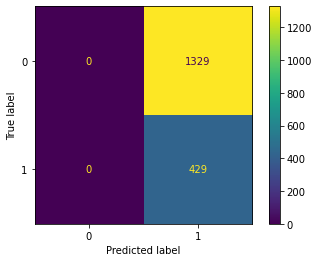

In [134]:
plot_confusion_matrix(grid_model,X_test,y_test)

In [73]:
model.fit(X_train_scaled,y_train)

LogisticRegression()

In [74]:
yscale_pred=model.predict(X_test_scaled)

C:\Users\sande\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


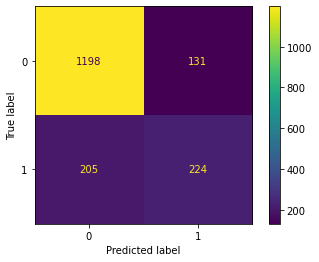

In [75]:
plot_confusion_matrix(model,X_test_scaled,y_test)

In [76]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [82]:
model_neighbors=KNeighborsClassifier()

In [83]:
model_neighbors.fit(X_train,y_train)

KNeighborsClassifier()

In [84]:
n_predict=model_neighbors.predict(X_test)

C:\Users\sande\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


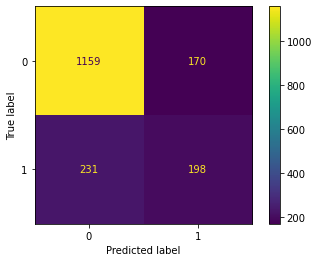

In [85]:
plot_confusion_matrix(model_neighbors,X_test,y_test)

In [86]:
print(classification_report(y_test,n_predict))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1329
           1       0.54      0.46      0.50       429

    accuracy                           0.77      1758
   macro avg       0.69      0.67      0.67      1758
weighted avg       0.76      0.77      0.77      1758



In [87]:
params={'n_neighbors':[1,3,5,7,10],'weights': ['uniform', 'distance'],'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}

In [130]:
grid_neighbors=GridSearchCV(model_neighbors,param_grid,verbose=2)

In [131]:
grid_neighbors.fit(X_train,y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
[CV] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=30, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=30, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=30, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=30, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=30, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=30, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=30, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=30, p=1, weights=distance; 

[CV] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=34, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=34, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=34, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=34, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=34, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=34, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=34, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=34, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=10, m

[CV] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=33, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=33, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=33, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=33, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=33, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=33, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=33, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=33, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=10, m

[CV] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=30, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=30, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=30, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=30, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=30, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=30, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=30, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=30, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, m

[CV] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=35, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=35, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=35, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=35, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=35, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=35, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=35, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=35, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, 

[CV] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=33, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=33, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=33, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=33, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=33, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=33, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=33, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=33, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, leaf_size=20, 

[CV] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=31, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=31, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=31, p=1, weights=uniform; total time=   0.1s
[CV] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=31, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=31, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=31, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=31, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=31, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=31, p=2, weigh

[CV] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=35, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=35, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=35, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=35, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=35, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, metric=euclidean, n_neighbors=35, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=30, p=1, weights=uniform; total time=   0.2s
[CV] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=30, p=1, weights=uniform; total time=   0.1s
[CV] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=30, p=1, weigh

[CV] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=34, p=1, weights=distance; total time=   0.2s
[CV] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=34, p=1, weights=distance; total time=   0.2s
[CV] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=34, p=1, weights=distance; total time=   0.2s
[CV] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=34, p=1, weights=distance; total time=   0.2s
[CV] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=34, p=2, weights=uniform; total time=   0.3s
[CV] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=34, p=2, weights=uniform; total time=   0.3s
[CV] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=34, p=2, weights=uniform; total time=   0.2s
[CV] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=34, p=2, weights=uniform; total time=   0.2s
[CV] END algorithm=auto, leaf_size=10, metric=manhattan, n_neighbors=34, p=2, weight

[CV] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=31, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=33, p=1, weights=uniform; total time=   0.1s
[CV] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=33, p=1, weights=uniform; total time=   0.1s
[CV] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=33, p=1, weights=uniform; total time=   0.1s
[CV] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=33, p=1, weights=uniform; total time=   0.1s
[CV] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=33, p=1, weights=uniform; total time=   0.1s
[CV] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=33, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=33, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=auto, leaf_size=20, metric=euclidean, n_neighbors=33, p=1, weights

[CV] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=30, p=2, weights=uniform; total time=   0.2s
[CV] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=30, p=2, weights=uniform; total time=   0.3s
[CV] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=30, p=2, weights=uniform; total time=   0.2s
[CV] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=30, p=2, weights=uniform; total time=   0.3s
[CV] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=30, p=2, weights=distance; total time=   0.2s
[CV] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=30, p=2, weights=distance; total time=   0.2s
[CV] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=30, p=2, weights=distance; total time=   0.2s
[CV] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=30, p=2, weights=distance; total time=   0.2s
[CV] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=30, p=2, weight

[CV] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=35, p=1, weights=uniform; total time=   0.2s
[CV] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=35, p=1, weights=uniform; total time=   0.2s
[CV] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=35, p=1, weights=distance; total time=   0.2s
[CV] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=35, p=1, weights=distance; total time=   0.2s
[CV] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=35, p=1, weights=distance; total time=   0.2s
[CV] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=35, p=1, weights=distance; total time=   0.2s
[CV] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=35, p=1, weights=distance; total time=   0.2s
[CV] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=35, p=2, weights=uniform; total time=   0.2s
[CV] END algorithm=auto, leaf_size=20, metric=manhattan, n_neighbors=35, p=2, weigh

[CV] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=33, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=33, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=33, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=33, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=34, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=34, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=34, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=34, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=10, metric=euclidean, 

[CV] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=31, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=31, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=31, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=31, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=31, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=31, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=31, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=31, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n

[CV] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=35, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=35, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=30, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=30, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=30, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=30, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=30, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=30, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n

[CV] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=34, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=34, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=34, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=34, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=34, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=34, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=34, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=34, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n

[CV] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=33, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=33, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=33, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=33, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=33, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=33, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=33, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n_neighbors=33, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, leaf_size=20, metric=manhattan, n

[CV] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=30, p=2, weights=uniform; total time=   0.1s
[CV] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=30, p=2, weights=uniform; total time=   0.1s
[CV] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=30, p=2, weights=uniform; total time=   0.1s
[CV] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=30, p=2, weights=uniform; total time=   0.1s
[CV] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=30, p=2, weights=uniform; total time=   0.1s
[CV] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=30, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=30, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=30, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=30, p=2

[CV] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=35, p=1, weights=uniform; total time=   0.1s
[CV] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=35, p=1, weights=uniform; total time=   0.1s
[CV] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=35, p=1, weights=uniform; total time=   0.1s
[CV] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=35, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=35, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=35, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=35, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=35, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=35, p

[CV] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=33, p=2, weights=uniform; total time=   0.2s
[CV] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=33, p=2, weights=uniform; total time=   0.3s
[CV] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=33, p=2, weights=distance; total time=   0.2s
[CV] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=33, p=2, weights=distance; total time=   0.2s
[CV] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=33, p=2, weights=distance; total time=   0.2s
[CV] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=33, p=2, weights=distance; total time=   0.2s
[CV] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=33, p=2, weights=distance; total time=   0.2s
[CV] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=34, p=1, weights=uniform; total time=   0.3s
[CV] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=34, p

[CV] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=31, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=31, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=31, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=31, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=31, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=31, p=2, weights=uniform; total time=   0.1s
[CV] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=31, p=2, weights=uniform; total time=   0.1s
[CV] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=31, p=2, weights=uniform; total time=   0.1s
[CV] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=31, p

[CV] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=35, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=35, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=20, metric=euclidean, n_neighbors=35, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=30, p=1, weights=uniform; total time=   0.2s
[CV] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=30, p=1, weights=uniform; total time=   0.3s
[CV] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=30, p=1, weights=uniform; total time=   0.2s
[CV] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=30, p=1, weights=uniform; total time=   0.3s
[CV] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=30, p=1, weights=uniform; total time=   0.3s
[CV] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=30, p=1

[CV] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=34, p=1, weights=distance; total time=   0.2s
[CV] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=34, p=1, weights=distance; total time=   0.2s
[CV] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=34, p=2, weights=uniform; total time=   0.2s
[CV] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=34, p=2, weights=uniform; total time=   0.3s
[CV] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=34, p=2, weights=uniform; total time=   0.2s
[CV] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=34, p=2, weights=uniform; total time=   0.3s
[CV] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=34, p=2, weights=uniform; total time=   0.2s
[CV] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=34, p=2, weights=distance; total time=   0.2s
[CV] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=34, p=2

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'auto', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20],
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [30, 31, 33, 34, 35], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [132]:
grid_neighbors.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'metric': 'manhattan',
 'n_neighbors': 33,
 'p': 1,
 'weights': 'uniform'}

In [133]:
neighbors_predict=grid_neighbors.predict(X_test)

C:\Users\sande\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


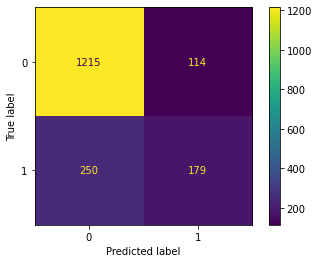

In [134]:
plot_confusion_matrix(grid_neighbors,X_test,y_test)

In [137]:
print(classification_report(y_test,neighbors_predict))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1329
           1       0.61      0.42      0.50       429

    accuracy                           0.79      1758
   macro avg       0.72      0.67      0.68      1758
weighted avg       0.78      0.79      0.78      1758



In [138]:
accuracy_score(y_test,neighbors_predict)

0.7929465301478953

# USing Scaled Data

In [108]:
param={'n_neighbors':[27,28,29,30,31,32,33],'weights': ['uniform', 'distance'],'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}

In [129]:
param_grid = {
    'n_neighbors': [30,31,33,34,35],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],  # Manhattan or Euclidean distance
    'algorithm': ['ball_tree','auto','kd_tree', 'brute'],
    'leaf_size': [10,20],  # Relevant when using ball_tree or kd_tree
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

In [121]:
gridscaled_neighbors=GridSearchCV(model_neighbors,param_grid,verbose=2)

In [122]:
gridscaled_neighbors.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=30, p=1, weights=uniform; total time=   0.3s
[CV] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=30, p=1, weights=uniform; total time=   0.3s
[CV] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=30, p=1, weights=uniform; total time=   0.3s
[CV] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=30, p=1, weights=uniform; total time=   0.3s
[CV] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=30, p=1, weights=uniform; total time=   0.3s
[CV] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=30, p=1, weights=distance; total time=   0.2s
[CV] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=30, p=1, weights=distance; total time=   0.2s
[CV] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=30, p=1, weights=distance; to

[CV] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=34, p=1, weights=distance; total time=   0.3s
[CV] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=34, p=2, weights=uniform; total time=   0.3s
[CV] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=34, p=2, weights=uniform; total time=   0.3s
[CV] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=34, p=2, weights=uniform; total time=   0.3s
[CV] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=34, p=2, weights=uniform; total time=   0.3s
[CV] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=34, p=2, weights=uniform; total time=   0.3s
[CV] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=34, p=2, weights=distance; total time=   0.2s
[CV] END algorithm=ball_tree, leaf_size=10, metric=euclidean, n_neighbors=34, p=2, weights=distance; total time=   0.2s
[CV] END algorithm=ball_tree, leaf_size=10, m

[CV] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=31, p=2, weights=distance; total time=   0.2s
[CV] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=31, p=2, weights=distance; total time=   0.2s
[CV] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=33, p=1, weights=uniform; total time=   0.2s
[CV] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=33, p=1, weights=uniform; total time=   0.2s
[CV] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=33, p=1, weights=uniform; total time=   0.2s
[CV] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=33, p=1, weights=uniform; total time=   0.2s
[CV] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=33, p=1, weights=uniform; total time=   0.2s
[CV] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=33, p=1, weights=distance; total time=   0.2s
[CV] END algorithm=ball_tree, leaf_size=10, m

[CV] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=30, p=1, weights=distance; total time=   0.2s
[CV] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=30, p=1, weights=distance; total time=   0.2s
[CV] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=30, p=1, weights=distance; total time=   0.2s
[CV] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=30, p=2, weights=uniform; total time=   0.2s
[CV] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=30, p=2, weights=uniform; total time=   0.2s
[CV] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=30, p=2, weights=uniform; total time=   0.3s
[CV] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=30, p=2, weights=uniform; total time=   0.2s
[CV] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=30, p=2, weights=uniform; total time=   0.3s
[CV] END algorithm=ball_tree, leaf_size=20, m

[CV] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=34, p=2, weights=distance; total time=   0.2s
[CV] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=34, p=2, weights=distance; total time=   0.2s
[CV] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=34, p=2, weights=distance; total time=   0.2s
[CV] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=34, p=2, weights=distance; total time=   0.2s
[CV] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=35, p=1, weights=uniform; total time=   0.3s
[CV] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=35, p=1, weights=uniform; total time=   0.3s
[CV] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=35, p=1, weights=uniform; total time=   0.3s
[CV] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=35, p=1, weights=uniform; total time=   0.2s
[CV] END algorithm=ball_tree, leaf_size=20, 

[CV] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=33, p=1, weights=distance; total time=   0.2s
[CV] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=33, p=1, weights=distance; total time=   0.2s
[CV] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=33, p=1, weights=distance; total time=   0.2s
[CV] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=33, p=1, weights=distance; total time=   0.2s
[CV] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=33, p=1, weights=distance; total time=   0.2s
[CV] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=33, p=2, weights=uniform; total time=   0.2s
[CV] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=33, p=2, weights=uniform; total time=   0.2s
[CV] END algorithm=ball_tree, leaf_size=20, metric=manhattan, n_neighbors=33, p=2, weights=uniform; total time=   0.2s
[CV] END algorithm=ball_tree, leaf_size=20,

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree'], 'leaf_size': [10, 20],
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [30, 31, 33, 34, 35], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [124]:
gridscaled_neighbors.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 10,
 'metric': 'euclidean',
 'n_neighbors': 33,
 'p': 1,
 'weights': 'uniform'}

{'algorithm': 'ball_tree',
 'leaf_size': 20,
 'metric': 'manhattan',
 'n_neighbors': 11,
 'p': 1,
 'weights': 'uniform'}

{'algorithm': 'ball_tree',
 'leaf_size': 10,
 'metric': 'euclidean',
 'n_neighbors': 20,
 'p': 1,
 'weights': 'uniform'}



In [125]:
predict_gridscaled_neighbors=gridscaled_neighbors.predict(X_test_scaled)

C:\Users\sande\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


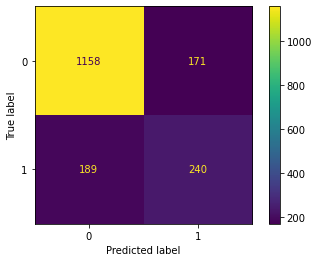

In [126]:
plot_confusion_matrix(gridscaled_neighbors,X_test_scaled,y_test)

In [127]:
accuracy_score(y_test,predict_gridscaled_neighbors)

0.7952218430034129

In [128]:
print(classification_report(y_test,predict_gridscaled_neighbors))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1329
           1       0.58      0.56      0.57       429

    accuracy                           0.80      1758
   macro avg       0.72      0.72      0.72      1758
weighted avg       0.79      0.80      0.79      1758



# Support Vector Machine

In [70]:
from sklearn.svm import SVC

In [77]:
svc_model=SVC(C=6,class_weight='balanced',gamma='auto',kernel='poly')

In [ ]:
svc_model.fit(X_train,y_train)

In [73]:
svc_predict=svc_model.predict(X_test)

In [74]:
print(classification_report(y_test,svc_predict))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1329
           1       0.50      0.73      0.59       429

    accuracy                           0.76      1758
   macro avg       0.70      0.75      0.71      1758
weighted avg       0.80      0.76      0.77      1758



In [ ]:
 C=6,class_weight='balanced',gamma='auto',kernel='poly'
    
                precision    recall  f1-score   support

           0       0.90      0.77      0.83      1329
           1       0.50      0.73      0.59       429

    accuracy                           0.76      1758
   macro avg       0.70      0.75      0.71      1758
weighted avg       0.80      0.76      0.77      1758




C:\Users\sande\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


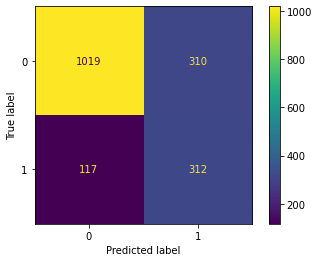

In [75]:
plot_confusion_matrix(svc_model,X_test,y_test)

In [145]:
svc_params={'C':[5,6,7,8],'kernel': ['linear', 'poly', 'rbf'],'gamma': ['scale', 'auto'],'degree': [2],'class_weight': ['balanced']}# 'sigmoid', 'precomputed'

In [146]:
grid_svc=GridSearchCV(svc_model,svc_params,verbose=2)

In [ ]:
grid_svc.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END C=5, class_weight=balanced, degree=2, gamma=scale, kernel=linear; total time= 7.3min


In [ ]:
predict_gridsvc=gridsvc.predict(X_test)

In [ ]:
print(classification_report(y_test,predict_gridsvc))

In [ ]:
plot_confusion_matrix(grid_svc,X_test,y_test)